<a href="https://colab.research.google.com/github/lituldust/Techfest2025-DataAnalysis/blob/main/EDA_MasihPemula_UniversitasGadjahMada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align="center"><b>TechFest 2025 - Data Analytics</b></h1>

<h2><b>Nama Kelompok</b>: Masih Pemula</h2>
<h2><b>Instansi</b>: Universitas Gadjah Mada</h2>
<h2><b>Anggota Kelompok</b>:</h2>

  <ul>
    <li>Muhammad Hafiz Ardiansyah</li>
    <li>Amelia Syahla Aurellia Sambudi</li>
  </ul>

<h2><b>Laporan Dibuat</b>: Rabu, 9 Juli 2025</h2>

---

# **Daftar Isi**


1.   [Pendahuluan](#pendahuluan)
    > 1.1. [Rumusah Masalah](#mslh)

    > 1.2. [Tujuan](#tujuan)
2.   [Deskripsi Dataset](#deskripsi)
3.   [Persiapan Data (Data Preparation)](#persiapan)
    > 3.1. [Mengunduh dan Mengimpor Dataset](#unduh)

    > 3.2. [Menyesuaikan Tipe Data setiap Kolom](#tipe)

    > 3.3. [Membersihkan Data (Data Cleaning)](#membersihkan)
    >> 3.3.1. [Mencari Alasan Hilangnya Data](#reason)

    >> 3.3.2. [Menangani Data yang Hilang Menggunakan Imputasi](#imputasi)
    >>> 3.3.2.1. [Provinsi Sulawesi Utara](#sulut)

    >>> 3.3.2.2. [Provinsi Papua Barat Daya, Papua Pegunungan, Papua Selatan, Papua Tengah](#papua)

    >> 3.3.2. [Ringkasan Proses Pembersihan Data](#ringkasan-imputasi)
4.   [Analisis Data Eksploratif (Exploratory Data Analysis - EDA)](#EDA)
    > 4.1. [Statistik Umum Data](#statistik)

    > 4.2. [Analisis Kinerja Realisasi Anggaran Tiap Provinsi (TKDD)](#tkdd)
    >> 4.2.1. [Analisis Bivariat: Eksplorasi Pagu TKDD vs Realisasi TKDD](#pagu-vs-realisasi)

    >> 4.2.2. [Analisis Univariat: Eksplorasi Tingkat Realisasi TKDD Provinsi](#top-5-realisasi)

    >> 4.2.3. [Analisis Univariat: Persentase Realisasi TKDD Tiap Provinsi](#persentase-realisasi)

    > 4.3. [Analisis Hubungan Antar Variabel](#hubungan-variabel)
    >> 4.3.1. [Analisis Bivariat: Matriks Korelasi](#heatmap-korelasi)

    > 4.4. [Analisis Faktor-faktor Penentu Variabel](#faktor-penentu)
    >> 4.4.1. [Analisis Bivariat: Analisis Korelasi IPM dan Realisasi TKDD dengan Beberapa Variabel](#penentu-ipm)
    >>> 4.4.1.1. [Analisis Korelasi IPM dengan Realisasi TKDD](#ipm-vs-tkdd)

    >> 4.4.2. [Analisis Multivariat: Eksplorasi Hubungan Lebih dari 2 Variabel](#tkdd-vs-ipm)

    >> 4.4.3. [Analisis Faktor yang Mempengaruhi IPM dan Realisasi TKDD](#faktor-tkdd-ipm)
    >>> 4.4.3.1. [Sampling Provinsi](#sample-provinsi)

    >>> 4.4.3.2. [Feature Importance - Machine Learning (Random Forest Regressor)](#feature-importance)
5.   [Hasil dan Pembahasan](#hasil)
    > 5.1. [Tingkat Perbandingan Antara Pagu dan Realisasi TKDD di Setiap Provinsi](#hasil-1)

    > 5.2. [Persentase Realisasi TKDD dari Tiap Provinsi](#hasil-2)

    > 5.3. [Analisis Faktor-Faktor yang Dapat Memengaruhi Realisasi TKDD](#hasil-3)

    > 5.4. [Analisis Hubungan Realisasi TKDD dengan IPM](#hasil-4)

    > 5.5. [Analisis Faktor-Faktor yang Memengaruhi IPM di Tiap Provinsi](#hasil-5)

    > 5.6. [Insight dan Rekomendasi Kebijakan](#hasil-6)
    >> 5.6.1. [Insight dari Hasil Analisis](#insight)

    >> 5.6.2. [Rekomendasi Kebijakan](#rekomendasi)
6.   [Kesimpulan](#kesimpulan)


<a name='pendahuluan' id='pendahuluan'></a>
# **1. Pendahuluan**

<p align="justify">
Laporan ini bertujuan untuk menganalisis efektivitas alokasi dana Transfer ke Daerah dan Dana Desa (TKDD) oleh Pemerintah Pusat pada tahun 2023 dalam mendorong pembangunan dan meningkatkan kesejahteraan masyarakat di seluruh Indonesia. Beberapa data seperti Provinsi, Anggaran APBN, Jumlah Penduduk, IPM (Indeks Pembangunan Manusia), Pagu TKDD (Pagu Transfer ke Daerah dan Dana Desa), dan Realisasi TKDD akan kami gunakan untuk memahami keterkaitan satu sama lain, serta menelusuri hubungan antara pagu TKDD yang ditetapkan, efektivitas dana yang tersalurkan dan digunakan, serta dampaknya terhadap kualitas hidup masyarakat, yang salah satunya akan tercermin melalui Indeks Pembangunan Manusia (IPM).

<a name='mslh'></a>
## **1.1. Rumusan Masalah**

*   Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?
*  Provinsi mana yang memiliki tingkat realisasi tertinggi dan tersendah?
*   Apa kemungkinan faktor-faktor yang memengaruhi tinggi-rendahnya realisasi TKDD?
*   Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?
*   Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi pada tahun 2023?

<a name='tujuan'></a>
## **1.2. Tujuan**

1.   Melakukan analisis perbandingan pagu TKDD dan realisasi TKDD
2.   Menghitung persentase realisasi TKDD dari tiap provinsi dan mengklasifikasikannya menjadi 3 kategori:
>*   Dibawah 90%
>*   Diantara 90-100%
>*   Diatas 100%
3.   Menganalisis faktor-faktor yang dapat memengaruhi realisasi TKDD
4. Analisis hubungan realisasi TKDD dengan IPM
5. Menemukan insight baru dan rekomendasi kebijakan untuk Pemerintah berdasar data yang ada

<a name='deskripsi'></a>
# **2. Deskripsi Dataset**

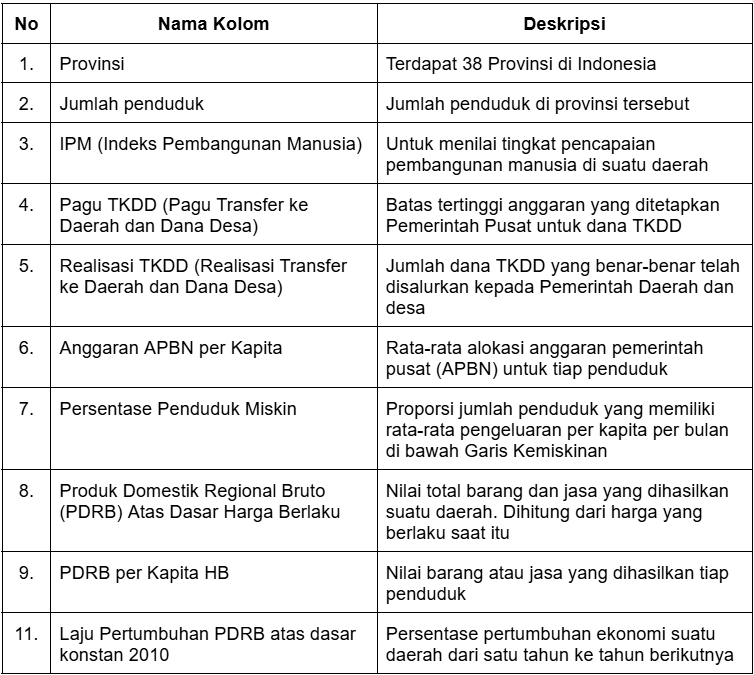

<a name='persiapan'></a>
# **3. Persiapan Data <i>(Data Preparation)**

<a name='unduh'></a>
## **3.1. Mengunduh dan Mengimpor Dataset**

In [ ]:
import gdown
import os

output_path = 'dataset'

if not os.path.exists(output_path):
  os.mkdir(output_path)

In [ ]:
!gdown 1R0Eti5UMBHkHxFYgLdDqZ_Mb3NjOGt2u
!mv '/content/Dataset Lomba Data Analytics TECHFEST 2025.csv' 'dataset'

Downloading...
From: https://drive.google.com/uc?id=1R0Eti5UMBHkHxFYgLdDqZ_Mb3NjOGt2u
To: /content/Dataset Lomba Data Analytics TECHFEST 2025.csv
100% 5.89k/5.89k [00:00<00:00, 16.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/dataset/Dataset Lomba Data Analytics TECHFEST 2025.csv')
df.head()

Provinsi    IPM                   Pagu TKDD  \
0           ACEH   74,7   Rp 30.821.480.000.000,00    
1           BALI  78,01   Rp 11.152.110.000.000,00    
2         BANTEN  75,77   Rp 17.453.380.000.000,00    
3       BENGKULU   74,3   Rp 10.570.080.000.000,00    
4  DI YOGYAKARTA  81,09   Rp 10.355.870.000.000,00    

               Realisasi TKDD Jumlah Penduduk Anggaran APBN per kapita  \
0   Rp 31.074.560.000.000,00       5.409.200             5.744.760,78    
1   Rp 11.064.980.000.000,00       4.374.300             2.529.543,01    
2   Rp 17.467.380.000.000,00      12.167.000             1.435.635,74    
3   Rp 10.559.790.000.000,00       2.059.400             5.127.605,13    
4   Rp 10.241.290.000.000,00       3.712.600             2.758.522,33    

  Persentase Penduduk Miskin  \
0                      14,45   
1                       4,25   
2                       6,17   
3                      14,04   
4                      11,04   

  Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                           227018,2               
1                                          274358,18               
2                                          814122,03               
3                                           96583,09               
4                                          180696,04               

  Produk Domestik Regional Bruto per Kapita HB  \
0                                  41.408.000    
1                                  62.294.000    
2                                  66.147.000    
3                                  46.300.000    
4                                  48.360.000    

  Laju Pertumbuhan PDRB atas dasar konstan 2010  
0                                          4,23  
1                                          5,71  
2                                          4,81  
3                                          4,28  
4                                          5,07

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Provinsi                                                        38 non-null     object
 1   IPM                                                             34 non-null     object
 2   Pagu TKDD                                                       38 non-null     object
 3   Realisasi TKDD                                                  38 non-null     object
 4   Jumlah Penduduk                                                 36 non-null     object
 5   Anggaran APBN per kapita                                        38 non-null     object
 6   Persentase Penduduk Miskin                                      34 non-null     object
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  

<a name="tipe"></a>
## **3.2. Menyesuaikan Tipe Data setiap Kolom**

In [ ]:
tkdd = ['Pagu TKDD', 'Realisasi TKDD']

In [ ]:
for column in tkdd:
  df[column] = df[column].str.split(',').str.get(0)
  df[column] = df[column].str.replace('Rp', '', regex=False)

In [ ]:
for column in df.columns[1:]:
  df[column] = df[column].str.replace('.', '', regex=False)
  df[column] = df[column].str.replace(',', '.', regex=False)
  df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
# Verifikasi apakah tipe data sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

<a name='membersihkan'></a>
## **3.3. Membersihkan Data <i>(Data Cleaning)**

<h2>Beberapa Jenis dari Data yang Hilang:</h2>

1. **MCAR <i>(Missing Completely at Random)</i>**
    
    <p align="justify"> Data hilang karena murni ketidaksengajaan atau karena masalah teknis. Tidak ada hubungannya sama sekali dengan data apapun, baik data yang hilang itu sendiri maupun data lainnya.</p>

2. **MAR <i>(Missing at Random)</i>**

    <p align="justify"> Data hilang karena ada hubungannya dengan data lain yang kita miliki (yang terisi). Jadi, hilangnya data ini tidak benar-benar acak, tapi ada polanya jika kita melihat variabel lain.</p>
3. **MNAR <i>(Missing Not at Random)</i>**

    <p align="justify">Data hilang karena berhubungan langsung dengan nilai dari data itu sendiri. Ini adalah jenis yang paling sulit diatasi karena penyebabnya tersembunyi di dalam nilai yang hilang itu.</p>

Sumber: [Missing Data: Causes, Types, and Handling Techniques](https://www.linkedin.com/pulse/missing-data-causes-types-handling-techniques-bilikis-alayo-ho9if/)

In [ ]:
print("Cek Missing Value pada Dataset: \n")
print(df.isnull().sum())

Cek Missing Value pada Dataset: 

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64


<a name='reason'></a>
### 3.3.1. Mencari Alasan Hilangnya Data

<Axes: >

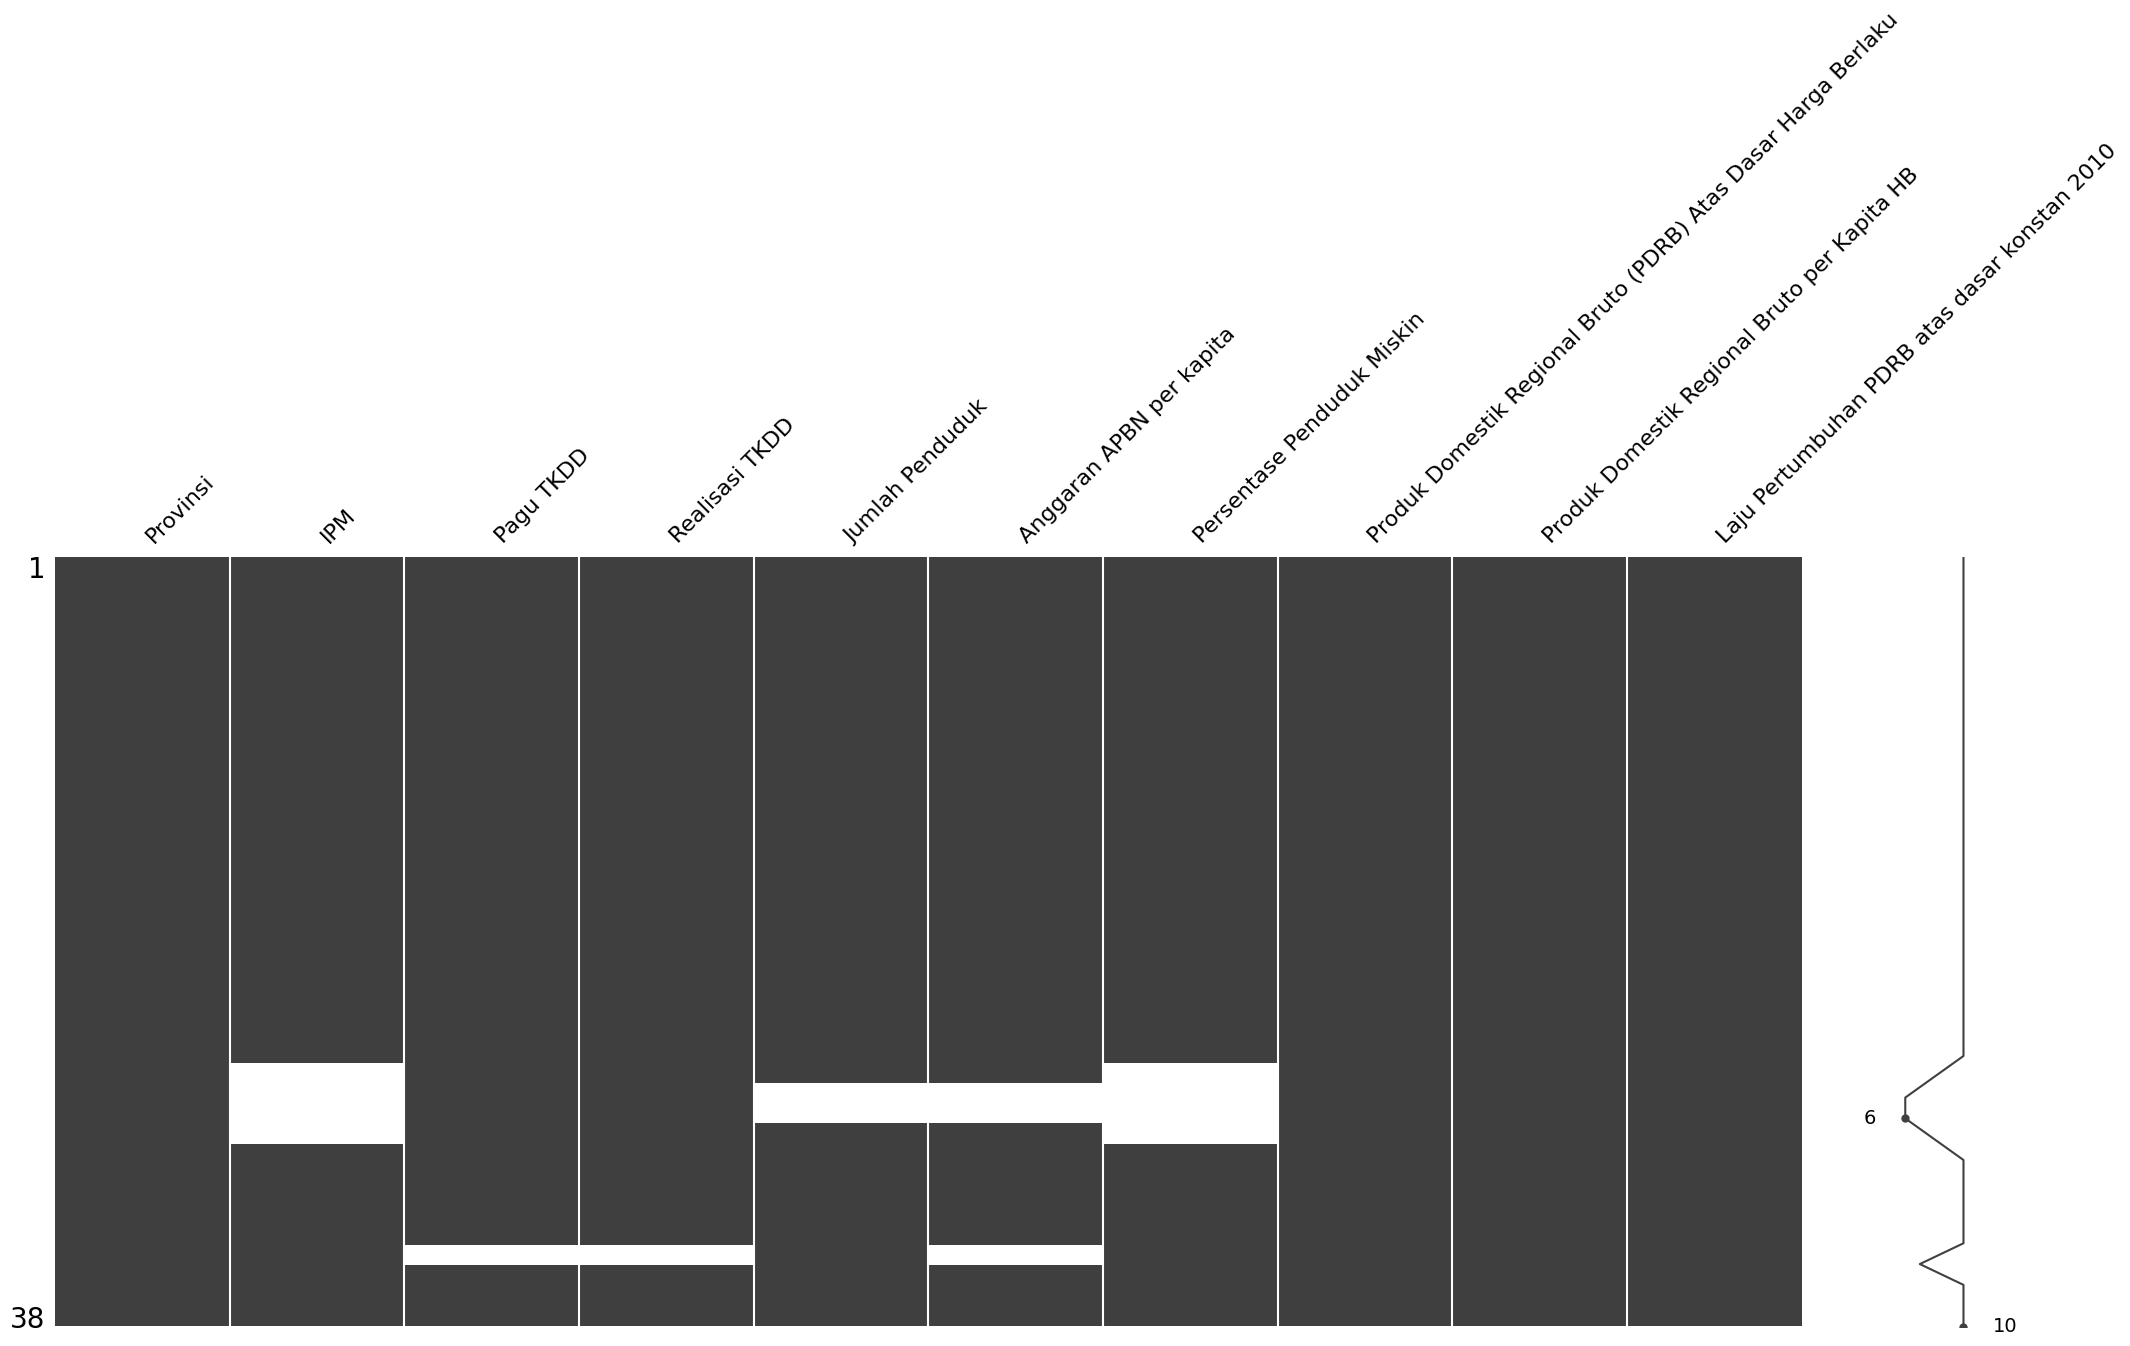

In [ ]:
import missingno as msno

msno.matrix(df)

<p align="justify">Plot yang terlihat blank (warna putih) merupakan visualisasi dari data yang hilang. Kolom yang memiliki data hilang terlihat <b>memiliki pola yang mirip</b>, data yang hilang pada kolom tersebut <b>tersebar pada jangkauan baris yang sama</b>. Hal ini menunjukkan bahwa terdapat sebuah kemungkinan bahwa <b>kolom tersebut memiliki keterkaitan</b>. Karena polanya yang tidak acak, terdapat kemungkinan bahwa jenis data yang hilang ini adalah <b>MAR atau MNAR</b>. Untuk melihat visualisasi yang lebih jelas, maka dapat visualisasikan ulang dengan diurutkan berdasarkan salah satu dari kolom yang memiliki data hilang.
</p>

<Axes: >

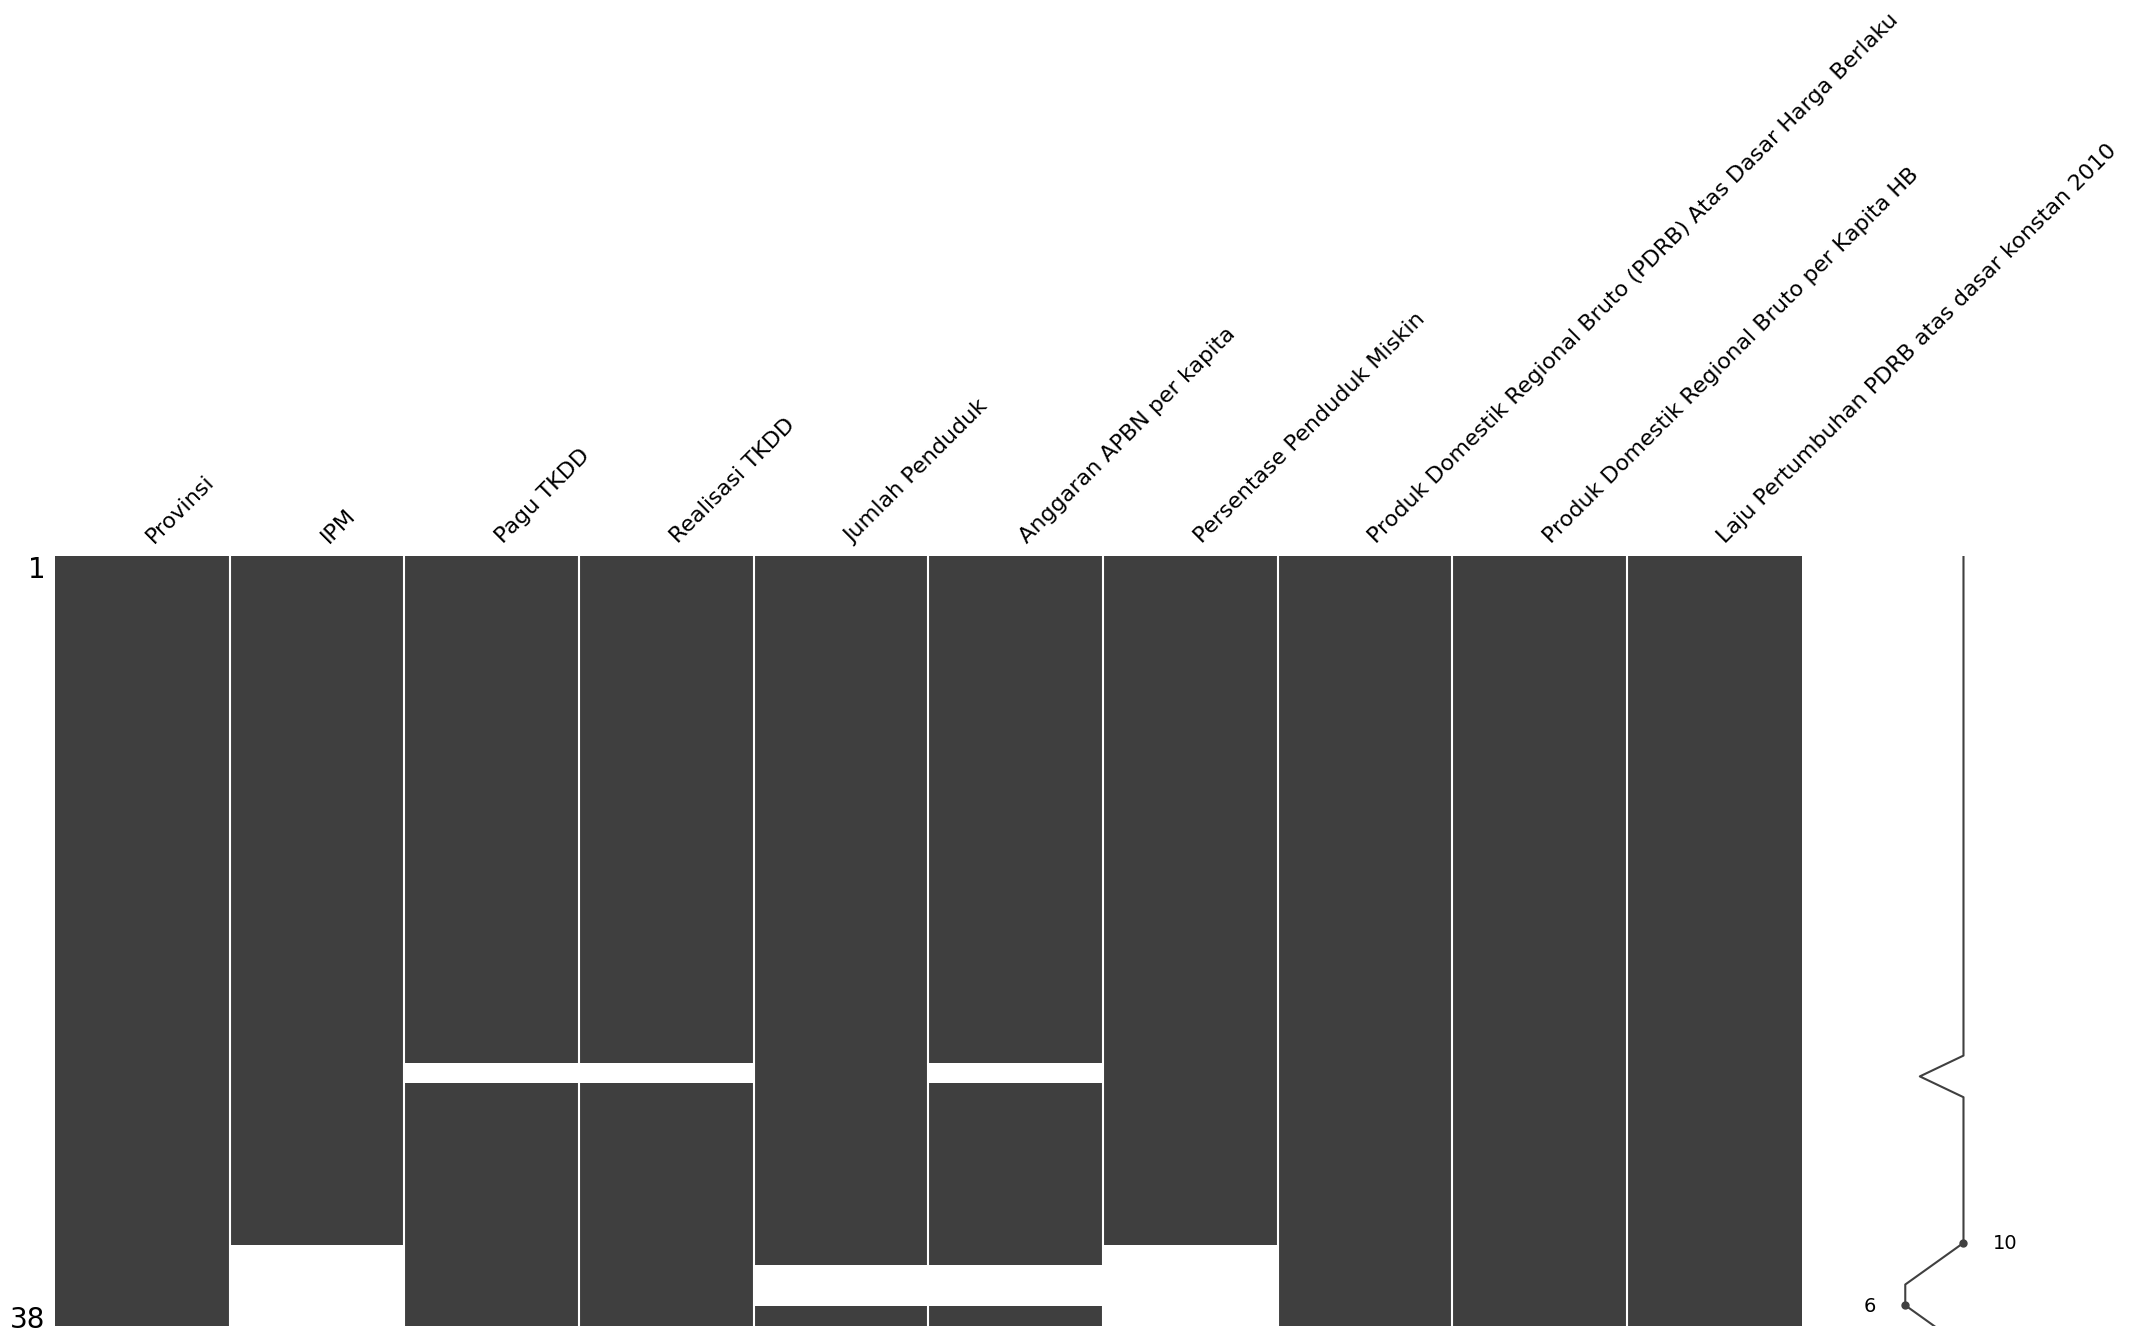

In [ ]:
sorted = df.sort_values('IPM')
msno.matrix(sorted)

<p align="justify">

*   Setelah diurutkan berdasarkan IPM, keterkaitan dari kolom yang memiliki data yang hilang terlihat semakin jelas.
*   Oleh karena itu, dapat dilakukan visualisasi lain menggunakan heatmap pada data yang diurutkan untuk mempermudah dalam melihat korelasi antar-data yang hilang.

</p>

<Figure size 1200x900 with 0 Axes>

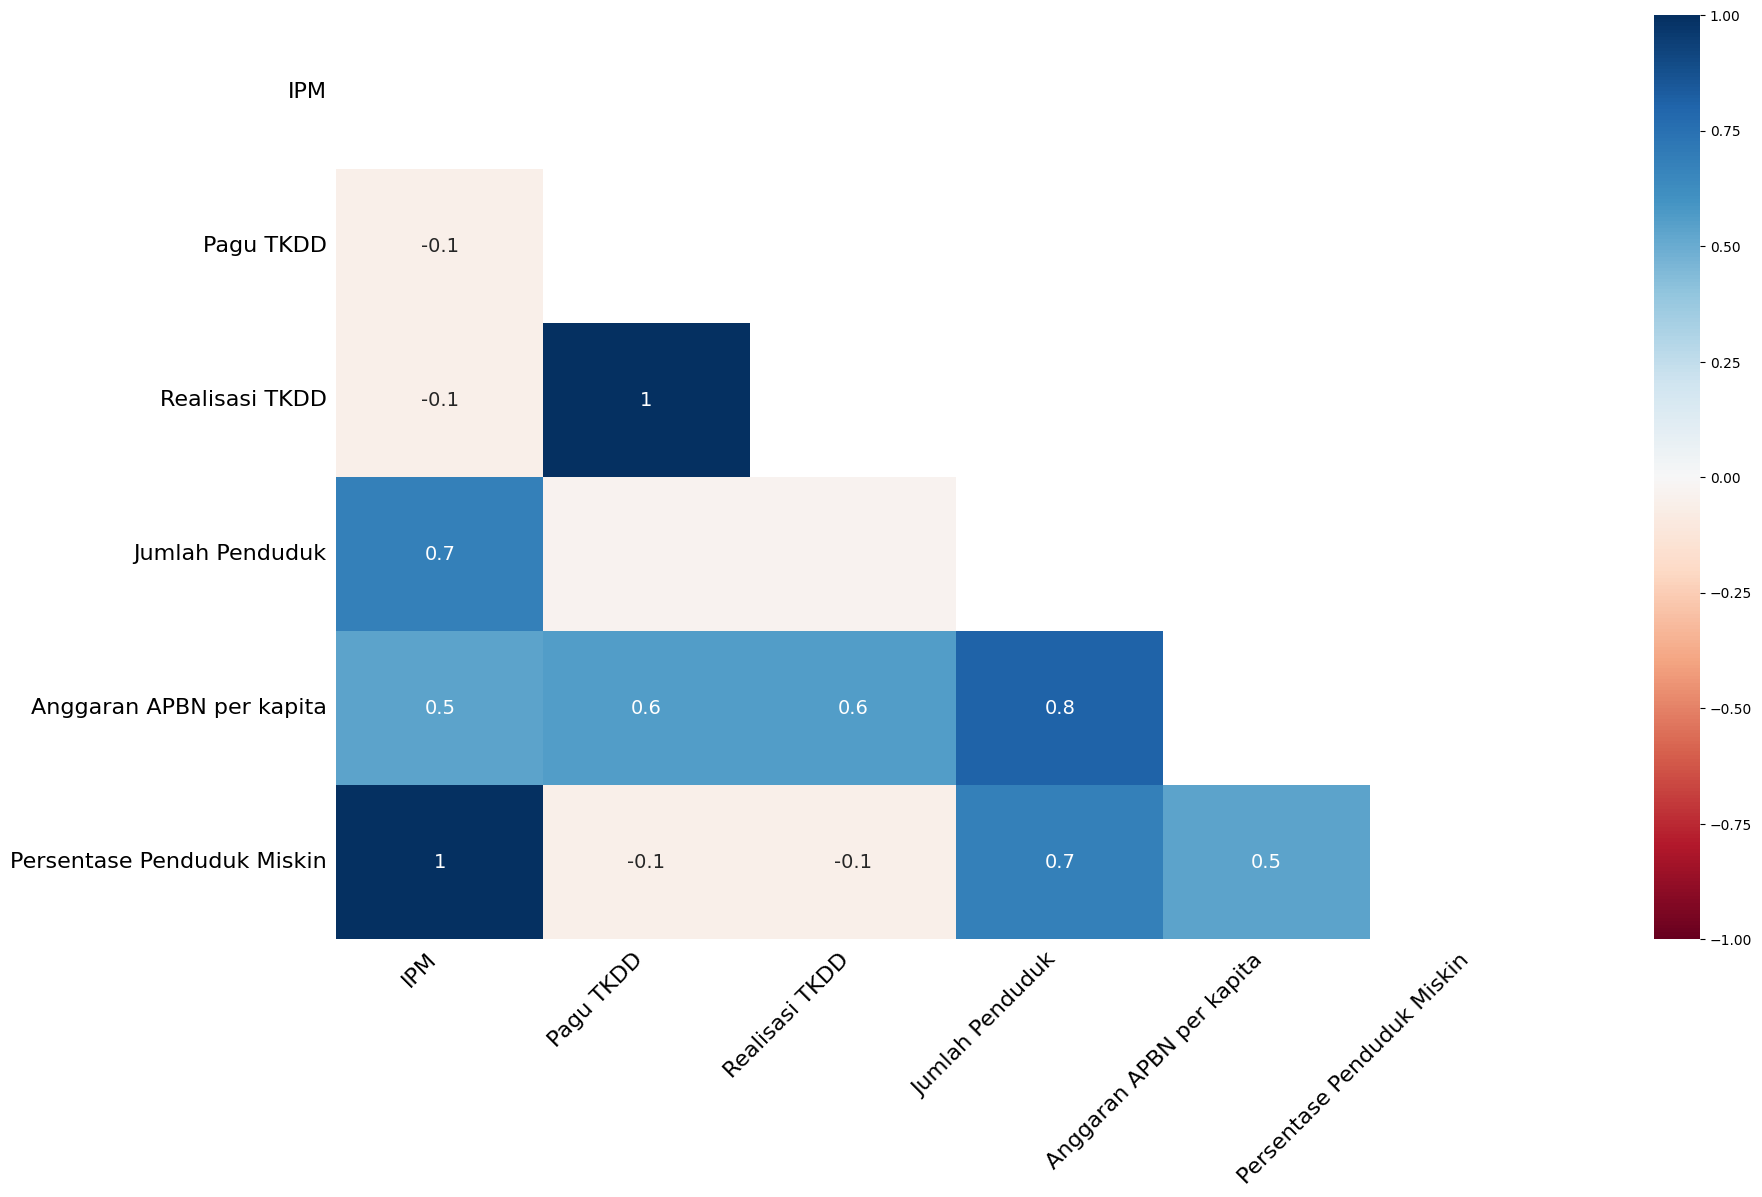

In [ ]:
plt.figure(figsize=(12, 9))
msno.heatmap(df)
plt.show()

<p>Melalui hasil dari matriks korelasi di atas, didapatkan sebuah informasi bahwa:</p>
<ul>
  <li align="justify">Beberapa kolom seperti IPM vs Persentase Penduduk Miskin dan kolom Realisasi TKDD vs Pagu TKDD yang <b>berkorelasi =1 memiliki nilai data yang hilang pada baris yang sama</b>. Oleh karena itu, bisa dibilang bahwa nilai ini hilang pada sebuah provinsi yang sama. Hal ini menguatkan bahwa <b>alasan dari hilangnya data berjenis MNAR dan bisa jadi dikarenakan oleh kesalahan input atau beberapa alasan lain</b>.</li>
  <li align="justify">Beberapa korelasi sebesar 0.5-0.8 menunjukkan bahwa data yang hilang beberapa terdapat pada baris yang sama. Sehingga jenis data yang hilang pada kolom ini bisa jadi berupa MAR.</li>
</ul>
<p align="justify">Sebelum mengambil keputusan strategi yang akan digunakan untuk menangani data yang hilang ini, perlu dilihat terlebih dahulu apakah data yang hilang ini berasal dari provinsi mana dan apakah data yang hilang benar-benar memiliki pola yang terstruktur.</p>

In [ ]:
# Cek provinsi mana saja yang memiliki data hilang
for provinsi in df['Provinsi']:
  if df[df['Provinsi'] == provinsi].isnull().sum().sum() > 0:
    print(provinsi)

PAPUA BARAT DAYA
PAPUA PEGUNUNGAN
PAPUA SELATAN
PAPUA TENGAH
SULAWESI UTARA


<p align="justify">
Menurut berita RRI pada 30 Juni 2022, terbentuk beberapa provinsi baru seperti Papua Pegunungan, Papua Selatan, dan Papua Tengah. Setelah itu di tahun yang sama, disusul pengesahan Provinsi Papua Barat Daya pada 8 Desember. Pembentukan provinsi baru tersebut memicu adanya pergantian tata kelola sistem pemerintahan daerah tersebut, sehingga beberapa data belum sepenuhnya dikelola. Hal ini dapat dimungkinkan sebagai <b> penyebab beberapa data hilang pada provinsi tersebut. </b>

Sumber: [4 Provinsi Terbaru Di Indonesia, Apa Saja?](https://https://www.rri.co.id/daerah/655573/4-provinsi-terbaru-di-indonesia-apa-saja)

In [ ]:
# Print keseluruhan data pada provinsi yang hilang
provinsi_hilang = ['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH', 'SULAWESI UTARA']

df[df['Provinsi'].isin(provinsi_hilang)]

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
25  PAPUA BARAT DAYA    NaN  1.016348e+13    1.013204e+13        6113520.0   
26  PAPUA PEGUNUNGAN    NaN  1.354314e+13    1.282176e+13              NaN   
27     PAPUA SELATAN    NaN  8.094830e+12    7.658020e+12              NaN   
28      PAPUA TENGAH    NaN  1.439523e+13    1.494127e+13        1351659.0   
34    SULAWESI UTARA  75.04           NaN             NaN        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
25                1657316.90                         NaN   
26                       NaN                         NaN   
27                       NaN                         NaN   
28               11054023.24                         NaN   
34                       NaN                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
25                                           36104.57                
26                                           24433.99                
27                                           31357.75                
28                                          150377.18                
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
25                                      58450000   
26                                      16870000   
27                                      58677000   
28                                     103508000   
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
25                                           1.82  
26                                           4.78  
27                                           4.23  
28                                           5.95  
34                                           5.48

<a name="imputasi"></a>
### **3.3.2. Menangani Data yang Hilang Menggunakan Imputasi**

<p align="justify">
Imputasi mengacu pada mengganti data yang hilang dengan nilai tertentu. Pemilihan strategi imputasi dilakukan karena informasi yang hilang merupakan informasi yang sangat penting untuk tahap analisis. Jika strategi imputasi salah, memungkinkan insight yang dihasilkan juga akan salah nantinya. Dataset yang berisi nilai yang tidak hilang biasanya digunakan sebagai alat pembantu dalam mengestimasi/memprediksi nilai yang akan digunakan untuk menggantikan nilai yang hilang.

Sumber:

*   [Missing Data: Causes, Types, and Handling Techniques](https://www.linkedin.com/pulse/missing-data-causes-types-handling-techniques-bilikis-alayo-ho9if/)
*   [A Guide to Handling Missing values in Python](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python#Imputations-Techniques-for-non-Time-Series-Problems)
</p>

In [ ]:
# df_regresi untuk melakukan training model imputasi
df_regresi = df.dropna()

<Axes: >

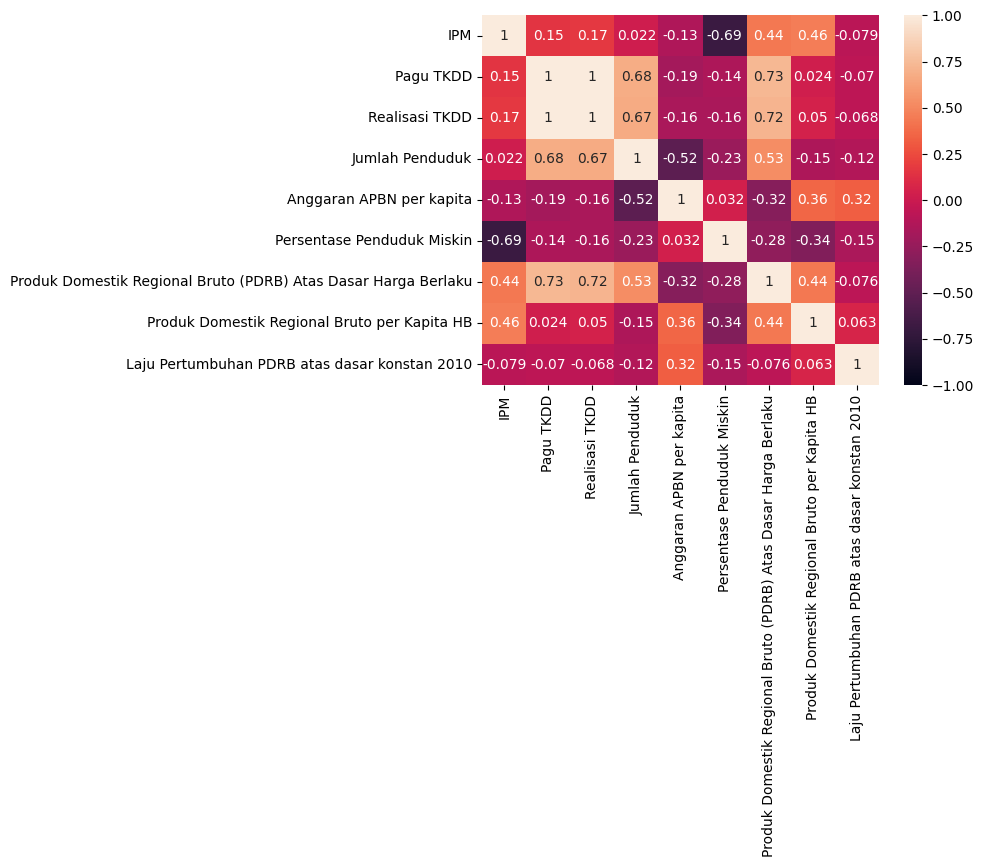

In [ ]:
# Korelasi fitur tanpa provinsi yang memiliki data hilang
corr = df_regresi.drop("Provinsi", axis=1).corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

<a name="sulut"></a>
#### **3.3.2.1. Provinsi Sulawesi Utara**


<p align="justify">Provinsi ini memiliki <b>3 kolom data yang hilang, yaitu Pagu TKDD, Realisasi TKDD, dan Anggaran APBN per kapita</b>. Transfer ke Daerah yang selanjutnya disingkat TKD adalah dana yang bersumber dari APBN dan merupakan bagian dari belanja negara yang dialokasikan dan disalurkan kepada Daerah untuk dikelola oleh Daerah dalam rangka mendanai penyelenggaraan urusan pemerintahan yang menjadi kewenangan Daerah (PMK No 24 Tahun 2024). Sementara itu, APBN adalah rencana keuangan tahunan Pemerintah negara Indonesia yang disetujui oleh Dewan Perwakilan Rakyat. APBN berisi daftar sistematis dan terperinci yang memuat rencana penerimaan dan pengeluaran negara selama satu tahun anggaran (1 Januari - 31 Desember). APBN, perubahan APBN, dan pertanggungjawaban APBN setiap tahun ditetapkan dengan Undang-Undang (Wikipedia).
</p>

<p align="justify">
Berdasarkan pengertian dari TKDD (yang sekarang TKD) dan APBN di atas, kedua hal ini memiliki keterkaitan satu sama lain. TKDD merupakan salah satu pengalokasian dana APBN untuk setiap daerah. Menggabungkan dengan pengertian dari kolom Anggaran APBN per kapita, <b>total alokasi APBN untuk setiap daerah dapat diasumsikan sebagai Anggaran APBN per kapita dikalikan dengan banyaknya Jumlah Penduduk pada provinsi tersebut</b>.
</p>

<p align="justify">
Dari informasi ini, bisa diasumsikan bahwa <b>Realisasi TKDD akan menjadi salah satu komponen utama dalam total alokasi dana APBN pada daerah tersebut</b>. Untuk itu, proses pembuktian dari asumsi dilakukan pada langkah-langkah di bawah ini.

Sumber:

*   [PMK No 24 Tahun 2024](https://datacenter.ortax.org/ortax/aturan/show/25735)
*   [Anggaran Pendapatan dan Belanja Negara Indonesia](https://id.wikipedia.org/wiki/Anggaran_Pendapatan_dan_Belanja_Negara_Indonesia)

</p>

In [ ]:
df[df['Provinsi'] == 'SULAWESI UTARA']

Provinsi    IPM  Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
34  SULAWESI UTARA  75.04        NaN             NaN        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
34                       NaN                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
34                                           5.48

In [ ]:
df_duplikat = df.copy()

df_duplikat['Estimasi Total Anggaran APBN'] = df_duplikat['Anggaran APBN per kapita'] * df_duplikat['Jumlah Penduduk']
df_duplikat.head()

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
0           ACEH  74.70  3.082148e+13    3.107456e+13        5409200.0   
1           BALI  78.01  1.115211e+13    1.106498e+13        4374300.0   
2         BANTEN  75.77  1.745338e+13    1.746738e+13       12167000.0   
3       BENGKULU  74.30  1.057008e+13    1.055979e+13        2059400.0   
4  DI YOGYAKARTA  81.09  1.035587e+13    1.024129e+13        3712600.0   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                                          274358.18                
2                                          814122.03                
3                                           96583.09                
4                                          180696.04                

   Produk Domestik Regional Bruto per Kapita HB  \
0                                      41408000   
1                                      62294000   
2                                      66147000   
3                                      46300000   
4                                      48360000   

   Laju Pertumbuhan PDRB atas dasar konstan 2010  Estimasi Total Anggaran APBN  
0                                           4.23                  3.107456e+13  
1                                           5.71                  1.106498e+13  
2                                           4.81                  1.746738e+13  
3                                           4.28                  1.055979e+13  
4                                           5.07                  1.024129e+13

Korelasi antara Realisasi TKDD dan Estimasi Total Anggaran APBN:


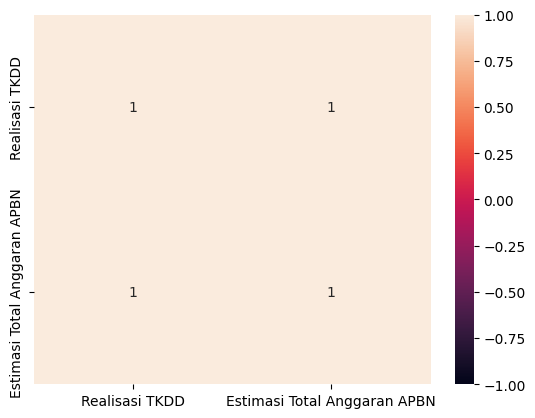

In [ ]:
correlation = df_duplikat[['Realisasi TKDD', 'Estimasi Total Anggaran APBN']].corr()
print("Korelasi antara Realisasi TKDD dan Estimasi Total Anggaran APBN:")
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

<p align="justify">
Hasil korelasi menunjukkan bahwa <b>total anggaran APBN untuk setiap daerah sama persis atau setidaknya mirip dengan nilai realisasi TKDD pada daerah tersebut</b>. Dari informasi ini, strategi imputasi dapat dilakukan dengan melakukan imputasi terlebih dahulu pada Anggaran APBN per kapita, yang kemudian dilanjutkan dengan Pagu TKDD dan Anggaran APBN per kapita.
</p>

<h3>1. Anggaran APBN per kapita</h3>

<p align="justify">
Pada kolom ini, imputasi dilakukan dengan menggunakan teknik regresi. Regresi dipilih karena berupa metode statistik yang menganalisis hubungan antara variabel dependen dan satu atau lebih variabel independen. Teknik ini akan membantu memprediksi atau memahami bagaimana perubahan dalam variabel independen (s) dikaitkan dengan perubahan dalam variabel dependen. Pada kasus ini, jenis regresi yang akan digunakan adalah regresi linear (atau lebih tepatnya regresi linear multi-variabel) yang menentukan bagaimana perubahan pada satu variabel berdampak pada perubahan pada variabel lainnya.
</p>

<br>
<center>$y = a + b_1X_1 + b_2X_2 + b_3X_3 + ... + b_tX_t + u$</center>
<br>

*   y = Variabel dependen yang akan diprediksi
*   X = Variabel independen *s* yang digunakan untuk memprediksi y
*   a = Intersep y
*   b = (koefisien beta) adalah kemiringan variabel penjelas *s*
*   u = Residu regresi atau error

Sumber: [Regresi: Definisi, Analisis, Perhitungan, dan Contoh](https://www.investopedia.com/terms/r/regression.asp)

In [ ]:
from sklearn.linear_model import LinearRegression

df_regresi.head()

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
0           ACEH  74.70  3.082148e+13    3.107456e+13        5409200.0   
1           BALI  78.01  1.115211e+13    1.106498e+13        4374300.0   
2         BANTEN  75.77  1.745338e+13    1.746738e+13       12167000.0   
3       BENGKULU  74.30  1.057008e+13    1.055979e+13        2059400.0   
4  DI YOGYAKARTA  81.09  1.035587e+13    1.024129e+13        3712600.0   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                                          274358.18                
2                                          814122.03                
3                                           96583.09                
4                                          180696.04                

   Produk Domestik Regional Bruto per Kapita HB  \
0                                      41408000   
1                                      62294000   
2                                      66147000   
3                                      46300000   
4                                      48360000   

   Laju Pertumbuhan PDRB atas dasar konstan 2010  
0                                           4.23  
1                                           5.71  
2                                           4.81  
3                                           4.28  
4                                           5.07

In [ ]:
sulawesi = ['SULAWESI BARAT', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI SELATAN']
df_regresi[df_regresi['Provinsi'].isin(sulawesi)]

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
30     SULAWESI BARAT  69.80  6.921800e+12    6.877950e+12        1458900.0   
31   SULAWESI SELATAN  74.60  3.031335e+13    3.021665e+13        9260100.0   
32    SULAWESI TENGAH  71.66  1.974932e+13    1.994741e+13        3051200.0   
33  SULAWESI TENGGARA  72.94  2.046079e+13    2.084041e+13        2704600.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
30                4714476.66                       11.49   
31                3263101.91                        8.70   
32                6537562.27                       12.41   
33                7705542.41                       11.43   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
30                                           58572.05                
31                                          652648.09                
32                                          347139.01                
33                                          176179.90                

    Produk Domestik Regional Bruto per Kapita HB  \
30                                      39547000   
31                                      69710000   
32                                     112461000   
33                                      64088000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
30                                           5.23  
31                                           4.51  
32                                          11.91  
33                                           5.35

In [ ]:
# Fitur dipilih berdasarkan hipotesis, percobaan, dan nilai korelasi
feature = ['IPM', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB',
           'Persentase Penduduk Miskin', 'Jumlah Penduduk']
target = ['Anggaran APBN per kapita']

model_apbn = LinearRegression()
model_apbn.fit(df_regresi[feature], df_regresi[target])

imputasi_apbn = model_apbn.predict(df[df['Provinsi'] == 'SULAWESI UTARA'][feature])
imputasi_apbn

array([[5618453.55187605]])

In [ ]:
# Imputasi pada provinsi Sulawesi Utara
df.loc[df['Provinsi'] == 'SULAWESI UTARA', 'Anggaran APBN per kapita'] = imputasi_apbn

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'] == 'SULAWESI UTARA']

Provinsi    IPM  Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
34  SULAWESI UTARA  75.04        NaN             NaN        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
34              5.618454e+06                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
34                                           5.48

<h3>2. Realisasi TKDD</h3>

<p align="justify">
Berdasarkan hasil dari heatmap korelasi antara Estimasi Total Anggaran APBN dan Realisasi TKDD, maka data hilang pada Realisasi TKDD dapat diimputasi dengan perhitungan Estimasi Total Anggaran APBN.
</p>

<br>
<center>$Realisasi\;TKDD = Anggaran\;APBN\;per\;kapita\;\times\;Jumlah\;Penduduk $</center>
<br>

In [ ]:
penduduk_sulut = df.loc[df['Provinsi'] == 'SULAWESI UTARA', 'Jumlah Penduduk']
apbn_sulut = df.loc[df['Provinsi'] == 'SULAWESI UTARA', 'Anggaran APBN per kapita']

df.loc[df['Provinsi'] == 'SULAWESI UTARA', 'Realisasi TKDD'] = penduduk_sulut * apbn_sulut

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'] == 'SULAWESI UTARA']

Provinsi    IPM  Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
34  SULAWESI UTARA  75.04        NaN    1.494958e+13        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
34              5.618454e+06                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
34                                           5.48

<h3>3. Pagu TKDD</h3>

<p align="justify">
Kolom ini dapat dilakukan imputasi dengan teknik regresi, sama dengan kolom Anggaran APBN per kapita sebelumnya. Pemilihan teknik ini dilakukan dengan mempertimbangkan bahwa Pagu TKDD dalah variabel dependen yang ditetapkan berdasarkan nilai statistik ekonomi suatu provinsi. TKDD terdiri dari salah satunya Dana Bagi Hasil (DBH), yang nilai pagu-nya ditetapkan berdasarkan hasil realisasi 1 tahun sebelumnya (KemenKeu, 2022). Oleh karena itu, <b>penetapan nilai Pagu TKDD dependen terhadap variabel lain yang menjadi variabel penentu Realisasi TKDD</b>.

Sumber: [DAMPAK KEBIJAKAN PENGALOKASIAN DBH BERDASARKAN REALISASI T-1 TERHADAP APBN](https://keuda.kemendagri.go.id/asset/kcfinder/files/KeudaUpdate22_DJA_Kemenkeu_2.pdf)
</p>

In [ ]:
df[df['Provinsi'] == 'SULAWESI UTARA']

Provinsi    IPM  Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
34  SULAWESI UTARA  75.04        NaN    1.494958e+13        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
34              5.618454e+06                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
34                                           5.48

In [ ]:
# Fitur dipilih berdasarkan hipotesis, percobaan, dan nilai korelasi
feature = ['Jumlah Penduduk', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'IPM', 'Anggaran APBN per kapita', 'Realisasi TKDD']
target = ['Pagu TKDD']

# Model perlu dilatih ulang dengan data yang lebih lengkap
model_pagu = LinearRegression()
model_pagu.fit(df_regresi[feature], df_regresi[target])

imputasi_pagu = model_pagu.predict(df[df['Provinsi'] == 'SULAWESI UTARA'][feature])
imputasi_pagu

array([[1.43753115e+13]])

In [ ]:
# Imputasi pada provinsi Sulawesi Utara
df.loc[df['Provinsi'] == 'SULAWESI UTARA', 'Pagu TKDD'] = imputasi_pagu

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'] == 'SULAWESI UTARA']

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
34  SULAWESI UTARA  75.04  1.437531e+13    1.494958e+13        2660800.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
34              5.618454e+06                        7.38   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
34                                          171969.42                

    Produk Domestik Regional Bruto per Kapita HB  \
34                                      64131000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
34                                           5.48

<a name="papua"></a>
#### **3.3.2.2. Provinsi Papua Barat Daya, Papua Pegunungan, Papua Selatan, Papua Tengah**

<p align="justify">Provinsi Papua Barat Daya dan Papua Tengah memiliki <b>2 kolom data yang hilang, yaitu IPM dan Persentase Penduduk Miskin</b>. Sementara itu, Provinsi Papua Pegunungan dan Papua Selatan memiliki <b>4 kolom data yang hilang, yaitu IPM, Jumlah Penduduk, Anggaran APBN per kapita, dan Persentase Penduduk Miskin.</b> Berkebalikan dari pembuktian asumsi sebelumnya (Provinsi Sulawesi Utara), bahwa pada kelompok Provinsi Papua akan <b> menghitung Anggaran APBN per Kapita dengan cara membagi Realisasi TKDD dengan Jumlah Penduduk</b>. Namun di sisi lain, Jumlah Penduduk untuk Provinsi Papua Pegunungan dan Papua Selatan belum diketahui. Oleh karena itu, bagian selanjutnya akan meninjau teknik imputasi <i> missing value </i> pada Jumlah Penduduk terlebih dahulu, kemudian diikuti kolom data hilang lainnya.
</p>

In [ ]:
papua = ['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH']

df[df['Provinsi'].isin(papua)]

Provinsi  IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
25  PAPUA BARAT DAYA  NaN  1.016348e+13    1.013204e+13        6113520.0   
26  PAPUA PEGUNUNGAN  NaN  1.354314e+13    1.282176e+13              NaN   
27     PAPUA SELATAN  NaN  8.094830e+12    7.658020e+12              NaN   
28      PAPUA TENGAH  NaN  1.439523e+13    1.494127e+13        1351659.0   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
25                1657316.90                         NaN   
26                       NaN                         NaN   
27                       NaN                         NaN   
28               11054023.24                         NaN   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
25                                           36104.57                
26                                           24433.99                
27                                           31357.75                
28                                          150377.18                

    Produk Domestik Regional Bruto per Kapita HB  \
25                                      58450000   
26                                      16870000   
27                                      58677000   
28                                     103508000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
25                                           1.82  
26                                           4.78  
27                                           4.23  
28                                           5.95

<h3>1. Jumlah Penduduk</h3>

<p align="justify">
Nilai PDRB Atas Dasar Harga Berlaku adalah nilai total barang atau jasa yang dihasilkan suatu daerah pada periode waktu tertentu (pada dataset ini pada tahun 2023), sementara PDRB per Kapita HB adalah estimasi nilai barang atau jasa yang dihasilkan oleh setiap individu pada daerah tersebut. PDRB per kapita HB sekilas mirip dengan Anggaran APBN per kapita, namun berbeda dalam hal sumber perhitungannya. Oleh karena itu, untuk mencari Jumlah penduduk pada provinsi ini dapat dilakukan dengan membagi PDRB Atas dasar Harga Berlaku yang dikali 1 miliar kemudian dibagi dengan PDRB per kapita. Satuan harga 1 miliar digunakan karena dibutuhkan konversi satuan agar pembagian antara PDRB Atas Dasar Harga Berlaku (BPS biasanya menggunakan dalam miliar rupiah) dan PDRB per Kapita HB (juta rupiah) menghasilkan jumlah penduduk dalam satuan jiwa yang benar.

Sumber: [Produk Regional Domestik Bruto BPS](https://web-api.bps.go.id/download.php?f=KdRHt2PXd2ZPnJTcWj3ecVVnY0J6MUhoUU5DZ3ZWNEM3ZG90M2M4MDl6ZGxHSUh4cGR1RUl6MnE0N3VUK0FUVVIwQjRxVkN3Wk5rREJKaG1MQzE2REFWT1BRcEVWY2xiemdMU0oxNzdzdFdWc2RXR1JoR2djRnNOZEZEU2VGb05Ud1RJUkRvUENGK2RNcUVtczROTkt2TlFoWjNwKzhIZGNwdVBOcjN4dTJNOWN5WDJBbFY4dSt0REFOVnZUbzFXOXdzUTBpUXJNWjJGZ0V4bzI0ZEFTY0hYdGdacWJ1NDR4SEI2Q05BT1dWTENnODNIRW9kSDlyU0xaUkFwUnpHeXowS3IwZmtGOFlCbENXM29qSXo0SkZCam5EejMwRXB1ZzVvYkwxeFpwY0hEclNaZXFkZXlVcFBCYUJmaWI4UmFlYmUvRFdvR2dsLzlJQTVQOTcvRGRPc1JmZEtFNWZ3eEpYSHYydz09)
</p>


Data Jumlah Penduduk yang hilang pada Provinsi Papua Pegunungan dan Papua Selatan dapat diimputasi menggunakan rumus berikut:
<br>
<br>
<center>$Jumlah \;Penduduk = \frac{PDRB \;Atas \;Dasar \;Harga \;Berlaku \;\times \;1.000.000.000}{PDRB \;per \;Kapita \;HB}
$</center>
<br>


In [ ]:
provinsi_papua_tertentu = ['PAPUA PEGUNUNGAN', 'PAPUA SELATAN']

for provinsi in provinsi_papua_tertentu:
    pdrb_total = df.loc[df['Provinsi'] == provinsi, 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku']
    pdrb_per_kapita = df.loc[df['Provinsi'] == provinsi, 'Produk Domestik Regional Bruto per Kapita HB']

    jumlah_penduduk = (pdrb_total * 1000000000) / pdrb_per_kapita
    df.loc[df['Provinsi'] == provinsi, 'Jumlah Penduduk'] = jumlah_penduduk

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'].isin(provinsi_papua_tertentu)]

Provinsi  IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
26  PAPUA PEGUNUNGAN  NaN  1.354314e+13    1.282176e+13     1.448369e+06   
27     PAPUA SELATAN  NaN  8.094830e+12    7.658020e+12     5.344130e+05   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
26                       NaN                         NaN   
27                       NaN                         NaN   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
26                                           24433.99                
27                                           31357.75                

    Produk Domestik Regional Bruto per Kapita HB  \
26                                      16870000   
27                                      58677000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
26                                           4.78  
27                                           4.23

<h3>2. Anggaran APBN per kapita</h3>

Berdasarkan penjelasan sebelumnya, nilai data hilang pada Anggaran APBN per kapita pada Provinsi Papua Pegunungan dan Papua Selatan dapat ditentukan dengan rumus berikut:

<br>
<center>$Anggaran \;APBN \;per \;kapita = \frac{Realisasi \;TKDD}{Jumlah \;Penduduk}
$</center>
<br>

In [ ]:
for provinsi in provinsi_papua_tertentu:
    realisasi_tkdd = df.loc[df['Provinsi'] == provinsi, 'Realisasi TKDD']
    jumlah_penduduk = df.loc[df['Provinsi'] == provinsi, 'Jumlah Penduduk']

    anggaran_apbn = realisasi_tkdd / jumlah_penduduk
    df.loc[df['Provinsi'] == provinsi, 'Anggaran APBN per kapita'] = anggaran_apbn

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'].isin(provinsi_papua_tertentu)]

Provinsi  IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
26  PAPUA PEGUNUNGAN  NaN  1.354314e+13    1.282176e+13     1.448369e+06   
27     PAPUA SELATAN  NaN  8.094830e+12    7.658020e+12     5.344130e+05   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
26              8.852549e+06                         NaN   
27              1.432978e+07                         NaN   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
26                                           24433.99                
27                                           31357.75                

    Produk Domestik Regional Bruto per Kapita HB  \
26                                      16870000   
27                                      58677000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
26                                           4.78  
27                                           4.23

In [ ]:
df[df['Provinsi'].isin(papua)]

Provinsi  IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
25  PAPUA BARAT DAYA  NaN  1.016348e+13    1.013204e+13     6.113520e+06   
26  PAPUA PEGUNUNGAN  NaN  1.354314e+13    1.282176e+13     1.448369e+06   
27     PAPUA SELATAN  NaN  8.094830e+12    7.658020e+12     5.344130e+05   
28      PAPUA TENGAH  NaN  1.439523e+13    1.494127e+13     1.351659e+06   

    Anggaran APBN per kapita  Persentase Penduduk Miskin  \
25              1.657317e+06                         NaN   
26              8.852549e+06                         NaN   
27              1.432978e+07                         NaN   
28              1.105402e+07                         NaN   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
25                                           36104.57                
26                                           24433.99                
27                                           31357.75                
28                                          150377.18                

    Produk Domestik Regional Bruto per Kapita HB  \
25                                      58450000   
26                                      16870000   
27                                      58677000   
28                                     103508000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
25                                           1.82  
26                                           4.78  
27                                           4.23  
28                                           5.95

<h3>3. IPM (Indeks Pembangunan Manusia)</h3>

In [ ]:
# deklarasi ulang df_regresi untuk menambahkan provinsi Sulawesi Utara
df_regresi = df.dropna()
df_regresi.head()

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
0           ACEH  74.70  3.082148e+13    3.107456e+13        5409200.0   
1           BALI  78.01  1.115211e+13    1.106498e+13        4374300.0   
2         BANTEN  75.77  1.745338e+13    1.746738e+13       12167000.0   
3       BENGKULU  74.30  1.057008e+13    1.055979e+13        2059400.0   
4  DI YOGYAKARTA  81.09  1.035587e+13    1.024129e+13        3712600.0   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                                          274358.18                
2                                          814122.03                
3                                           96583.09                
4                                          180696.04                

   Produk Domestik Regional Bruto per Kapita HB  \
0                                      41408000   
1                                      62294000   
2                                      66147000   
3                                      46300000   
4                                      48360000   

   Laju Pertumbuhan PDRB atas dasar konstan 2010  
0                                           4.23  
1                                           5.71  
2                                           4.81  
3                                           4.28  
4                                           5.07

<p align="justify">
Variabel IPM (Indeks Pembangunan Manusia) <b>bukanlah variabel independen</b> yang nilainya dapat ditentukan tanpa melihat korelasi dengan variabel lainnya. Setiap provinsi memiliki nilai IPM yang bermacam-macam, nilai tersebut sangat bergantung pada variabel lainnya yang akan ditinjau lebih detail di bagian EDA. Visualisasi grafik korelasi IPM dengan variabel lain akan digunakan sebagai bahan pertimbangan metode imputasi Regresi Linier Multivariabel.
</p>

<p align="justify">
Pada grafik dibawah, dapat dilihat <b> semakin tinggi nilai PDRB Atas Harga Berlaku dan PDRB per kapita maka semakin tinggi pula nilai IPM </b>. Hal ini mutlak, didukung penelitian oleh Yunie Rahayu (2018) yaitu semakin tinggi PDRB per kapita semakin sejahtera penduduk suatu wilayah, dengan kata lain jumlah penduduk miskin akan berkurang. Hal tersebut juga dapat dilihat pada grafik IPM vs Persentase Penduduk Miskin yang berbanding terbalik, <b> semakin tinggi IPM maka semakin rendah Persentase Penduduk Miskin. </b>
Selain itu dari meninjau matriks korelasi, IPM juga berhubungan dengan Realisasi TKDD. Jadi, dari korelasi tersebut kita dapat menentukan fitur serta target untuk proses imputasi data IPM yang hilang di Provinsi Papua.
</p>

Sumber: [ANALISIS PENGARUH INDEKS PEMBANGUNAN MANUSIA, PDRB
PER KAPITA, DAN JUMLAH PENGANGGURAN TERHADAP JUMLAH
PENDUDUK MISKIN DI PROVINSI JAMBI](https:https://ekonomis.unbari.ac.id/index.php/ojsekonomis/article/download/40/50)

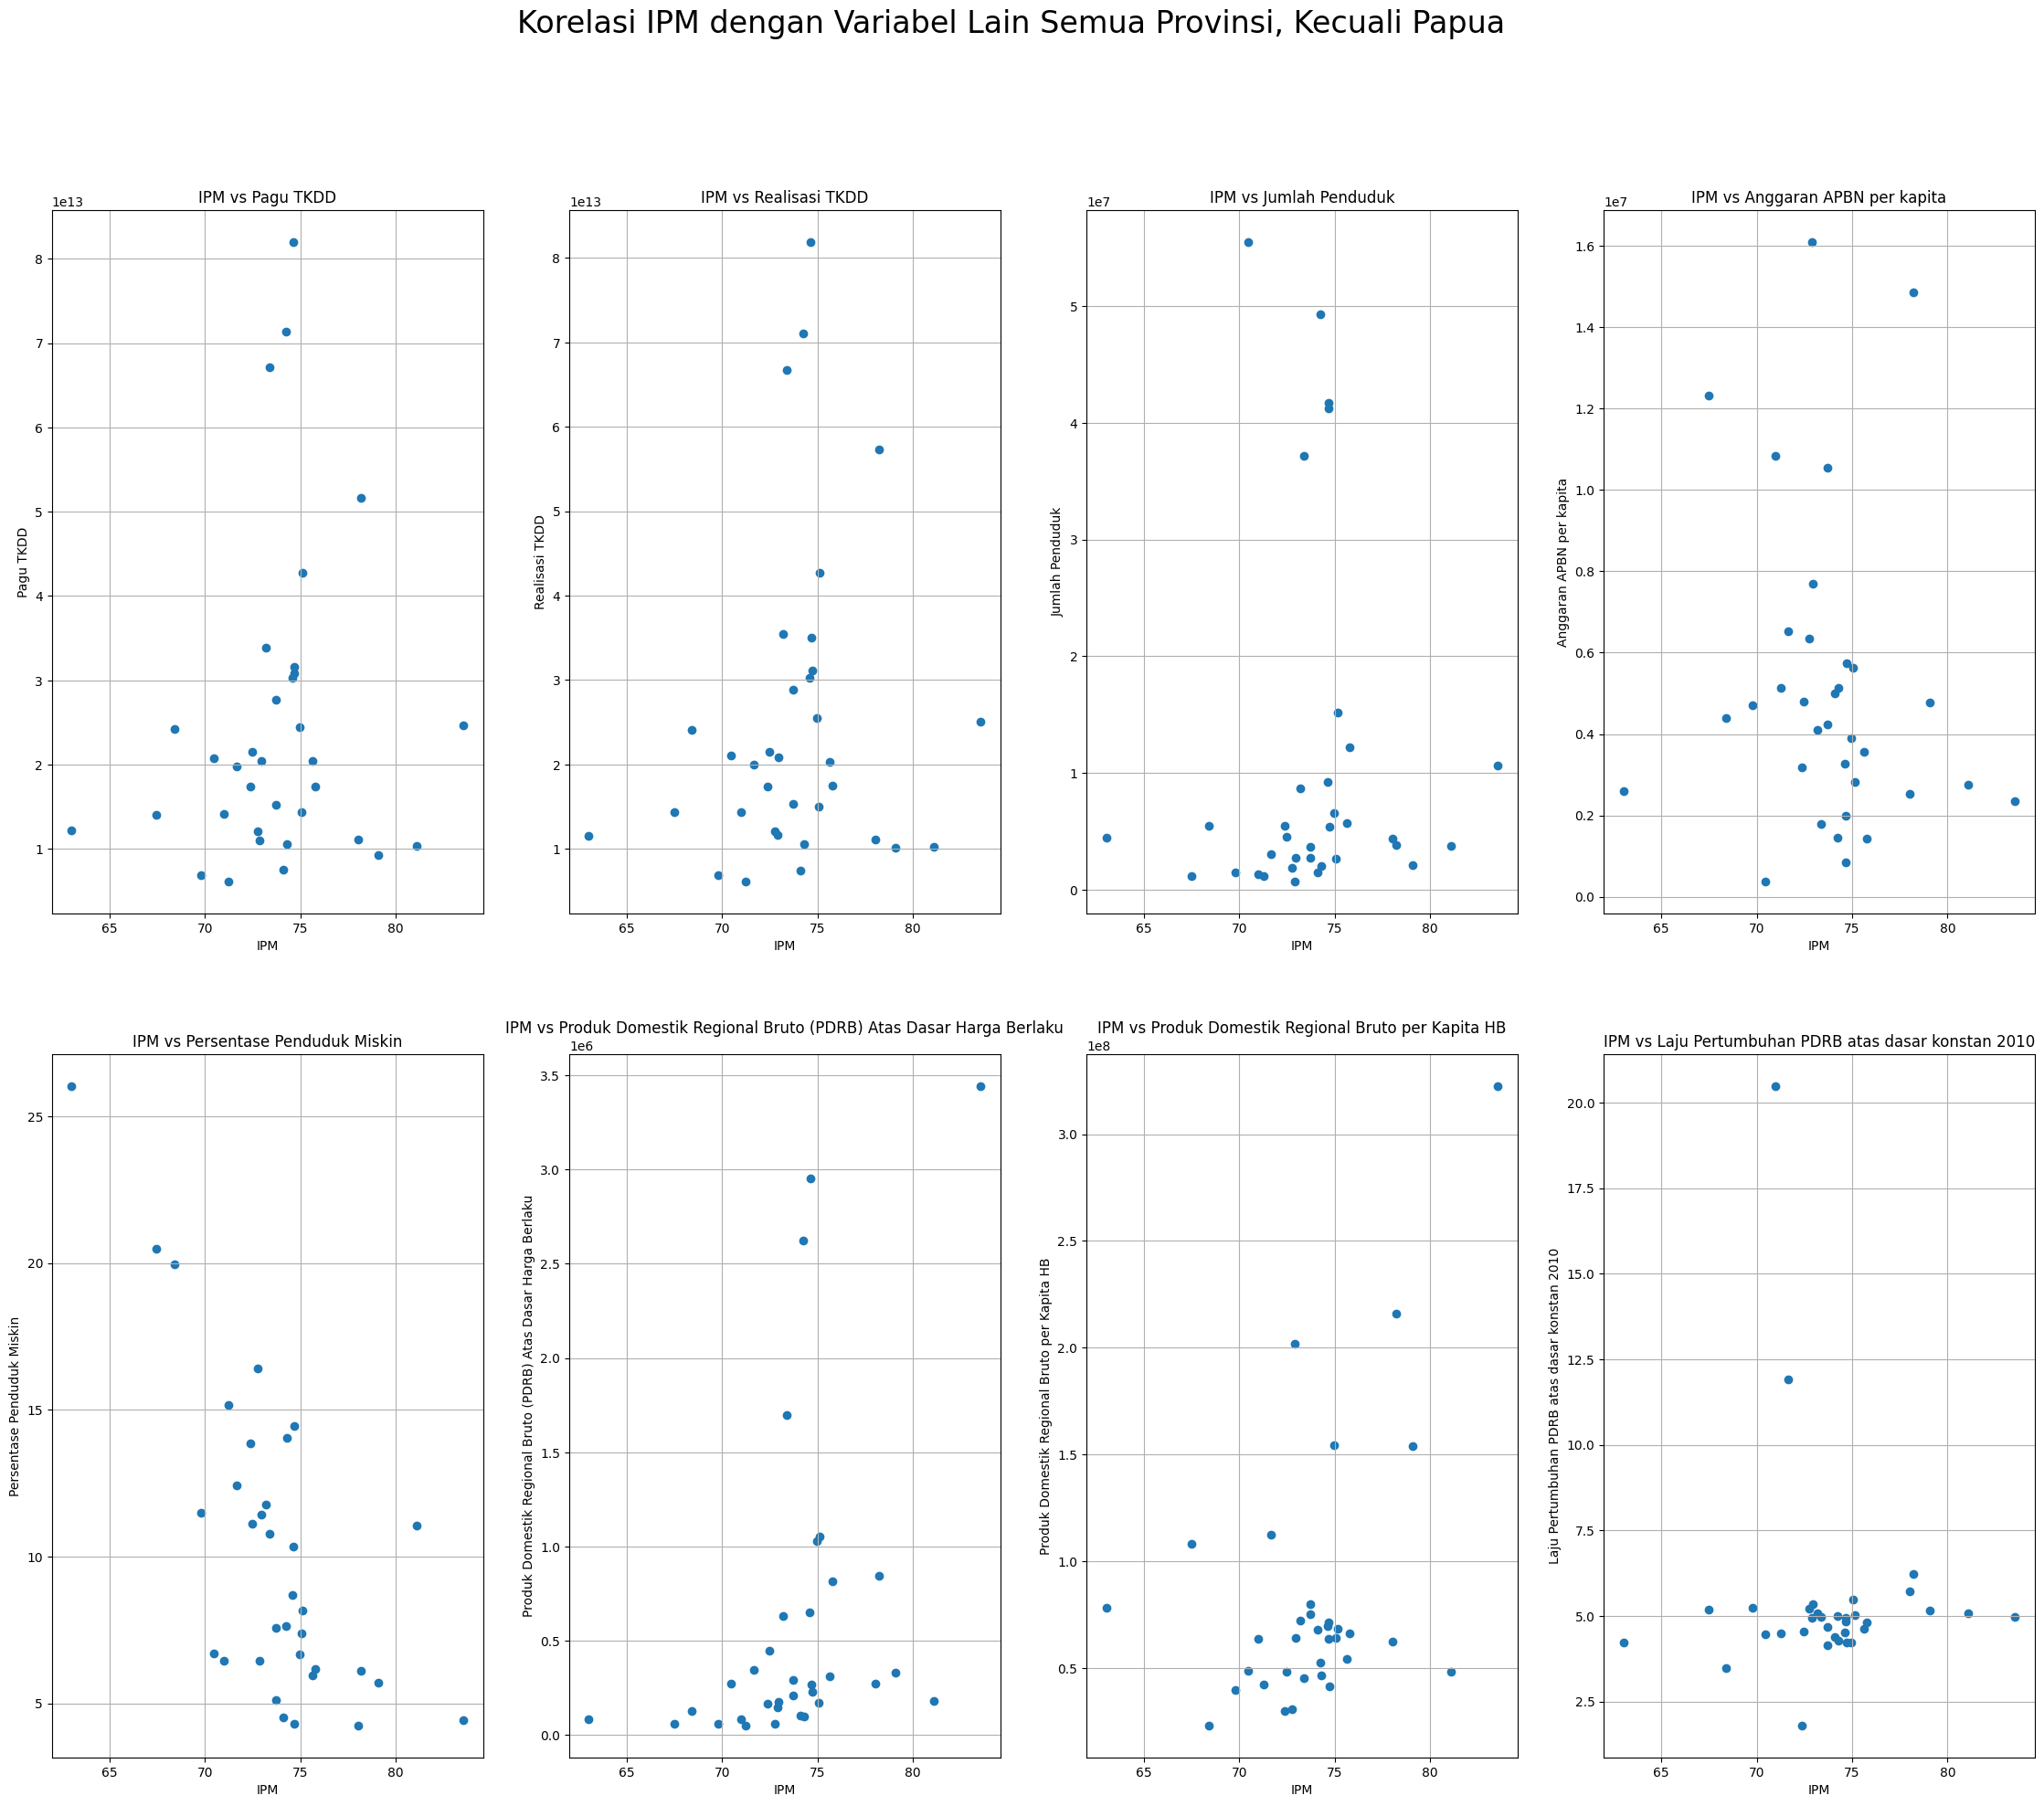

In [ ]:
ipm_sort = df_regresi.sort_values('IPM')
col = ['Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin',
       'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB',
       'Laju Pertumbuhan PDRB atas dasar konstan 2010']

plt.figure(figsize=(28, 22))

for i in range(len(col)):
  plt.subplot(2, 4, i+1)
  plt.scatter(ipm_sort['IPM'], ipm_sort[col[i]])
  plt.xlabel("IPM")
  plt.ylabel(col[i])
  plt.title(f"IPM vs {col[i]}")
  plt.grid()

plt.suptitle("Korelasi IPM dengan Variabel Lain Semua Provinsi, Kecuali Papua", fontsize=24)
plt.show()

<p align="justify">Pada kolom ini, teknik imputasi Regresi Linier Multivariabel digunakan untuk mengisi data yang hilang pada kolom IPM wilayah provinsi di Papua yang baru terbentuk. Secara teknis, proses imputasi Linier Ragression Multivariabel ini dilakukan training model imputasi regresi sebelum tahap selanjutnya. Pada penentuan data IPM yang hilang, <b><i>training</i> model imputasi regresi  hanya dilakukan di Provinsi Papua dan Papua Barat</b>, bukan wilayah Provinsi Papua Pegunungan, Papua Barat Daya, Papua Selatan dan Papua Tengah. Hal tersebut dilakukan karena keempat provinsi tersebut baru saja terbentuk, sehingga data yang tersaji belum cukup lengkap untuk bahan <i>training</i> mode imputasi regresi.</p>

In [ ]:
# Fitur dipilih berdasarkan hipotesis, percobaan, dan nilai korelasi
feature = ['Produk Domestik Regional Bruto per Kapita HB', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
           'Laju Pertumbuhan PDRB atas dasar konstan 2010', 'Jumlah Penduduk']
target = ['IPM']
papua_lain = ['PAPUA', 'PAPUA BARAT']

# Model perlu dilatih ulang dengan data yang lebih lengkap
model_ipm = LinearRegression()
model_ipm.fit(df_regresi[df_regresi['Provinsi'].isin(papua_lain)][feature], df_regresi[df_regresi['Provinsi'].isin(papua_lain)][target])

imputasi_ipm = model_ipm.predict(df[df['Provinsi'].isin(papua)][feature])
imputasi_ipm

array([[60.10778841],
       [54.08359753],
       [60.22987421],
       [66.79211047]])

In [ ]:
# Imputasi pada provinsi di Papua
df.loc[df['Provinsi'].isin(papua), 'IPM'] = imputasi_ipm

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'].isin(papua)]

Provinsi        IPM     Pagu TKDD  Realisasi TKDD  \
25  PAPUA BARAT DAYA  60.107788  1.016348e+13    1.013204e+13   
26  PAPUA PEGUNUNGAN  54.083598  1.354314e+13    1.282176e+13   
27     PAPUA SELATAN  60.229874  8.094830e+12    7.658020e+12   
28      PAPUA TENGAH  66.792110  1.439523e+13    1.494127e+13   

    Jumlah Penduduk  Anggaran APBN per kapita  Persentase Penduduk Miskin  \
25     6.113520e+06              1.657317e+06                         NaN   
26     1.448369e+06              8.852549e+06                         NaN   
27     5.344130e+05              1.432978e+07                         NaN   
28     1.351659e+06              1.105402e+07                         NaN   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
25                                           36104.57                
26                                           24433.99                
27                                           31357.75                
28                                          150377.18                

    Produk Domestik Regional Bruto per Kapita HB  \
25                                      58450000   
26                                      16870000   
27                                      58677000   
28                                     103508000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
25                                           1.82  
26                                           4.78  
27                                           4.23  
28                                           5.95

<h3>4. Persentase Penduduk Miskin</h3>

<p align="justify">
Seperti visualisasi grafik serta matriks korelasi yang sudah dijelaskan sebelumnya, <b> variabel IPM sangat erat dependensinya terhadap Persentase Penduduk Miskin </b>. Hal inilah yang menjadi dasar dalam menentukan teknik imputasi untuk kolom Persentase Penduduk Miskin pada Provinsi Papua Barat Daya, Papua Pegunungan, Papua Selatan, dan Papua Tengah. Jadi, metode Regresi Linear Multivariabel akan digunakan dalam mengisi data yang hilang karena variabelnya saling dependensi.
</p>

In [ ]:
# Menggunakan fitur IPM karena merupakan satu-satunya fitur yang berkorelasi tinggi dengan Persentase Penduduk Miskin
feature = ['IPM']
target = ['Persentase Penduduk Miskin']

# Model perlu dilatih ulang dengan data yang lebih lengkap
model_pendudukmiskin = LinearRegression()
model_pendudukmiskin.fit(df_regresi[feature], df_regresi[target])

imputasi_pendudukmiskin = model_pendudukmiskin.predict(df[df['Provinsi'].isin(papua)][feature])
imputasi_pendudukmiskin = np.round(imputasi_pendudukmiskin, 2)
imputasi_pendudukmiskin

array([[23.14],
       [28.9 ],
       [23.03],
       [16.76]])

In [ ]:
# Imputasi pada provinsi di Papua
df.loc[df['Provinsi'].isin(papua), 'Persentase Penduduk Miskin'] = imputasi_pendudukmiskin

In [ ]:
# Verifikasi apakah data sudah masuk
df[df['Provinsi'].isin(papua)]

Provinsi        IPM     Pagu TKDD  Realisasi TKDD  \
25  PAPUA BARAT DAYA  60.107788  1.016348e+13    1.013204e+13   
26  PAPUA PEGUNUNGAN  54.083598  1.354314e+13    1.282176e+13   
27     PAPUA SELATAN  60.229874  8.094830e+12    7.658020e+12   
28      PAPUA TENGAH  66.792110  1.439523e+13    1.494127e+13   

    Jumlah Penduduk  Anggaran APBN per kapita  Persentase Penduduk Miskin  \
25     6.113520e+06              1.657317e+06                       23.14   
26     1.448369e+06              8.852549e+06                       28.90   
27     5.344130e+05              1.432978e+07                       23.03   
28     1.351659e+06              1.105402e+07                       16.76   

    Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
25                                           36104.57                
26                                           24433.99                
27                                           31357.75                
28                                          150377.18                

    Produk Domestik Regional Bruto per Kapita HB  \
25                                      58450000   
26                                      16870000   
27                                      58677000   
28                                     103508000   

    Laju Pertumbuhan PDRB atas dasar konstan 2010  
25                                           1.82  
26                                           4.78  
27                                           4.23  
28                                           5.95

<a name="ringkasan-imputasi"></a>
### **3.3.3. Ringkasan Proses Pembersihan Data**

<p align="justify">
Proses penganangan data hilang dilakukan menggunakan <b>imputasi untuk menghindari hilangnya informasi penting</b>. Teknik imputasi yang digunakan menyesuaikan dengan fitur apa yang memiliki data hilang, seperti penggunaan algoritma <b>Regresi</b> untuk beberapa fitur dependen (IPM dan Anggaran APBN per kapita jika tidak terdapat informasi Realisasi TKDD atau Jumlah Penduduk) dan beberapa rumus tertentu untuk fitur-fitur yang saling berkaitan.
</p>

<p align="justify">
Pada teknik regresi, <b>pemilihan fitur untuk melatih model <i>Linear Regression</i> dilakukan berdasarkan nilai korelasi dan hipotesis/percobaan yang telah dilakukan</b>. Nilai imputasi yang dihasilkan pun memiliki nilai yang cukup baik/mirip dengan sumber aslinya, seperti pada tabel di bawah ini:
</p>

<ul>
  <li>Provinsi Sulawesi Utara</li>
  <table>
    <tr>
      <th>No</th>
      <th>Kolom</th>
      <th>Hasil Imputasi</th>
      <th>Nilai Asli</th>
    </tr>
    <tr>
      <td align="center">1</td>
      <td>Pagu TKDD</td>
      <td align="center">1.323707e+13</td>
      <td align="center">1.322112e+13</td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td>Realisasi TKDD</td>
      <td align="center">1.372409e+13</td>
      <td align="center">1.319989e+13</td>
    </tr>
    <tr>
      <td align="center">3</td>
      <td>Anggaran APBN per kapita</td>
      <td align="center">5157879.94</td>
      <td align="center">-</td>
    </tr>
  </tr>
  </table>
  <br>

  <li>Provinsi Papua Pegunungan</li>
  <table>
    <tr>
      <th>No</th>
      <th>Kolom</th>
      <th>Hasil Imputasi</th>
      <th>Nilai Asli</th>
    </tr>
    <tr>
      <td align="center">1</td>
      <td>IPM</td>
      <td align="center">54.08</td>
      <td align="center">52.45</td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td>Jumlah Penduduk</td>
      <td align="center">1448369</td>
      <td align="center">1460000</td>
    </tr>
    <tr>
      <td align="center">3</td>
      <td>Anggaran APBN per kapita</td>
      <td align="center">8852549.00</td>
      <td align="center">-</td>
    </tr>
    <tr>
      <td align="center">4</td>
      <td>Persentase Penduduk Miskin</td>
      <td align="center">28.90</td>
      <td align="center">-</td>
    </tr>
  </tr>
  </table>
  <br>

  <li>Provinsi Papua Selatan</li>
  <table>
    <tr>
      <th>No</th>
      <th>Kolom</th>
      <th>Hasil Imputasi</th>
      <th>Nilai Asli</th>
    </tr>
    <tr>
      <td align="center">1</td>
      <td>IPM</td>
      <td align="center">60.23</td>
      <td align="center">67.27</td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td>Jumlah Penduduk</td>
      <td align="center">534413</td>
      <td align="center">533910</td>
    </tr>
    <tr>
      <td align="center">3</td>
      <td>Anggaran APBN per kapita</td>
      <td align="center">14329780.00</td>
      <td align="center">-</td>
    </tr>
    <tr>
      <td align="center">4</td>
      <td>Persentase Penduduk Miskin</td>
      <td align="center">23.03</td>
      <td align="center">-</td>
    </tr>
  </tr>
  </table>
  <br>

  <li>Provinsi Papua Barat Daya</li>
  <table>
    <tr>
      <th>No</th>
      <th>Kolom</th>
      <th>Hasil Imputasi</th>
      <th>Nilai Asli</th>
    </tr>
    <tr>
      <td align="center">1</td>
      <td>IPM</td>
      <td align="center">60.11</td>
      <td align="center">68.05</td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td>Persentase Penduduk Miskin</td>
      <td align="center">23.14</td>
      <td align="center">-</td>
    </tr>
  </tr>
  </table>
  <br>

  <li>Provinsi Papua Tengah</li>
  <table>
    <tr>
      <th>No</th>
      <th>Kolom</th>
      <th>Hasil Imputasi</th>
      <th>Nilai Asli</th>
    </tr>
    <tr>
      <td align="center">1</td>
      <td>IPM</td>
      <td align="center">66.79</td>
      <td align="center">58.93</td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td>Persentase Penduduk Miskin</td>
      <td align="center">16.76</td>
      <td align="center">-</td>
    </tr>
  </tr>
  </table>
  <br>
</ul>

Sumber:

*   [CAPAIAN INDIKATOR UTAMA PEMBANGUNAN - INDEKS PEMBANGUNAN MANUSIA](https://simreg.bappenas.go.id/home/pemantauan/ipm)
*   [Capaian Indikator Utama Pembangunan - Tingkat Kemiskinan](https://simreg.bappenas.go.id/home/simpemantauan/tk)
*   [Jumlah Penduduk di 38 Provinsi Indonesia Desember 2023](https://databoks.katadata.co.id/demografi/statistik/d88acbb7c85bdb3/jumlah-penduduk-di-38-provinsi-indonesia-desember-2023)
*   [POSTUR TKDD Se-Prov. Provinsi Sulawesi Utara Tahun 2023](https://djpk.kemenkeu.go.id/portal/data/tkdd?tahun=2023&provinsi=18&pemda=--)


<a name="EDA"></a>
# **4. Analisis Data Eksploratif (Exploratory Data Analysis - EDA)**

<p align="justify">
Menganalisis dan eksplorasi data dapat dilakukan dengan beberapa metode statistik, seperti:

<ul>
  <li><b>Analisis Univariat</b></li>
    <p align="justify">
    Analisis univariat melibatkan pemeriksaan satu variabel (atau fitur) pada satu waktu. Ini adalah bentuk analisis data yang paling sederhana dan sering digunakan untuk menggambarkan karakteristik variabel individu.
    </p>
  <li><b>Analisis Bivariat</b></li>
    <p align="justify">
    Analisis bivariat melibatkan analisis dua variabel secara bersamaan untuk menentukan apakah ada hubungan atau asosiasi di antara keduanya. Analisis ini mengeksplorasi bagaimana perubahan pada satu variabel terkait dengan perubahan pada variabel lainnya.
    </p>
  <li><b>Analisis Multivariat</b></li>
    <p align="justify">
    Analisis multivariat melibatkan analisis simultan dari tiga variabel atau lebih untuk memahami hubungan dan interaksi yang kompleks di antara mereka. Analisis ini melampaui cakupan analisis univariat dan bivariat untuk mempertimbangkan beberapa faktor sekaligus.
    </p>
</ul>

</p>

Sumber: [Understanding Statistical Analysis: Univariate, Bivariate, and Multivariate Approaches](https://www.linkedin.com/pulse/understanding-statistical-analysis-univariate-bivariate-nandini-verma/)

<a name="statistik"></a>
## **4.1. Statistik Umum Data**

In [ ]:
# Cek ulang kelengkapan dataset
print(df.isnull().sum())

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64


In [ ]:
# Cek seluruh dataset
df

Provinsi        IPM     Pagu TKDD  Realisasi TKDD  \
0                   ACEH  74.700000  3.082148e+13    3.107456e+13   
1                   BALI  78.010000  1.115211e+13    1.106498e+13   
2                 BANTEN  75.770000  1.745338e+13    1.746738e+13   
3               BENGKULU  74.300000  1.057008e+13    1.055979e+13   
4          DI YOGYAKARTA  81.090000  1.035587e+13    1.024129e+13   
5            DKI JAKARTA  83.550000  2.469499e+13    2.508018e+13   
6              GORONTALO  71.250000  6.172420e+12    6.155410e+12   
7                  JAMBI  73.730000  1.523207e+13    1.535267e+13   
8             JAWA BARAT  74.240000  7.132176e+13    7.103169e+13   
9            JAWA TENGAH  73.390000  6.712969e+13    6.677206e+13   
10            JAWA TIMUR  74.650000  8.200830e+13    8.192189e+13   
11      KALIMANTAN BARAT  70.470000  2.079747e+13    2.109132e+13   
12    KALIMANTAN SELATAN  74.660000  3.163078e+13    3.498028e+13   
13     KALIMANTAN TENGAH  73.730000  2.769023e+13    2.886221e+13   
14      KALIMANTAN TIMUR  78.200000  5.164347e+13    5.731468e+13   
15      KALIMANTAN UTARA  72.880000  1.099441e+13    1.159327e+13   
16  KEP. BANGKA BELITUNG  74.090000  7.497480e+12    7.454150e+12   
17             KEP. RIAU  79.080000  9.246690e+12    1.015074e+13   
18               LAMPUNG  72.480000  2.150812e+13    2.152800e+13   
19                MALUKU  72.750000  1.213282e+13    1.204938e+13   
20          MALUKU UTARA  70.980000  1.420022e+13    1.430205e+13   
21   NUSA TENGGARA BARAT  72.370000  1.742235e+13    1.738705e+13   
22   NUSA TENGGARA TIMUR  68.400000  2.426085e+13    2.412650e+13   
23                 PAPUA  63.010000  1.221171e+13    1.151835e+13   
24           PAPUA BARAT  67.470000  1.401324e+13    1.439637e+13   
25      PAPUA BARAT DAYA  60.107788  1.016348e+13    1.013204e+13   
26      PAPUA PEGUNUNGAN  54.083598  1.354314e+13    1.282176e+13   
27         PAPUA SELATAN  60.229874  8.094830e+12    7.658020e+12   
28          PAPUA TENGAH  66.792110  1.439523e+13    1.494127e+13   
29                  RIAU  74.950000  2.447168e+13    2.552220e+13   
30        SULAWESI BARAT  69.800000  6.921800e+12    6.877950e+12   
31      SULAWESI SELATAN  74.600000  3.031335e+13    3.021665e+13   
32       SULAWESI TENGAH  71.660000  1.974932e+13    1.994741e+13   
33     SULAWESI TENGGARA  72.940000  2.046079e+13    2.084041e+13   
34        SULAWESI UTARA  75.040000  1.437531e+13    1.494958e+13   
35        SUMATERA BARAT  75.640000  2.042998e+13    2.026070e+13   
36      SUMATERA SELATAN  73.180000  3.386521e+13    3.543317e+13   
37        SUMATERA UTARA  75.130000  4.272587e+13    4.273261e+13   

    Jumlah Penduduk  Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0      5.409200e+06              5.744761e+06                       14.45   
1      4.374300e+06              2.529543e+06                        4.25   
2      1.216700e+07              1.435636e+06                        6.17   
3      2.059400e+06              5.127605e+06                       14.04   
4      3.712600e+06              2.758522e+06                       11.04   
5      1.064000e+07              2.357160e+06                        4.44   
6      1.198400e+06              5.136357e+06                       15.15   
7      3.633200e+06              4.225661e+06                        7.58   
8      4.930680e+07              1.440606e+06                        7.62   
9      3.718040e+07              1.795894e+06                       10.77   
10     4.123000e+07              1.986949e+06                       10.35   
11     5.549700e+07              3.800443e+05                        6.71   
12     4.170200e+07              8.388154e+05                        4.29   
13     2.737200e+06              1.054443e+07                        5.11   
14     3.856800e+06              1.486068e+07                        6.11   
15     7.201000e+05              1.609953e+07                        6.45   
16     1.492000

In [ ]:
# Mengubah kolom OPM untuk menjadi 2 angka di belakang koma
df['IPM'] = df['IPM'].round(2)

# Cek ulang IPM
df.head()

Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
0           ACEH  74.70  3.082148e+13    3.107456e+13        5409200.0   
1           BALI  78.01  1.115211e+13    1.106498e+13        4374300.0   
2         BANTEN  75.77  1.745338e+13    1.746738e+13       12167000.0   
3       BENGKULU  74.30  1.057008e+13    1.055979e+13        2059400.0   
4  DI YOGYAKARTA  81.09  1.035587e+13    1.024129e+13        3712600.0   

   Anggaran APBN per kapita  Persentase Penduduk Miskin  \
0                5744760.78                       14.45   
1                2529543.01                        4.25   
2                1435635.74                        6.17   
3                5127605.13                       14.04   
4                2758522.33                       11.04   

   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
0                                          227018.20                
1                                          274358.18                
2                                          814122.03                
3                                           96583.09                
4                                          180696.04                

   Produk Domestik Regional Bruto per Kapita HB  \
0                                      41408000   
1                                      62294000   
2                                      66147000   
3                                      46300000   
4                                      48360000   

   Laju Pertumbuhan PDRB atas dasar konstan 2010  
0                                           4.23  
1                                           5.71  
2                                           4.81  
3                                           4.28  
4                                           5.07

In [ ]:
df.describe()

IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
count  38.000000  3.800000e+01    3.800000e+01     3.800000e+01   
mean   72.352632  2.320189e+13    2.357395e+13     9.682810e+06   
std     5.688521  1.804549e+13    1.833256e+13     1.450232e+07   
min    54.080000  6.172420e+12    6.155410e+12     5.344130e+05   
25%    71.047500  1.139729e+13    1.153708e+13     1.936175e+06   
50%    73.560000  1.743786e+13    1.742722e+13     4.115550e+06   
75%    74.887500  2.694142e+13    2.802721e+13     8.124425e+06   
max    83.550000  8.200830e+13    8.192189e+13     5.549700e+07   

       Anggaran APBN per kapita  Persentase Penduduk Miskin  \
count              3.800000e+01                   38.000000   
mean               5.516899e+06                   11.443684   
std                4.075676e+06                    6.478836   
min                3.800443e+05                    4.250000   
25%                2.639822e+06                    6.452500   
50%                4.557838e+06                   10.560000   
75%                6.492716e+06                   14.347500   
max                1.609953e+07                   28.900000   

       Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  \
count                                       3.800000e+01                
mean                                        5.403080e+05                
std                                         8.182349e+05                
min                                         2.443399e+04                
25%                                         9.806901e+04                
50%                                         2.179008e+05                
75%                                         5.840892e+05                
max                                         3.443026e+06                

       Produk Domestik Regional Bruto per Kapita HB  \
count                                  3.800000e+01   
mean                                   7.956650e+07   
std                                    5.973829e+07   
min                                    1.687000e+07   
25%                                    4.823325e+07   
50%                                    6.392100e+07   
75%                                    7.735900e+07   
max                                    3.226190e+08   

       Laju Pertumbuhan PDRB atas dasar konstan 2010  
count                                      38.000000  
mean                                        5.273421  
std                                         2.924139  
min                                         1.800000  
25%                                         4.400000  
50%                                         4.890000  
75%                                         5.175000  
max                                        20.490000

<p align="justify">
Dari deskripsi dataset di atas, terdapat beberapa informasi penting yang bisa diambil, seperti:
<ul>
  <li><b>Indeks Pembangunan Manusia (IPM)</b></li>
  <ul>
    <li><b>Mean</b>: 72.35</li>
    <li><b>std</b>: 5.69</li>
    <li><b>min</b>: 54.08</li>
    <li><b>median</b>: 73.56</li>
    <li><b>max</b>: 83.55</li>
    <li align="justify"><b>Kualitas pembangunan di Indonesia pada tahun 2023 termasuk tinggi</b>. Namun, terlihat bahwa nilai tengah dari IPM yang lebih tinggi dari rata-rata yang menandakan bahwa <b>terdapat lebih banyak nilai IPM kecil yang menyebabkan rata-rata menurun</b>. Selain itu, IPM terkecil dan terbesar terpaut sangat jauh, menandakan bahwa <b>terdapat adanya kesenjangan pembangunan yang kurang merata</b>, terutama pada provinsi dengan IPM 83.55 dengan provinsi dengan IPM 54.08.</li>
  </ul>

  <li><b>Alokasi Anggaran dan Realisasi (TKDD)</b></li>
  <ul>
    <li align="justify">PKDD yang diberikan untuk setiap provinsi bernilai sangat besar (triliunan).</li>
    <li align="justify">Terlihat bahwa nilai dari standar deviasi (std) pada Pagu dan Realisasi TKDD sangat besar, hal ini menandakan <b>adanya variasi yang besar antara tiap TKDD di provinsi dengan nilai rata-ratanya, menunjukkan adanya ketimpangan alokasi dan realisasi anggaran yang cukup ekstrem antar provinsi</b>.</li>
  </ul>

  <li><b>Jumlah Penduduk</b></li>
  <ul>
    <li><b>std</b>: 60,451,170</li>
    <li><b>min</b>: 534,413</li>
    <li><b>max</b>: 55,497,000</li>
    <li align="justify">Nilai dari standar deviasi (std) pada sangat besar dan selisih antara nilai maksimum dan minimum pada Jumlah Penduduk di tiap provinsi menunjukkan bahwa <b>distribusi populasi di Indonesia juga tidak merata. Terdapat 1 provinsi dengan populasi mencapai sekitar 55 juta, sedangkan terdapat 1 provinsi lain dengan populasi hanya sekitar 534 ribu</b>.</li>
  </ul>

  <li><b>Persentase Kemiskinan</b></li>
  <ul>
    <li><b>mean</b>: 11.44</li>
    <li><b>min</b>: 4.25</li>
    <li><b>max</b>: 28.9</li>
    <li align="justify">Terdapat persentasi penduduk miskin yang cukup besar pada salah satu provinsi hingga mencapai 28.9%. Selain itu, nilai rata-rata banyak penduduk miskin untuk tiap provinsi masih menunjukkan angka yang cukup tinggi yaitu 11.44%. Hal ini <b>mengindikasikan bahwa negara Indonesia masih kurang mampu untuk menahan tingkat kemiskinan penduduk di tiap provinsi</b>. Selain itu, selisih besarnya persentase penduduk miskin minimum antara nilai minimum dan maksmimum mencapai hingga 20% lebih.</li>
  </ul>

  <li><b>Kekuatan Ekonomi (PDRB)</b></li>
  <ul>
    <li align="justify">PDRB harga dasar menunjukkan kekuatan ekonomi dari setiap provinsi. Standar deviasi bernilai 818,234.9 (miliar) menunjukkan	 <b>adanya variasi yang cukup besar dari PDRB tiap provinsi </b>. Selain itu, perbedaan/selisih dari nilai maksimum PDRB pada 1 provinsi sebesar 3,443,026 (miliar)	dengan nilai minimum PDRB pada 1 provinsi lain yang hanya sebesar 24,433.99 (triliun) <b>menunjukkan kesenjangan ekonomi regional yang sangat jelas antara 2 provinsi tersebut</b>.</li>
    <li align="justify">Sementara itu, standar deviasi pada PDRB per kapita senilai 59,738,290 juga menambahkan bahwa terdapat variasi kesenjangan ekonomi yang cukup signifikan pada setiap individu di provinsi yang berbeda.</li>
  </ul>
</ul>

</p>

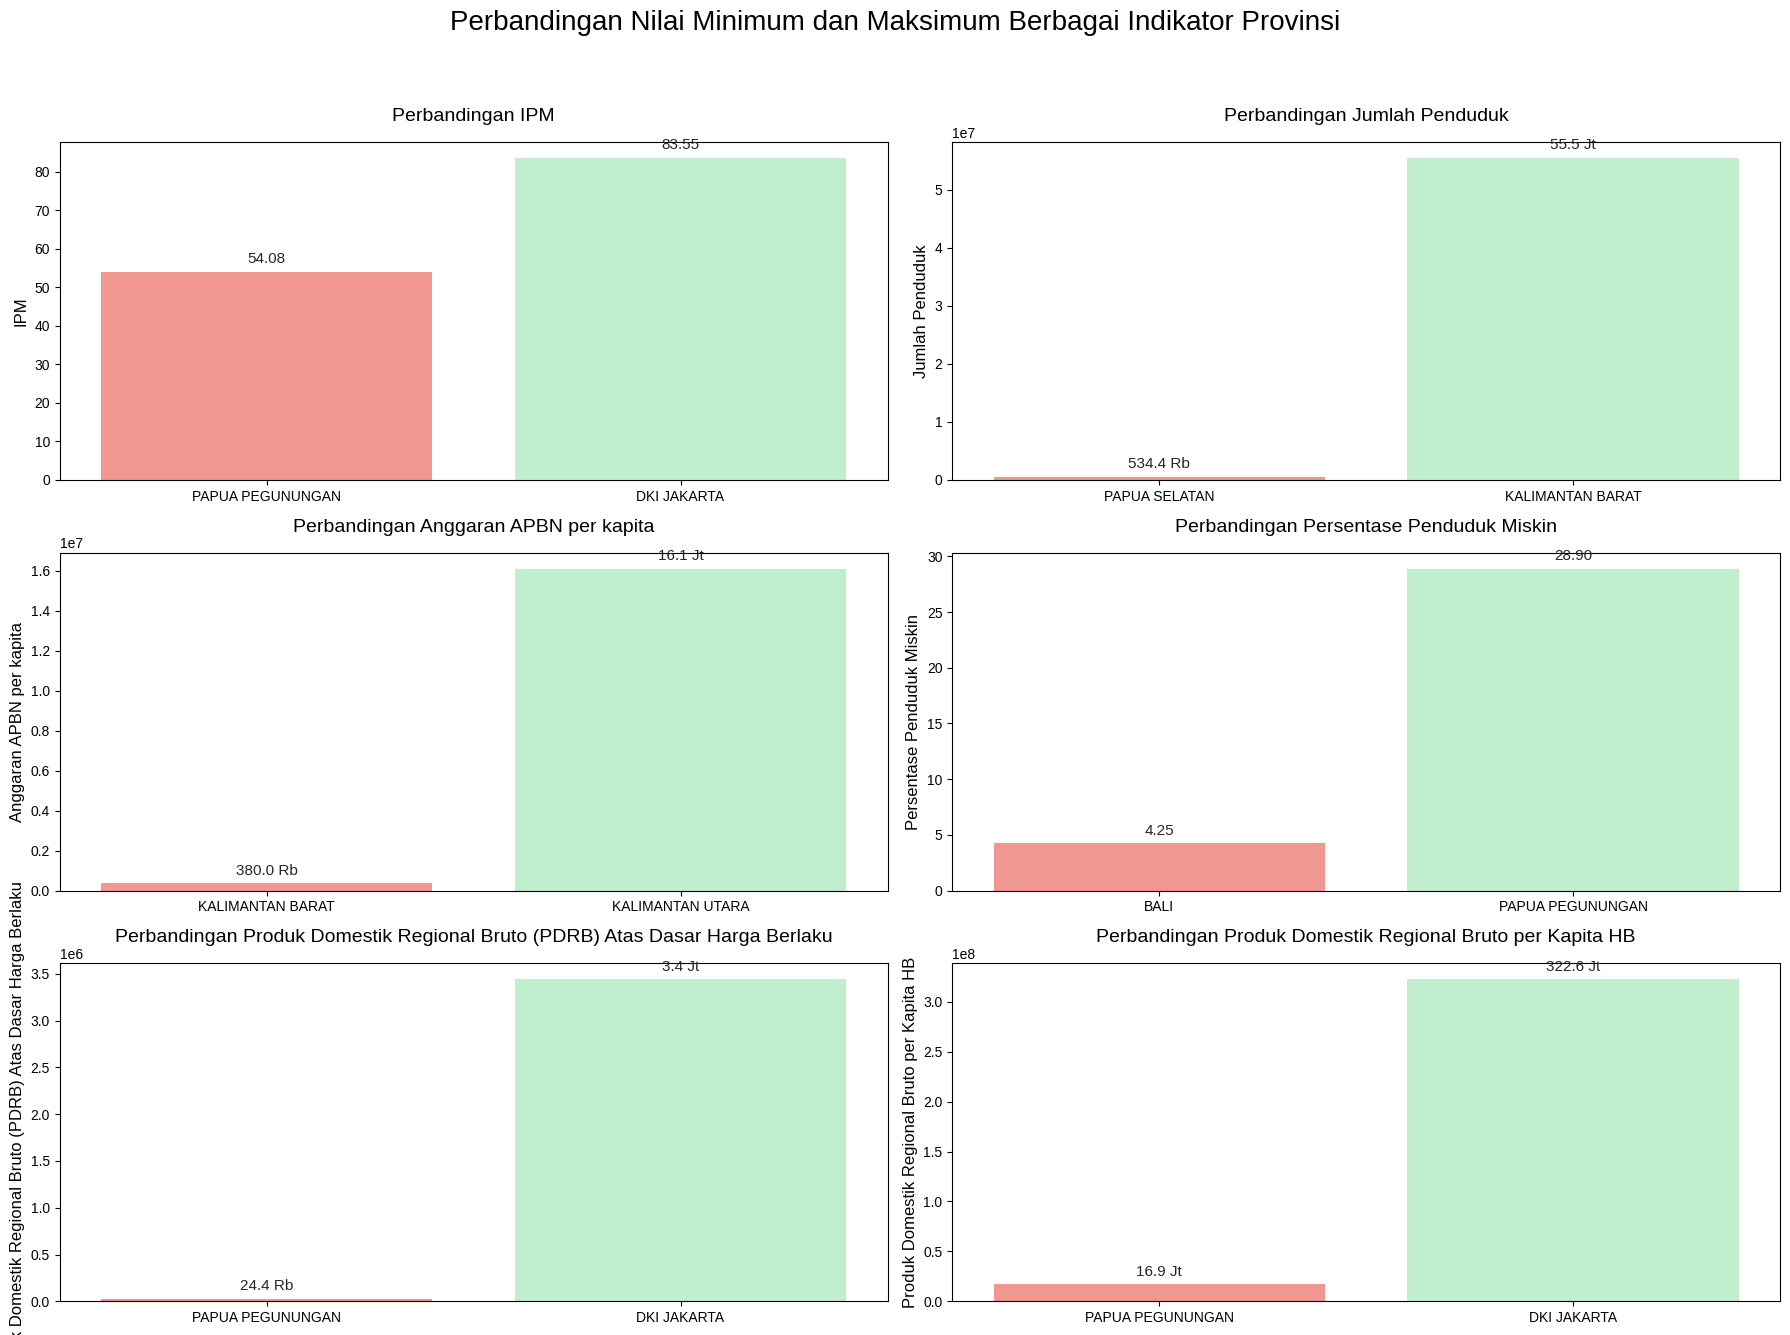

In [ ]:
columns_to_plot = [
    'IPM',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB'
]

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Perbandingan Nilai Minimum dan Maksimum Berbagai Indikator Provinsi', fontsize=20)
plt.style.use('seaborn-v0_8-whitegrid')

for col, ax in zip(columns_to_plot, axes.flatten()):
    min_idx = df[col].idxmin()
    max_idx = df[col].idxmax()

    df_subset = df.loc[[min_idx, max_idx]]

    sns.barplot(
        x='Provinsi',
        y=col,
        data=df_subset,
        ax=ax,
        hue='Provinsi',
        palette=['#ff8a80', '#b9f6ca'],
        legend=False
    )

    for p in ax.patches:
        height = p.get_height()
        if height > 1_000_000_000_000:
            label = f'{height/1_000_000_000_000:.1f} Triliun'
        elif height > 1_000_000_000:
            label = f'{height/1_000_000_000:.1f} Miliar'
        elif height > 1_000_000:
            label = f'{height/1_000_000:.1f} Jt'
        elif height > 1_000:
            label = f'{height/1_000:.1f} Rb'
        else:
            label = f'{height:.2f}'

        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 9),
            textcoords='offset points',
            fontsize=11
        )

    ax.set_title(f'Perbandingan {col}', fontsize=14, pad=15)
    ax.set_ylabel(col, fontsize=12)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<p align="justify">
Visualisasi di atas lebih men-detail-kan bagaimana perbandingan antara nilai minimum dan maksimum pada berbagai indikator pada beberapa provinsi. Melalui hasil visualisasi ini, terdapat beberapa <i>insight</i> yang menarik seperti:
</p>

<ul>
  <li align="justify">
  Provinsi Papua Pegunungan menjadi provinsi yang memiliki nilai paling kecil pada beberapa aspek seperti PDRB Atas Dasar Harga, PDRB per Kapita, dan Indeks Pembangunan Manusia (IPM), yang menunjukkan bahwa provinsi Papua Pegunungan masih terbilang cukup tertinggal dari provinsi lain. Sementara itu, provinsi Papua Pegunungan memiliki persentase penduduk miskin paling tinggi hingga mencapai 28.9%. Beberapa data dari provinsi Papua Pegunungan terlihat sebagai data anomali jika dibandingkan dengan statistik keseluruhan data pada tabel deskripsi sebelumnya. Hal ini bisa jadi disebabkan karena <b>Papua Pegunungan adalah salah satu dari 4 provinsi baru di Indonesia pada periode tahun 2023, yang juga menjadi alasan kenapa banyaknya nilai data hilang pada proses pembersihan data sebelumnya</b>.
  </li>
  <li align="justify">
  Provinsi DKI Jakarta menjadi salah satu provinsi paling maju di Indonesia dengan IPM dan PDRB paling tinggi.
  </li>
</ul>

<p align="justify">
Informasi tersebut semakin menguatkan bagaimana ketidak-merataan ekonomi dan pembangunan di Indonesia. Untuk melihat bagaimana perbandingan Pagu dan Realisasi TKDD pada setiap wilayah, hal tersebut akan dieksplorasi lebih lanjut pada tahap berikutnya di bawah ini.
</p>

<a name="tkdd"></a>
## **4.2. Analisis Kinerja Realisasi Anggaran Tiap Provinsi (TKDD)**

<p align="justify">
Setiap provinsi di Indonesia akan mendapatkan anggaran setiap tahunnya berupa TKDD yang bersumber dari APBN. TKDD yang diberikan kepada setiap daerah memiliki batas tertinggi atau plafon alokasi anggaran yang telah ditetapkan oleh Pemerintah Pusat yang disebut dengan Pagu TKDD. Namun, selama pelaksanaannya, penggunaan TKDD tiap daerah tidak selalu memenuhi alokasi pagu yang telah ditetapkan. Terkadang ada yang kurang dari pagu hingga melebihi batas pagu yang telah ditetapkan. Hal ini tentunya disebabkan oleh beberapa faktor atau variabel yang mempengaruhi realisasi TKDD pada suatu daerah. Oleh karena itu, bagian ini akan mencoba untuk mengeksplorasi bagaimana perbandingan pagu dan realisasi TKDD pada provinsi di Indonesia.
</p>

<a name="pagu-vs-realisasi"></a>
### **4.2.1. Analisis Bivariat: Eksplorasi Pagu TKDD vs Realisasi TKDD**

In [ ]:
# Mengubah format tampilan float untuk memperlihatkan nilai asli dari data
pd.options.display.float_format = '{:.2f}'.format

df_tkdd = df[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD']].copy()
df_tkdd

Provinsi         Pagu TKDD    Realisasi TKDD
0                   ACEH 30821480000000.00 31074560000000.00
1                   BALI 11152110000000.00 11064980000000.00
2                 BANTEN 17453380000000.00 17467380000000.00
3               BENGKULU 10570080000000.00 10559790000000.00
4          DI YOGYAKARTA 10355870000000.00 10241290000000.00
5            DKI JAKARTA 24694990000000.00 25080180000000.00
6              GORONTALO  6172420000000.00  6155410000000.00
7                  JAMBI 15232070000000.00 15352670000000.00
8             JAWA BARAT 71321760000000.00 71031690000000.00
9            JAWA TENGAH 67129690000000.00 66772060000000.00
10            JAWA TIMUR 82008300000000.00 81921890000000.00
11      KALIMANTAN BARAT 20797470000000.00 21091320000000.00
12    KALIMANTAN SELATAN 31630780000000.00 34980280000000.00
13     KALIMANTAN TENGAH 27690230000000.00 28862210000000.00
14      KALIMANTAN TIMUR 51643470000000.00 57314680000000.00
15      KALIMANTAN UTARA 10994410000000.00 11593270000000.00
16  KEP. BANGKA BELITUNG  7497480000000.00  7454150000000.00
17             KEP. RIAU  9246690000000.00 10150740000000.00
18               LAMPUNG 21508120000000.00 21528000000000.00
19                MALUKU 12132820000000.00 12049380000000.00
20          MALUKU UTARA 14200220000000.00 14302050000000.00
21   NUSA TENGGARA BARAT 17422350000000.00 17387050000000.00
22   NUSA TENGGARA TIMUR 24260850000000.00 24126500000000.00
23                 PAPUA 12211710000000.00 11518350000000.00
24           PAPUA BARAT 14013240000000.00 14396370000000.00
25      PAPUA BARAT DAYA 10163480000000.00 10132040000000.00
26      PAPUA PEGUNUNGAN 13543140000000.00 12821760000000.00
27         PAPUA SELATAN  8094830000000.00  7658020000000.00
28          PAPUA TENGAH 14395230000000.00 14941270000000.00
29                  RIAU 24471680000000.00 25522200000000.00
30        SULAWESI BARAT  6921800000000.00  6877950000000.00
31      SULAWESI SELATAN 30313350000000.00 30216650000000.00
32       SULAWESI TENGAH 19749320000000.00 19947410000000.00
33     SULAWESI TENGGARA 20460790000000.00 20840410000000.00
34        SULAWESI UTARA 14375311480155.43 14949581210831.79
35        SUMATERA BARAT 20429980000000.00 20260700000000.00
36      SUMATERA SELATAN 33865210000000.00 35433170000000.00
37        SUMATERA UTARA 42725870000000.00 42732610000000.00

In [ ]:
df_tkdd['Persentase Realisasi TKDD (Persen)'] = (df_tkdd['Realisasi TKDD'] / df_tkdd['Pagu TKDD']) * 100
df_tkdd

Provinsi         Pagu TKDD    Realisasi TKDD  \
0                   ACEH 30821480000000.00 31074560000000.00   
1                   BALI 11152110000000.00 11064980000000.00   
2                 BANTEN 17453380000000.00 17467380000000.00   
3               BENGKULU 10570080000000.00 10559790000000.00   
4          DI YOGYAKARTA 10355870000000.00 10241290000000.00   
5            DKI JAKARTA 24694990000000.00 25080180000000.00   
6              GORONTALO  6172420000000.00  6155410000000.00   
7                  JAMBI 15232070000000.00 15352670000000.00   
8             JAWA BARAT 71321760000000.00 71031690000000.00   
9            JAWA TENGAH 67129690000000.00 66772060000000.00   
10            JAWA TIMUR 82008300000000.00 81921890000000.00   
11      KALIMANTAN BARAT 20797470000000.00 21091320000000.00   
12    KALIMANTAN SELATAN 31630780000000.00 34980280000000.00   
13     KALIMANTAN TENGAH 27690230000000.00 28862210000000.00   
14      KALIMANTAN TIMUR 51643470000000.00 57314680000000.00   
15      KALIMANTAN UTARA 10994410000000.00 11593270000000.00   
16  KEP. BANGKA BELITUNG  7497480000000.00  7454150000000.00   
17             KEP. RIAU  9246690000000.00 10150740000000.00   
18               LAMPUNG 21508120000000.00 21528000000000.00   
19                MALUKU 12132820000000.00 12049380000000.00   
20          MALUKU UTARA 14200220000000.00 14302050000000.00   
21   NUSA TENGGARA BARAT 17422350000000.00 17387050000000.00   
22   NUSA TENGGARA TIMUR 24260850000000.00 24126500000000.00   
23                 PAPUA 12211710000000.00 11518350000000.00   
24           PAPUA BARAT 14013240000000.00 14396370000000.00   
25      PAPUA BARAT DAYA 10163480000000.00 10132040000000.00   
26      PAPUA PEGUNUNGAN 13543140000000.00 12821760000000.00   
27         PAPUA SELATAN  8094830000000.00  7658020000000.00   
28          PAPUA TENGAH 14395230000000.00 14941270000000.00   
29                  RIAU 24471680000000.00 25522200000000.00   
30        SULAWESI BARAT  6921800000000.00  6877950000000.00   
31      SULAWESI SELATAN 30313350000000.00 30216650000000.00   
32       SULAWESI TENGAH 19749320000000.00 19947410000000.00   
33     SULAWESI TENGGARA 20460790000000.00 20840410000000.00   
34        SULAWESI UTARA 14375311480155.43 14949581210831.79   
35        SUMATERA BARAT 20429980000000.00 20260700000000.00   
36      SUMATERA SELATAN 33865210000000.00 35433170000000.00   
37        SUMATERA UTARA 42725870000000.00 42732610000000.00   

    Persentase Realisasi TKDD (Persen)  
0                               100.82  
1                                99.22  
2                               100.08  
3                                99.90  
4                                98.89  
5                               101.56  
6                                99.72  
7                               100.79  
8                                99.59  
9                                99.47  
10                               99.89  
11                              101.41  
12                              110.59  
13                              104.23  
14                              110.98  
15                              105.45  
16                               99.42  
17                              109.78  
18                              100.09  
19                               99.31  
20                              100.72  
21                               99.80  
22                               99.45  
23                               94.32  
24                              102.73  
25                               99.69  
26                               94.67  
27                               94.60  
28                              103.79  
29                              104.29  
30                               99.37  
31                               99.68  
32                              101.00  
33                              101.86  
34                              103.99  
35                               99.17  
36

<h3>Analisis Bivariat: Pagu TKDD vs Realisasi TKDD</h3>

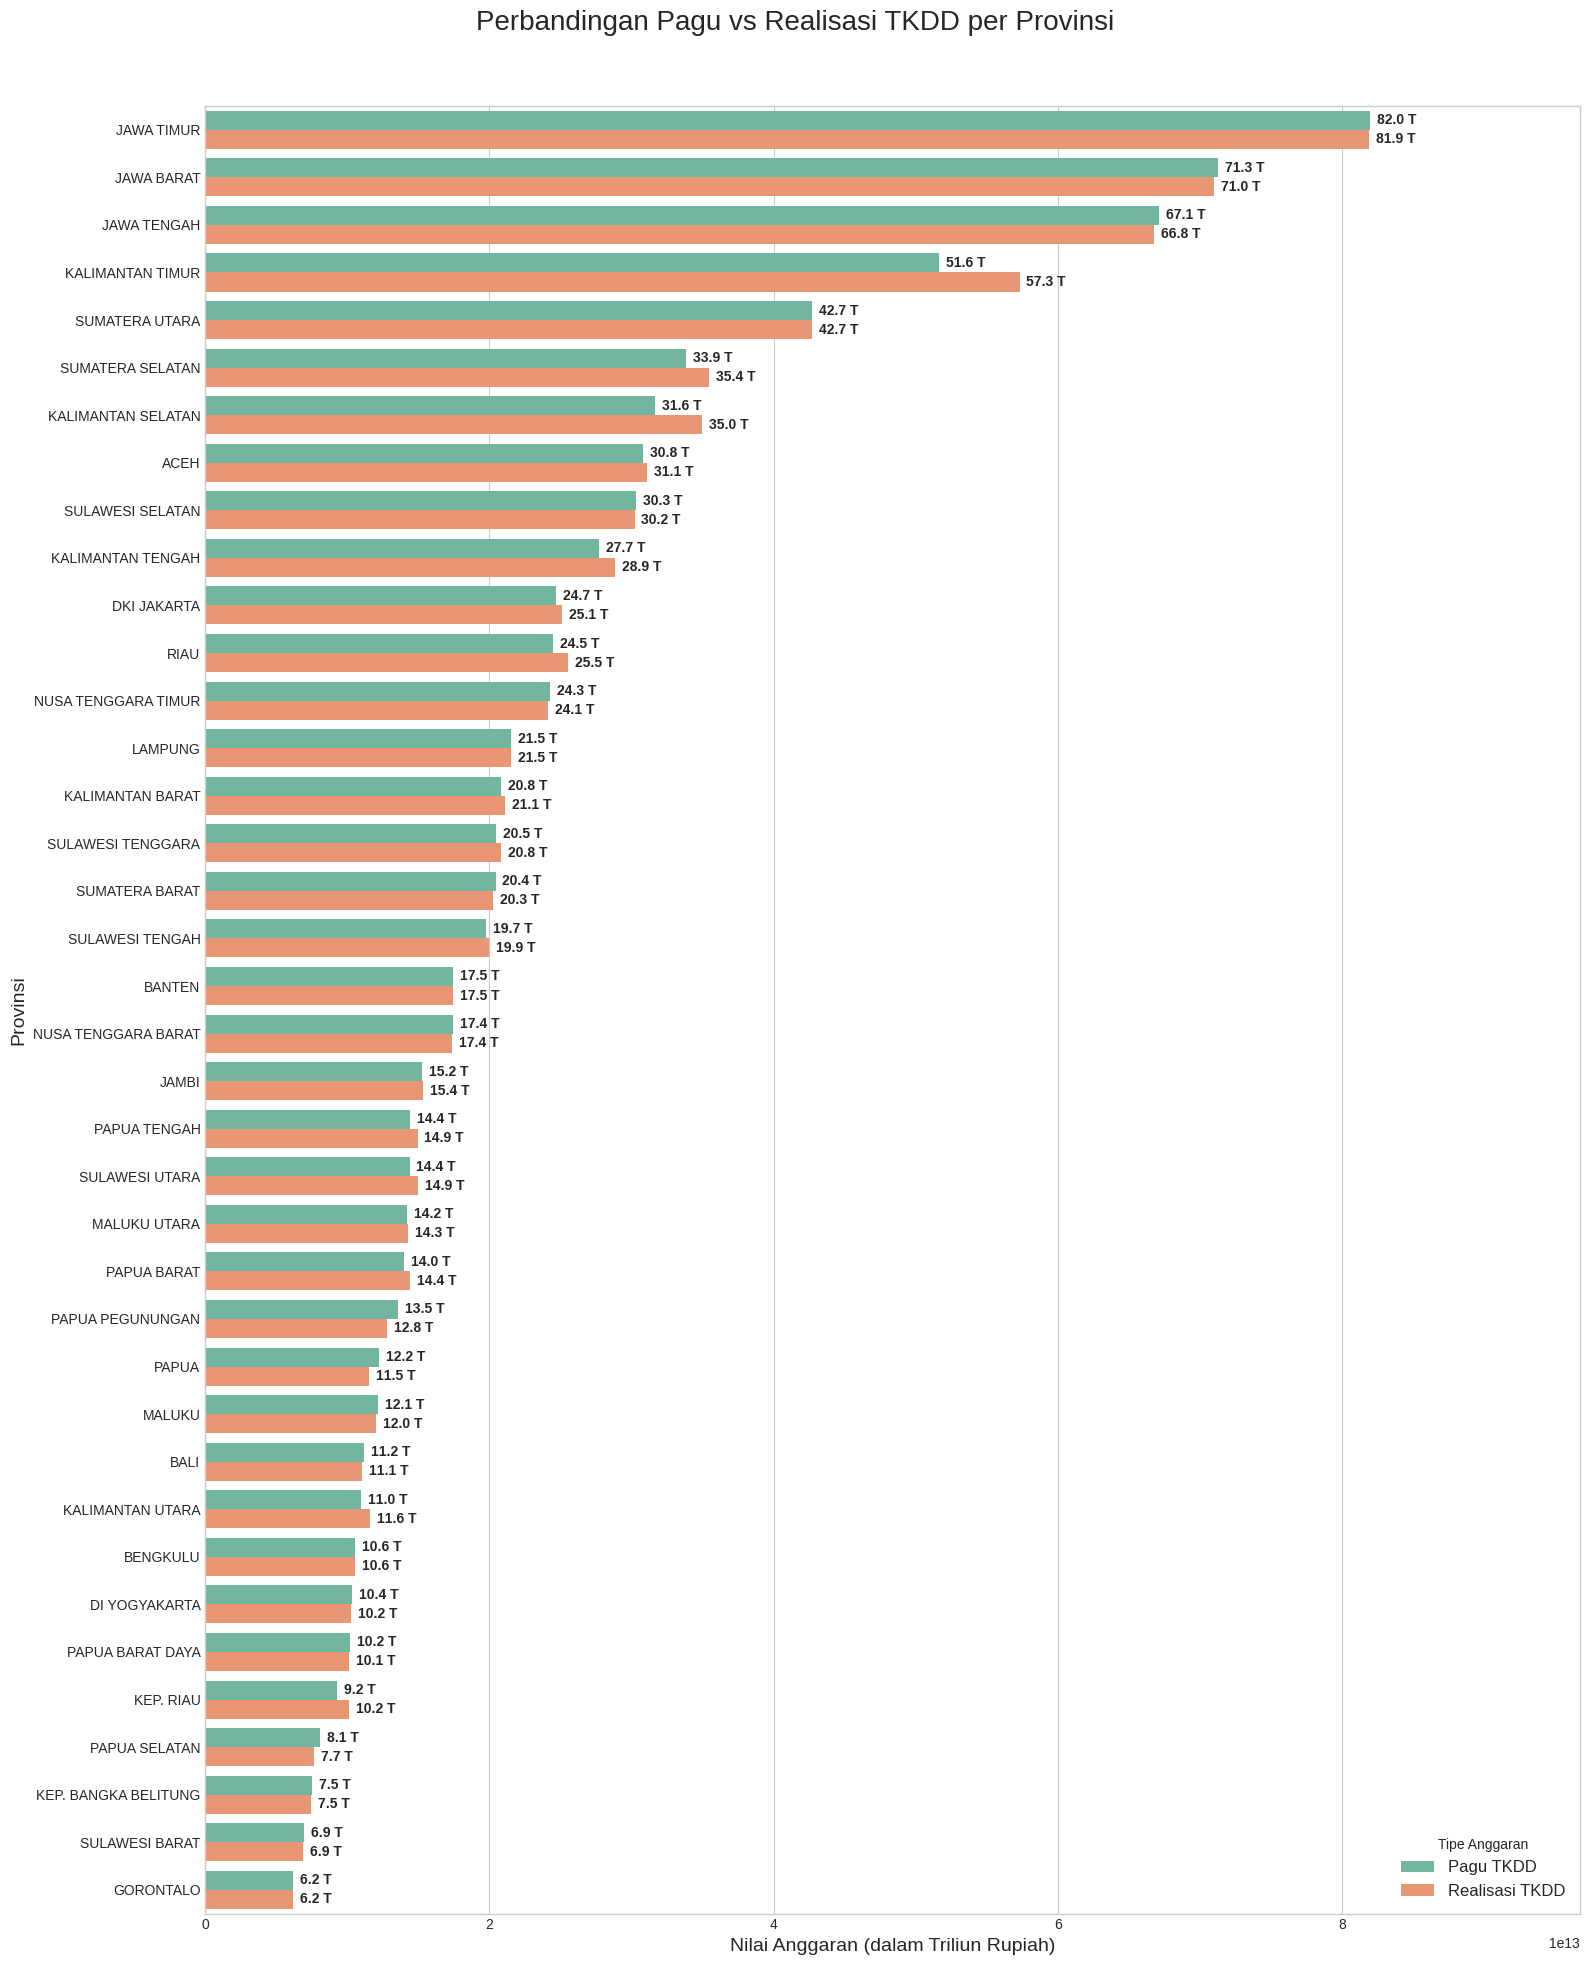

In [ ]:
df_gabungan = pd.melt(
    df_tkdd,
    id_vars=['Provinsi'],
    value_vars=['Pagu TKDD', 'Realisasi TKDD'],
    var_name='Tipe Anggaran',
    value_name='Nilai'
)

provinsi_order = df_tkdd.sort_values('Pagu TKDD', ascending=False)['Provinsi']

fig, ax = plt.subplots(figsize=(16, 20))
fig.suptitle('Perbandingan Pagu vs Realisasi TKDD per Provinsi', fontsize=20)
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x='Nilai',
    y='Provinsi',
    hue='Tipe Anggaran',
    data=df_gabungan,
    order=provinsi_order,
    ax=ax,
    palette={'Pagu TKDD': '#66c2a5', 'Realisasi TKDD': '#fc8d62'}
)

for container in ax.containers:
    labels = [f'{v.get_width() / 1e12:.1f} T' for v in container]
    ax.bar_label(
        container,
        labels=labels,
        label_type='edge',
        padding=5,
        fontsize=10,
        fontweight='bold'
    )

ax.set_xlabel('Nilai Anggaran (dalam Triliun Rupiah)', fontsize=14)
ax.set_ylabel('Provinsi', fontsize=14)
ax.set_xlim(right=df_tkdd['Pagu TKDD'].max() * 1.18)
ax.legend(title='Tipe Anggaran', loc='lower right', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<p align="justify">
Visualisasi tersebut memperlihatkan bagaimana persebaran dari TKDD untuk setiap provinsi beserta nilai belanja aktual (Realisasi TKDD) di setiap provinsi Indonesia pada tahun 2023. Berikut beberapa <i>insight</i> penting yang bisa diperoleh dari hasil visualisasi di atas:
</p>

<ul>
  <li align="justify">
  <b>Tingkat realisasi pada setiap provinsi terbilang cukup baik dengan selisih yang terpaut tidak terlalu jauh dengan pagu yang ditetapkan oleh Pemerintah Pusat</b>. Bisa dibilang setiap provinsi berhasil memanfaatkan anggaran yang diberikan dengan baik, terbukti dengan hasil realisasi mendekati target yang telah ditetapkan, walaupun memang terdapat beberapa provinsi yang jauh melebihi target seperti provinsi Kalimantan Timur.
  </li>
  <li align="justify">
  Walaupun tingkat realisasi cukup baik, grafik ini juga menggambarkan bagaimana ketidarmerataan persebaran anggaran untuk setiap wilayah. Perbandingan selisih antara provinsi yang menerima pagu tertinggi (Jawa Barat) dengan provinsi yang menerima pagu terendah (Gorontalo) terpaut sangat jauh hingga mencapai 70 triliun lebih. <b>Hal ini menggarisbawahi perbedaan fundamental dalam kapasitas ekonomi dan kebutuhan pendanaan di seluruh Indonesia</b>.
  </li>
</ul>

<p align="justify">
Melalui informasi ini, lagi-lagi diperlihatkan bagaimana perbedaan kemampuan ekonomi yang sangat ketara antar-provinsi di Indonesia. Perbedaan besar pada kapasitas ekonomi tiap daerah menunjukkan bahwa <b>pertumbuhan ekonomi pada tiap daerah yang tidak merata, yang berarti pembangunan di Indonesia juga tidak merata</b>. Jika permasalahan ini tidak segera diatasi, maka <b>dapat menyebabkan pendapatan negara tidak maksimal dan semakin terbelakangnya penduduk pada wilayah terpencil</b> (Okwita A., 2016).
</p>

Sumber: [Okwita A., 2016, WACANA DAN KETIDAKMERATAN PEMBANGUNAN DI INDONESIA](https://www.journal.unrika.ac.id/index.php/journalcahayapendidikan/article/download/646/480)

<a name="top-5-realisasi"></a>
### **4.2.2. Analisis Univariat: Eksplorasi Tingkat Realisasi TKDD Provinsi**

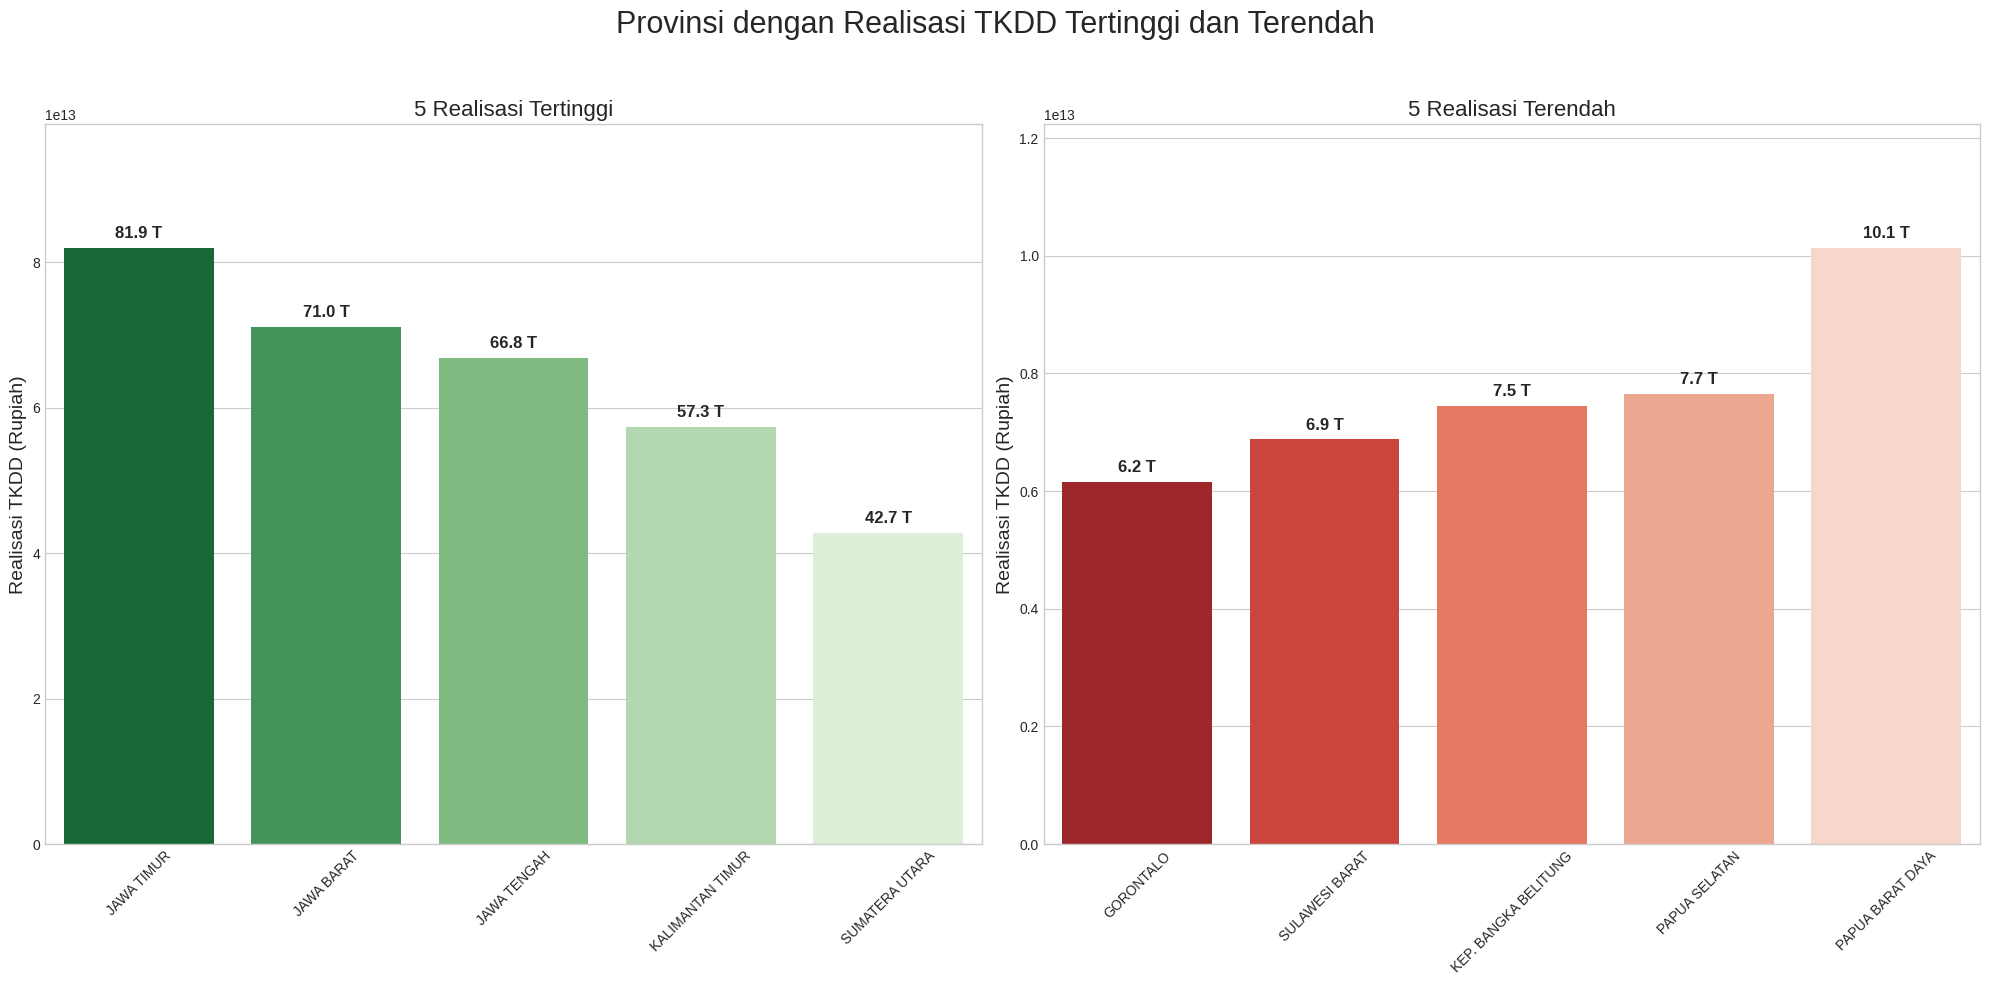

In [ ]:
df_top5 = df_tkdd.sort_values('Realisasi TKDD', ascending=False).head(5)
df_bottom5 = df_tkdd.sort_values('Realisasi TKDD', ascending=True).head(5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Provinsi dengan Realisasi TKDD Tertinggi dan Terendah', fontsize=22)
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x='Provinsi',
    y='Realisasi TKDD',
    data=df_top5,
    ax=ax[0],
    palette='Greens_r',
    hue='Provinsi',
    legend=False
)
ax[0].set_title('5 Realisasi Tertinggi', fontsize=16)

sns.barplot(
    x='Provinsi',
    y='Realisasi TKDD',
    data=df_bottom5,
    ax=ax[1],
    palette='Reds_r',
    hue='Provinsi',
    legend=False
)
ax[1].set_title('5 Realisasi Terendah', fontsize=16)

for i in range(2):
    for p in ax[i].patches:
        height = p.get_height()

        if height > 1e12:
            label = f'{height/1e12:.1f} T'
        elif height > 1e9:
            label = f'{height/1e9:.1f} M'
        else:
            label = f'{height/1e6:.1f} Jt'

        ax[i].annotate(
            label,
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

    ax[i].set_ylabel('Realisasi TKDD (Rupiah)', fontsize=14)
    ax[i].set_xlabel('')

    ax[i].tick_params(axis='x', rotation=45)

    current_ylim = ax[i].get_ylim()
    ax[i].set_ylim(top=current_ylim[1] * 1.15)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
print(f'Rata-rata Realisasi TKDD 5 provinsi tertinggi: ', df_top5['Realisasi TKDD'].mean()/1e12, 'Triliun')
print(f'Rata-rata Realisasi TKDD 5 provinsi terendah: ', df_bottom5['Realisasi TKDD'].mean()/1e12, 'Triliun')

print(f'Rata-rata Pagu TKDD 5 provinsi tertinggi: ', df_top5['Pagu TKDD'].mean()/1e12, 'Triliun')
print(f'Rata-rata Pagu TKDD 5 provinsi terendah: ', df_bottom5['Pagu TKDD'].mean()/1e12, 'Triliun')

Rata-rata Realisasi TKDD 5 provinsi tertinggi:  63.954586 Triliun
Rata-rata Realisasi TKDD 5 provinsi terendah:  7.655514 Triliun
Rata-rata Pagu TKDD 5 provinsi tertinggi:  62.965818 Triliun
Rata-rata Pagu TKDD 5 provinsi terendah:  7.770002 Triliun


<p align="justify">
Visualisasi di atas bertujuan untuk menampilkan 5 provinsi dengan nilai realisasi TKDD paling banyak dan paling sedikit. Melalui visualisasi ini, maka <b>perbedaan anggaran TKDD pada provinsi atas dan bawah semakin terlihat lebih jelas</b>. <b>Rata-rata Realisasi dan Pagu TKDD pada 5 provinsi teratas mencapai hingga sekitar 62-64 triliun, sedangkan rata-rata Realisasi dan Pagu TKDD pada 5 provinsi terbawah hanya mencapai sekitar 7.6-7.6 triliun saja</b>. Hal ini menunjukkan <b>ketidakseimbangan dalam distribusi TKDD</b> dari pemerintah pusat ke daerah dan desa. Beberapa wilayah menerima lebih banyak dana, sementara wilayah yang lain menerima lebih sedikit. Hal ini <b>dapat menyebabkan kesenjangan dalam pembangunan dan layanan publik sehingga akan mempengaruhi IPM pada wilayah tersebut</b>.
</p>

<a name="persentase-realisasi"></a>
### **4.2.3. Analisis Univariat: Persentase Realisasi TKDD Tiap Provinsi**

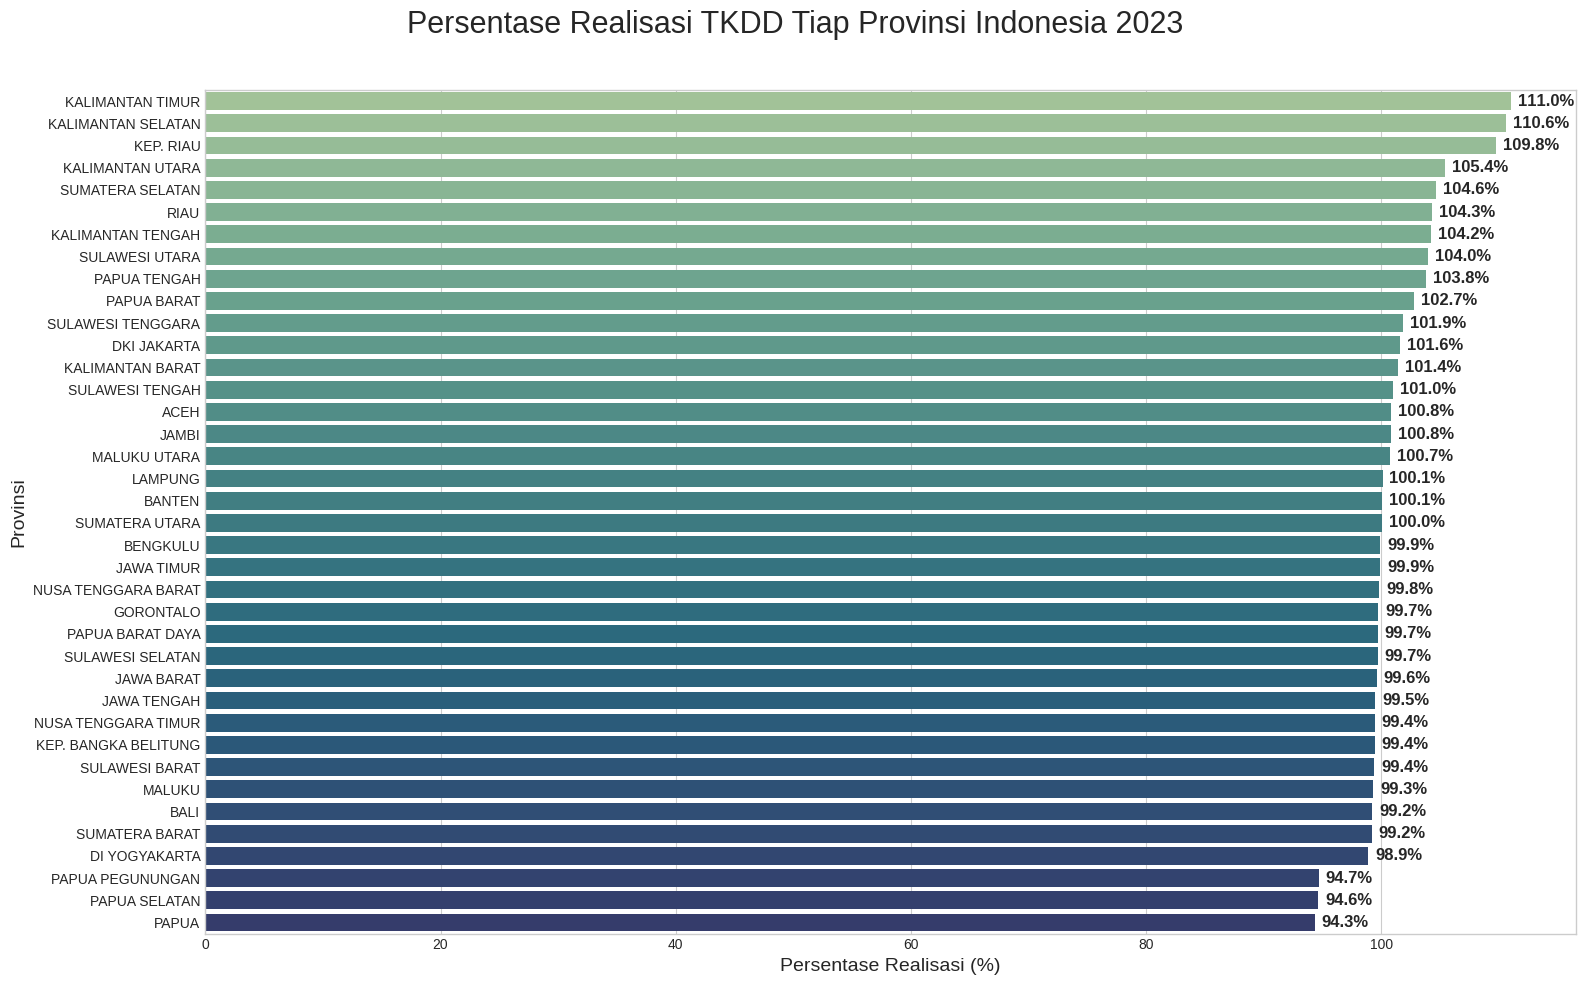

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Persentase Realisasi TKDD Tiap Provinsi Indonesia 2023', fontsize=22)
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x='Persentase Realisasi TKDD (Persen)',
    y='Provinsi',
    data=df_tkdd.sort_values('Persentase Realisasi TKDD (Persen)', ascending=False),
    ax=ax,
    palette='crest',
    hue='Provinsi',
    legend=False
)

for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}%'

    ax.annotate(
        label,
        xy=(width, p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold'
    )

ax.set_xlabel('Persentase Realisasi (%)', fontsize=14)
ax.set_ylabel('Provinsi', fontsize=14)
ax.set_xlim(right=df_top5['Persentase Realisasi TKDD (Persen)'].max() * 1.05)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<p align="justify">
Visualisasi berikut menggambarkan secara lebih jelas bagaimana hasil realisasi TKDD dari tiap provinsi dalam bentuk persentase. Jika ditelusuri lebih dalam, <b>persentase realisasi TKDD dari setiap provinsi terlihat cukup normal dan baik untuk kebanyakan provinsi, bahkan bisa dibilang perencanaan dan penyaluran dana sudah cukup efektif</b>. Masih terdapat beberapa provinsi yang memiliki sisa dana untuk digunakan atau bisa dibilang masih terpaut cukup jauh terhadap batas yang ditetapkan seperti provinsi Papua, Papua Selatan, dan Papua Pegunungan. Namun, terdapat juga beberpaa provinsi yang menggunakan dana melebihi batas yang ditentukan seperti Kalimantan Timur, Kalimantan Selatan, dan Kepulauan Riau.
</p>

<p align="justify">
<b>Realisasi TKDD yang mendekati, kurang dari, atau melebihi pagu yang ditentukan tidak bisa dikatakan bahwa itu hasil yang bagus atau jelek</b>. Nilai keberhasilan dari pagu yang ditetapkan di setiap daerah <b>ditetapkan dari seberapa signifikan dampak yang dihasilkan oleh pembangunan dan pelayanan publik terhadap kesejahteraan masyarakat</b>. Jika realisasi mendekati pagu, namun <b>tidak ada dampak signifikan terhadap pembangunan atau kesejahteraan masyarakat, hal ini bisa menjadi indikasi adanya inefisiensi dalam penggunaan dana, atau adanya masalah dalam perencanaan dan pelaksanaan program.</b>
</p>

Sumber: [Dampak Penyaluran Transfer ke Daerah (TKD) bagi Kesejahteraan Masyarakat](https://www.kompasiana.com/erysetyawan8038/6746b3a0ed641549552bc562/dampak-penyaluran-transfer-ke-daerah-tkd-bagi-kesejahteraan-masyarakat)

<a name="hubungan-variabel"></a>
## **4.3. Analisis Hubungan Antar Variabel**

<p align="justify">
Hubungan atau korelasi antar-variabel pada dataset menjadi salah satu aspek penting dalam proses analisis data. Melalui hubungan antar-variabel, pola data akan menjadi terlihat dengan lebih jelas. Selain itu, dengan hubungan antar-variabel kita bisa menemukan fitur apa saja yang mempengaruhi sebuah variabel tertentu.
</p>

<a name="heatmap-korelasi"></a>
### **4.3.1 Analisis Bivariat: Matriks Korelasi**

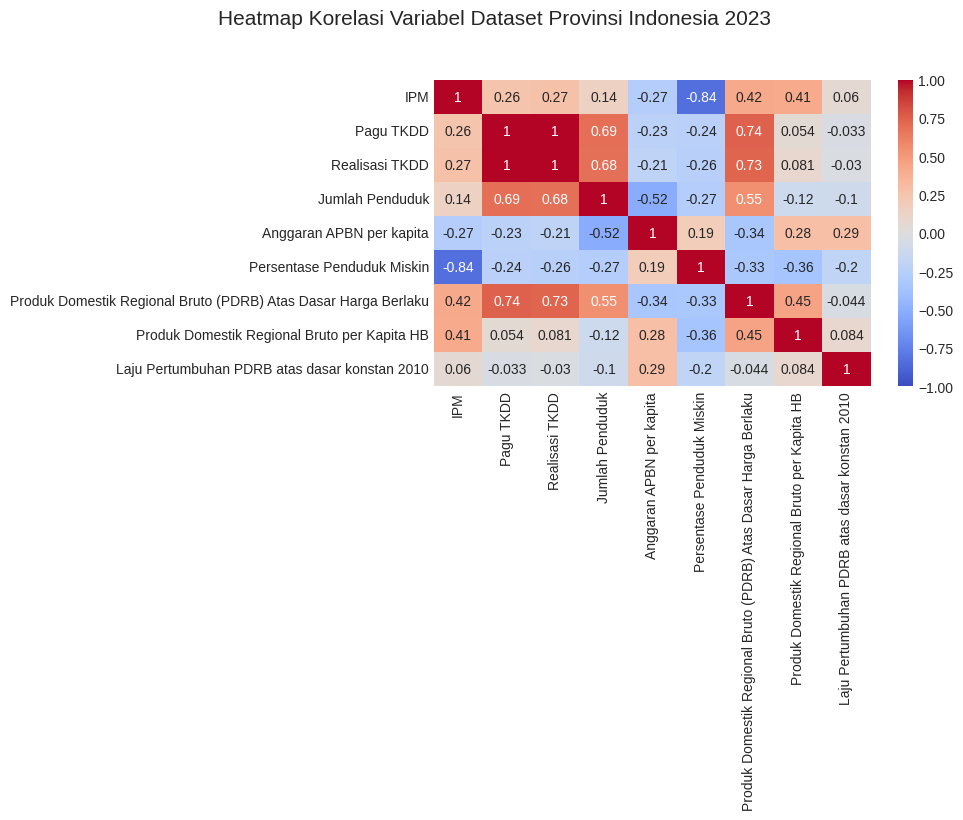

In [ ]:
corr = df.drop("Provinsi", axis=1).corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, ax=ax, cmap="coolwarm")
fig.suptitle(
    'Heatmap Korelasi Variabel Dataset Provinsi Indonesia 2023',
    fontsize=15,
    y=1.02
)
fig.tight_layout()
plt.show()

<p align="justify">
Dari hasil matriks korelasi heatmap diatas, <b> hubungan variabel yang paling signifikan adalah Realisasi TKDD dengan Pagu TKDD yang ditunjukkan dengan angka 1. </b> Hal ini berarti, besar kecilnya anggaran Realisasi TKDD berpengaruh sama terhadap Pagu TKDD yang diberikan ke suatu wilayah, yang seharusnya wajar dikarenakan setiap provinsi akan memanfaatkan anggaran TKDD semaksimal dan seoptimal mungkin sehingga nilai Realisasi TKDD akan mendekati Pagu TKDD. Setelah itu, diikuti korelasi yang kuat antara <b> Pagu TKDD dengan Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku, keterkaitannya sebesar 0.74. </b> Kemudian, dengan keterkaitan korelasi variabel yang tipis sebesar 0,001, <b> Realisasi TKDD juga erat kaitannya dengan Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku. Realisasi TKDD dan Pagu TKDD juga berhubungan dengan Jumlah Penduduk. </b> Jadi, jika suatu wilayah memiliki jumlah penduduk yang banyak, maka potensi PDRB Atas Dasar Harga Berlaku yang dihasilkan juga semakin besar. Maka, Realisasi TKDD akan semakin besar dan Pagu TKDD yang diberikan Pemerintah juga akan semakin besar.
</p>

<p align="justify">
Setelah menelaah variabel dengan korelasi tinggi (>0.5), variabel dengan korelasi rendah juga harus tetap ditinjau, karena nilai kecil belum serta-merta berarti tidak ada pengaruh terhadap variabel lainnya. Variabel <b> Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku juga berkorelasi dengan PDRB per Kapita HB sebesar 0.45.</b> Angka tersebut diikuti korelasi <b> IPM dengan PDRB Atas Dasar Harga Berlaku dan PDRB per Kapita HB </b>. Juga, ada kaitan <b> korelasi positif rendah dengan Anggaran APBN per kapita. </b> Tetapi tidak dapat ditarik kesimpulan bahwa Anggaran APBN per kapita berhubungan dengan IPM, karena memiliki korelasi negatif yang tidak berarti.
Namun, pada IPM terdapat pola unik dengan variabel Persentase Penduduk Miskin. <b>Hubungan kuat antara IPM dengan Persentase Penduduk Miskin dilihat dari menonjolnya warna biru tua, namun korelasi negatif. </b> Hal ini diartikan, semakin tinggi IPM di suatu wilayah, maka semakin rendah Persentase Penduduk Miskin di wilayah tersebut. Selain itu, <b> IPM juga berkaitan rendah dengan Pagu TKDD dan Realisasi TKDD. </b>
</p>

<p align="justify">
Kesimpulan:

Hubungan Variabel Menurut Heatmap dari Tertinggi ke Rendah

Pagu TKDD -> Realisasi TKDD -> PDRB Atas Dasar Harga Berlaku -> Jumlah Penduduk -> PDRB per Kapita HB -> IPM -> Persentase Penduduk Miskin
</p>

<a name="faktor-penentu"></a>
## **4.4. Analisis Faktor-faktor Penentu Variabel**

<a name="penentu-ipm"></a>
### **4.4.1. Analisis Bivariat: Analisis Korelasi IPM dan Realisasi TKDD dengan Beberapa Variabel**

<h3>Korelasi IPM dengan Variabel Berkorelasi Sedang ke Kuat</h3>

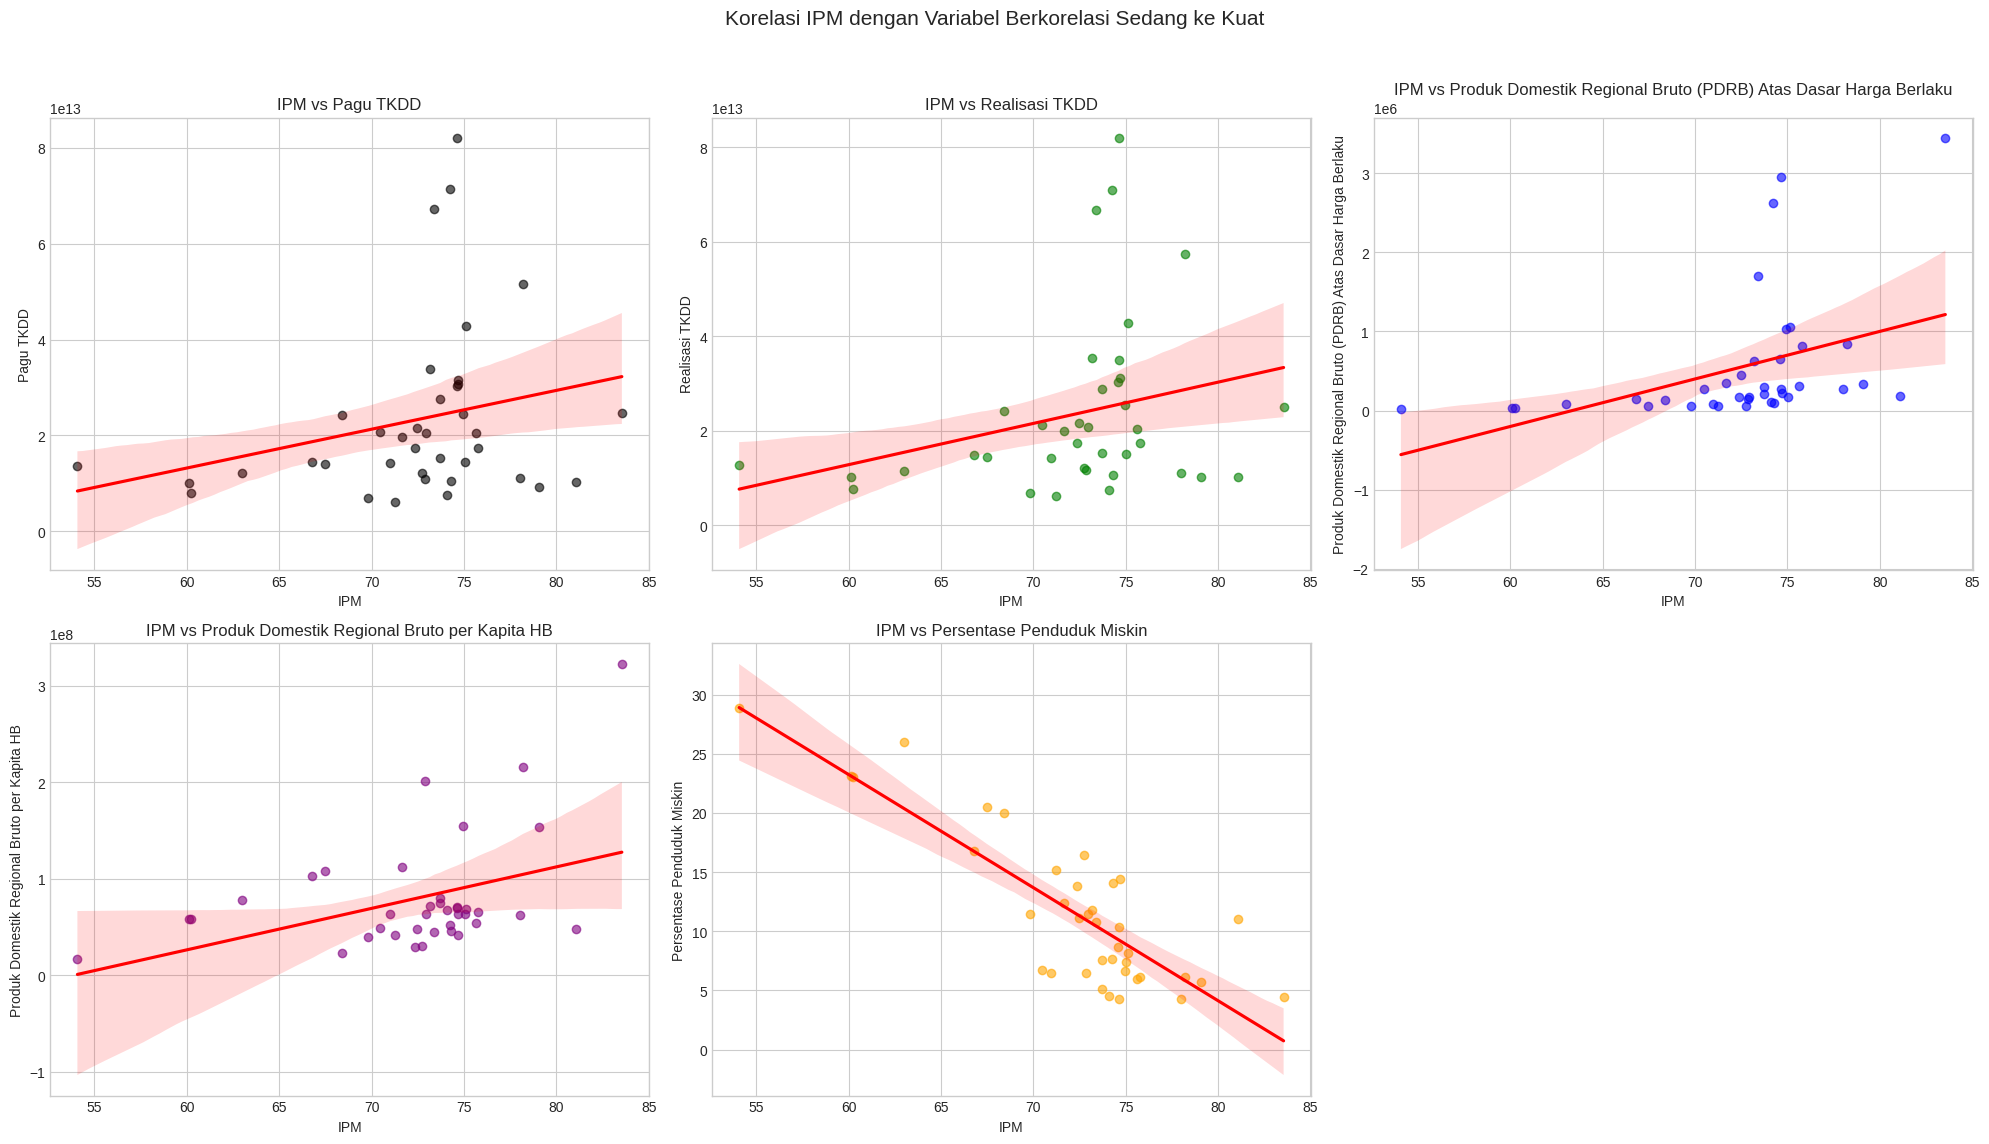

In [ ]:
ipm_sort = df.sort_values('IPM')
col = ['Pagu TKDD', 'Realisasi TKDD','Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB',
       'Persentase Penduduk Miskin']

plt.figure(figsize=(20, 12))

colors = {
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku': 'blue',
    'Produk Domestik Regional Bruto per Kapita HB': 'purple',
    'Persentase Penduduk Miskin': 'orange',
    'Realisasi TKDD': 'green',
    'Pagu TKDD': 'black'
}

for i in range(len(col)):
    plt.subplot(2, 3, i + 1)

    sns.regplot(
        x='IPM',
        y=col[i],
        data=ipm_sort,
        color=colors[col[i]],
        scatter_kws={'alpha':0.6},
        line_kws={'color': 'red'}
        ,ax=plt.gca()
    )

    plt.xlabel("IPM")
    plt.ylabel(col[i])
    plt.title(f"IPM vs {col[i]}")
    plt.grid(True)

plt.suptitle("Korelasi IPM dengan Variabel Berkorelasi Sedang ke Kuat", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

<p align="justify">
Hasil visualisasi menunjukkan bahwa IPM menunjukkan <b> korelasi yang positif dengan beberapa variabel seperti Pagu dan Realisasi TKDD, PDRB Dasar Harga, dan PDRB per kapita. </b> Hal ini ditunjukkan oleh garis regresi berwarna merah yang cenderung naik pada keempat plot tersebut. Pada area sekitar garis regresi terdapat <b> <i> confidence interval</i> (warna merah muda) mengindikasikan bahwa semakin tinggi nilai IPM suatu provinsi, maka cenderung semakin tinggi pula Pagu TKDD, Realisasi TKDD, PDRB Atas Dasar Harga Berlaku, dan PDRB per Kapita HB-nya. </b> Meskipun terdapat korelasi positif, IPM vs Pagu TKDD dan Realisasi TKDD menunjukkan sebaran data yang bervariasi, yang berarti kemungkinan ada faktor-faktor lain yang memengaruhi besaran Pagu atau Realisasi TKDD di setiap provinsi
</p>

<p align="justify">
Sementara itu, <b> IPM justru menunjukkan korelasi negatif dengan variabel Persentase Penduduk Miskin ditunjukkan garis regresi yang menurun. </b> Adanya hubungan ini secara visual <b> memperkuat dugaan bahwa  peningkatan kualitas pembangunan manusia berkorelasi dengan penurunan angka kemiskinan. </b> Hal ini perlu digarisbawahi karena korelasi ini nantinya akan menjadi modal utama dalam analisis faktor-faktor yang mempengaruhi tinggi-rendahnya nilai IPM pada suatu daerah.
</p>

<h3>Korelasi Realisasi TKDD dengan Variabel Berkorelasi Sedang ke Kuat</h3>

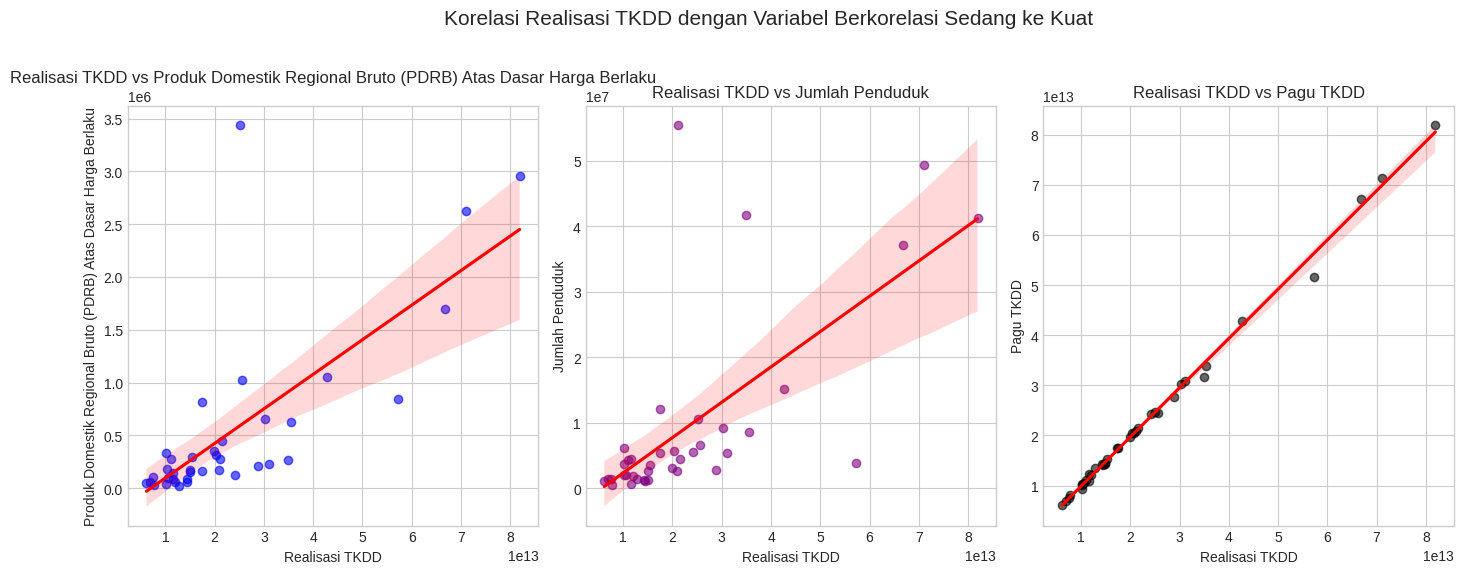

In [ ]:
realisasi_tkdd_sort = df.sort_values('Realisasi TKDD')
col = ['Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Jumlah Penduduk', 'Pagu TKDD']

plt.figure(figsize=(14, 6))

colors = {
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku': 'blue',
    'Jumlah Penduduk': 'purple',
    'Pagu TKDD': 'black'
}

for i in range(len(col)):
    plt.subplot(1, 3, i + 1)

    sns.regplot(
        x='Realisasi TKDD',
        y=col[i],
        data=realisasi_tkdd_sort,
        color=colors[col[i]],
        scatter_kws={'alpha':0.6},
        line_kws={'color': 'red'}
        ,ax=plt.gca()
    )

    plt.xlabel("Realisasi TKDD")
    plt.ylabel(col[i])
    plt.title(f"Realisasi TKDD vs {col[i]}")
    plt.grid(True)

plt.suptitle("Korelasi Realisasi TKDD dengan Variabel Berkorelasi Sedang ke Kuat", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

<p align="justify">
Pada plot pertama, terlihat adanya <b>korelasi positif antara
Realisasi TKDD dengan Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku. </b> Garis regresi berwarna merah cenderung naik, menunjukkan provinsi dengan Realisasi TKDD yang lebih tinggi cenderung memiliki PDRB yang lebih besar. Ini <b> mengindikasikan bahwa semakin besar tingkat ekonomi suatu provinsi, semakin besar pula dana TKDD yang berhasil direalisasikan. </b>
</p>

<p align="justify">
Selanjutnya pada plot kedua, terlihat adanya <b>korelasi positif antara korelasi positif antara Realisasi TKDD dan Jumlah Penduduk. </b> Meskipun korelasinya positif, sebaran nilai pada plot lebih bervariasi, cenderung jauh dari garis regresi dan <i>confidence area </i> lebih besar dibanding PDRB Atas Dasar Harga Berlaku. Selain itu, garis regresi yang naik, mengartikan bahwa <b> provinsi dengan populasi yang lebih besar juga cenderung memiliki Realisasi TKDD yang lebih tinggi </b>
</p>

<p align="justify">
Terakhir, pada plot ketiga terlihat <b> korelasi positif yang sangat kuat dan hampir linear sempurna antara Realisasi TKDD dan Pagu TKDD. </b> Garis regresi merah yang naik dan hampir sejajar dengan sumbu 45 derajat, menandakan hampir semua dana Pagu TKDD yang dialokasikan ke provinsi-provinsi berhasil direalisasikan. <i> Confidence area </i> yang sangat kecil areanya di sekitar garis regresi semakin memperkuat temuan ini, mengindikasikan konsistensi dalam penyerapan dana dari pagu yang telah ditetapkan. Sehingga hal itu menjadi indikator positif mengenai efisiensi penyaluran dan penyerapan dana TKDD di tingkat provinsi.
</p>

<h3>Provinsi dengan IPM Terendah dan Tertinggi</h3>

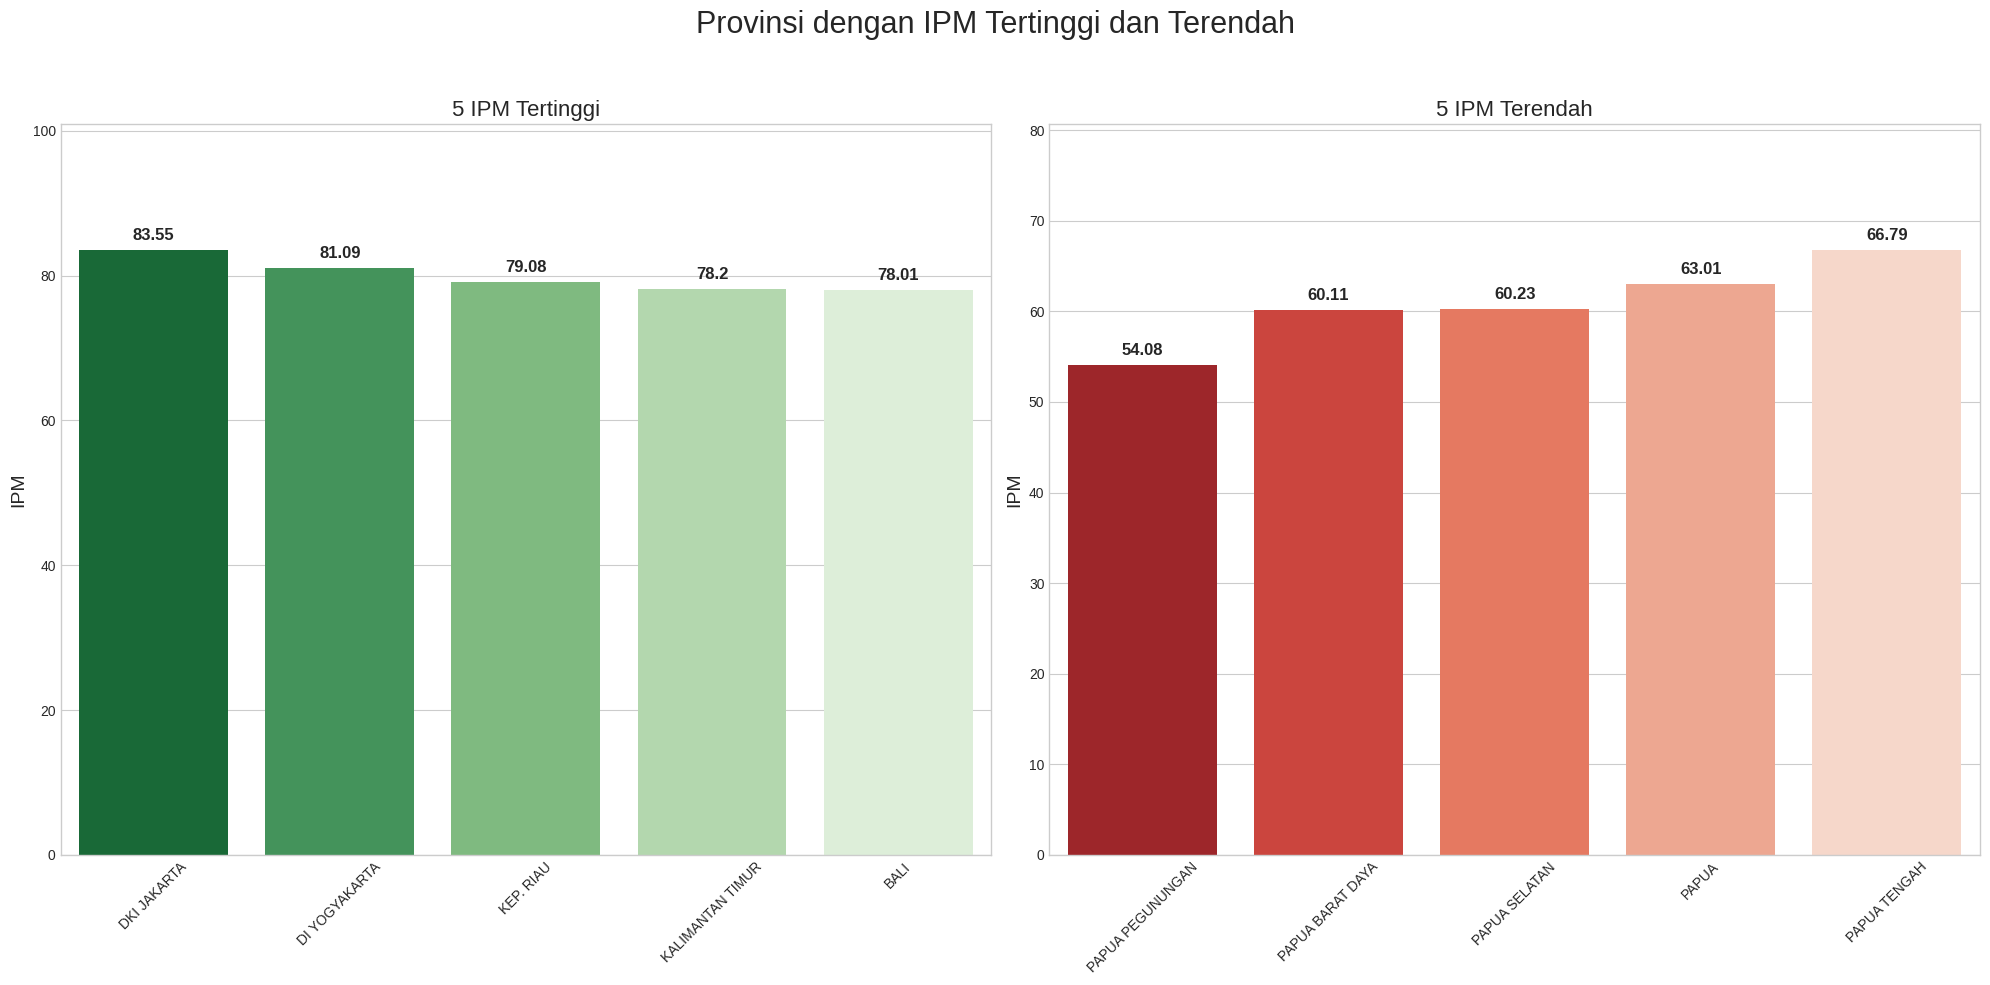

In [ ]:
top5_ipm = df.sort_values('IPM', ascending=False).head(5)
bottom5_ipm = df.sort_values('IPM', ascending=True).head(5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Provinsi dengan IPM Tertinggi dan Terendah', fontsize=22)
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x='Provinsi',
    y='IPM',
    data=top5_ipm,
    ax=ax[0],
    palette='Greens_r',
    hue='Provinsi',
    legend=False
)
ax[0].set_title('5 IPM Tertinggi', fontsize=16)

sns.barplot(
    x='Provinsi',
    y='IPM',
    data=bottom5_ipm,
    ax=ax[1],
    palette='Reds_r',
    hue='Provinsi',
    legend=False
)
ax[1].set_title('5 IPM Terendah', fontsize=16)

for i in range(2):
    for p in ax[i].patches:
        height = p.get_height()
        label = height

        ax[i].annotate(
            label,
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

    ax[i].set_ylabel('IPM', fontsize=14)
    ax[i].set_xlabel('')

    ax[i].tick_params(axis='x', rotation=45)

    current_ylim = ax[i].get_ylim()
    ax[i].set_ylim(top=current_ylim[1] * 1.15)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<p align="justify">
Sebelum menganalisis perbandingan variabel beberapa provinsi, perlu dilihat terlebih dahulu provinsi dengan IPM tertinggi dan terendah. Dari visualisasi diatas, dapat dilihat <b> Provinsi DKI Jakarta memimpin IPM tertinggi sebesar 83.55 diantara semua provinsi di Indonesia. </b> Kemudian diikuti, Provinsi DI Yogykarta, Kep. Riau, Kalimantan Timur, dan Bali dengan perbedaan tipis sebesar 0.001 sampai 2.00. Namun di sisi lain, wilayah Papua cenderung memiliki angka IPM yang rendah. <b> Angka IPM terendah dipimpin oleh Papua Pegunungan hanya sebesar 54.08 </b>, selisih 29.47 dengan Provinsi DKI Jakarta. <b>Hal ini menunjukkan masih terjadi kesetimpangan IPM di Indonesia karena provinsi dengan IPM tertinggi sebagian besar masih terkonsentrasi di wilayah Jawa dan Indonesia bagian Barat.
<p>

<a name="ipm-vs-tkdd"></a>
#### **4.4.1.1. Analisis Korelasi IPM dengan Realisasi TKDD**

<Axes: >

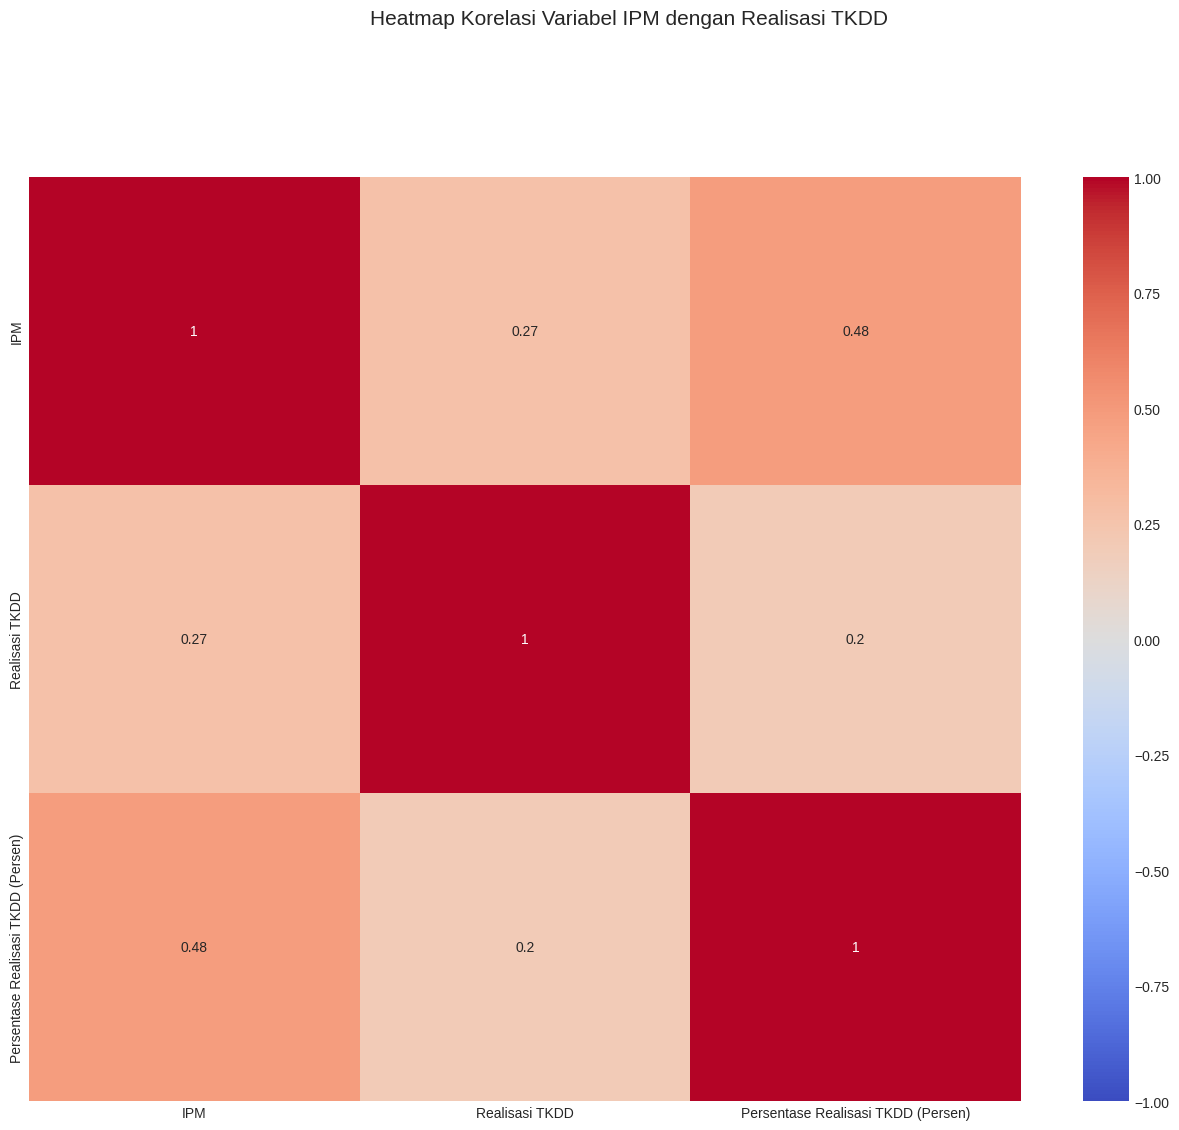

In [ ]:
df_tkdd['IPM'] = df['IPM']

fig, ax = plt.subplots(figsize=(16, 12))
fig.suptitle('Heatmap Korelasi Variabel IPM dengan Realisasi TKDD', fontsize=15, y=1.02)

sns.heatmap(df_tkdd[['IPM', 'Realisasi TKDD', 'Persentase Realisasi TKDD (Persen)']].corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

<p align="justify">
Setelah melalui analisis yang lebih dalam, IPM yang awalnya memiliki korelasi yang cukup rendah dengan Realisasi TKDD ternyata memiliki korelasi yang lebih tinggi dengan Persentase Realisasi TKDD dari tiap provinsi. Temuan ini menunjukkan bahwa <b>nilai improvisasi dari IPM bukan berkorelasi langsung dengan besarnya nilai Realisasi TKDD, tetapi berkorelasi dengan efektivitas tingkat penyerapan anggaran TKDD pada provinsi tersebut</b>.
</p>

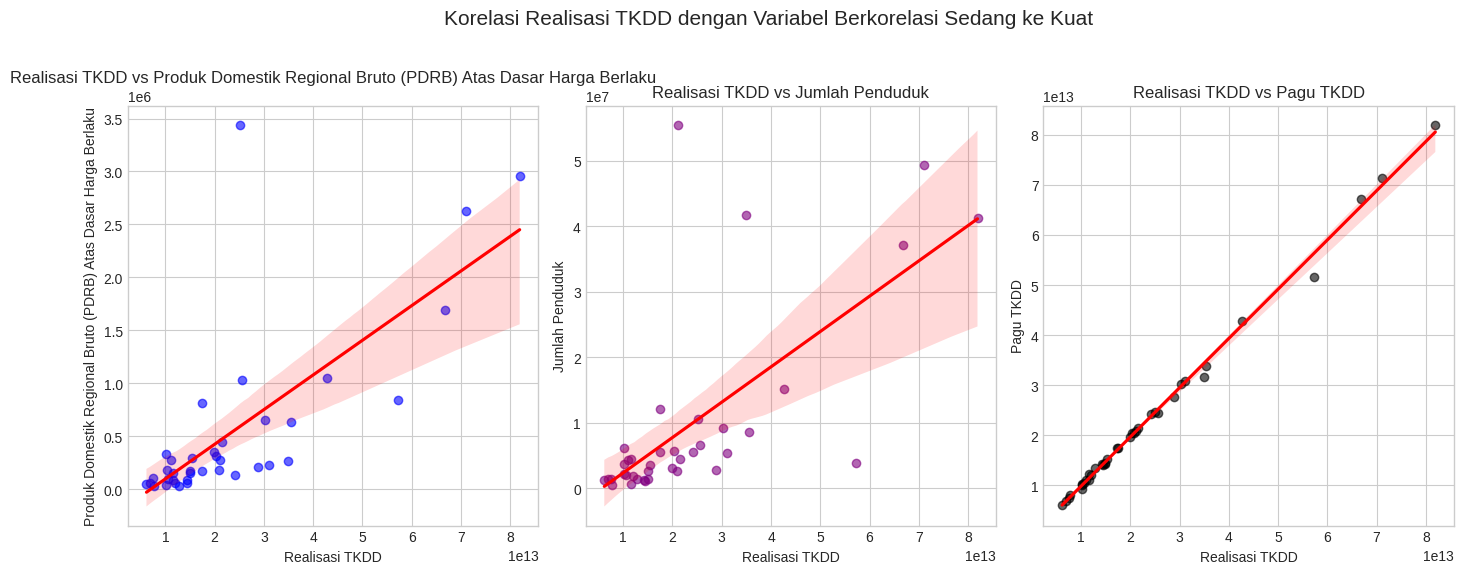

In [ ]:
col = ['Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Jumlah Penduduk', 'Pagu TKDD']

plt.figure(figsize=(14, 6))

colors = {
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku': 'blue',
    'Jumlah Penduduk': 'purple',
    'Pagu TKDD': 'black'
}

for i in range(len(col)):
    plt.subplot(1, 3, i + 1)

    sns.regplot(
        x='Realisasi TKDD',
        y=col[i],
        data=realisasi_tkdd_sort,
        color=colors[col[i]],
        scatter_kws={'alpha':0.6},
        line_kws={'color': 'red'}
        ,ax=plt.gca()
    )

    plt.xlabel("Realisasi TKDD")
    plt.ylabel(col[i])
    plt.title(f"Realisasi TKDD vs {col[i]}")
    plt.grid(True)

plt.suptitle("Korelasi Realisasi TKDD dengan Variabel Berkorelasi Sedang ke Kuat", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

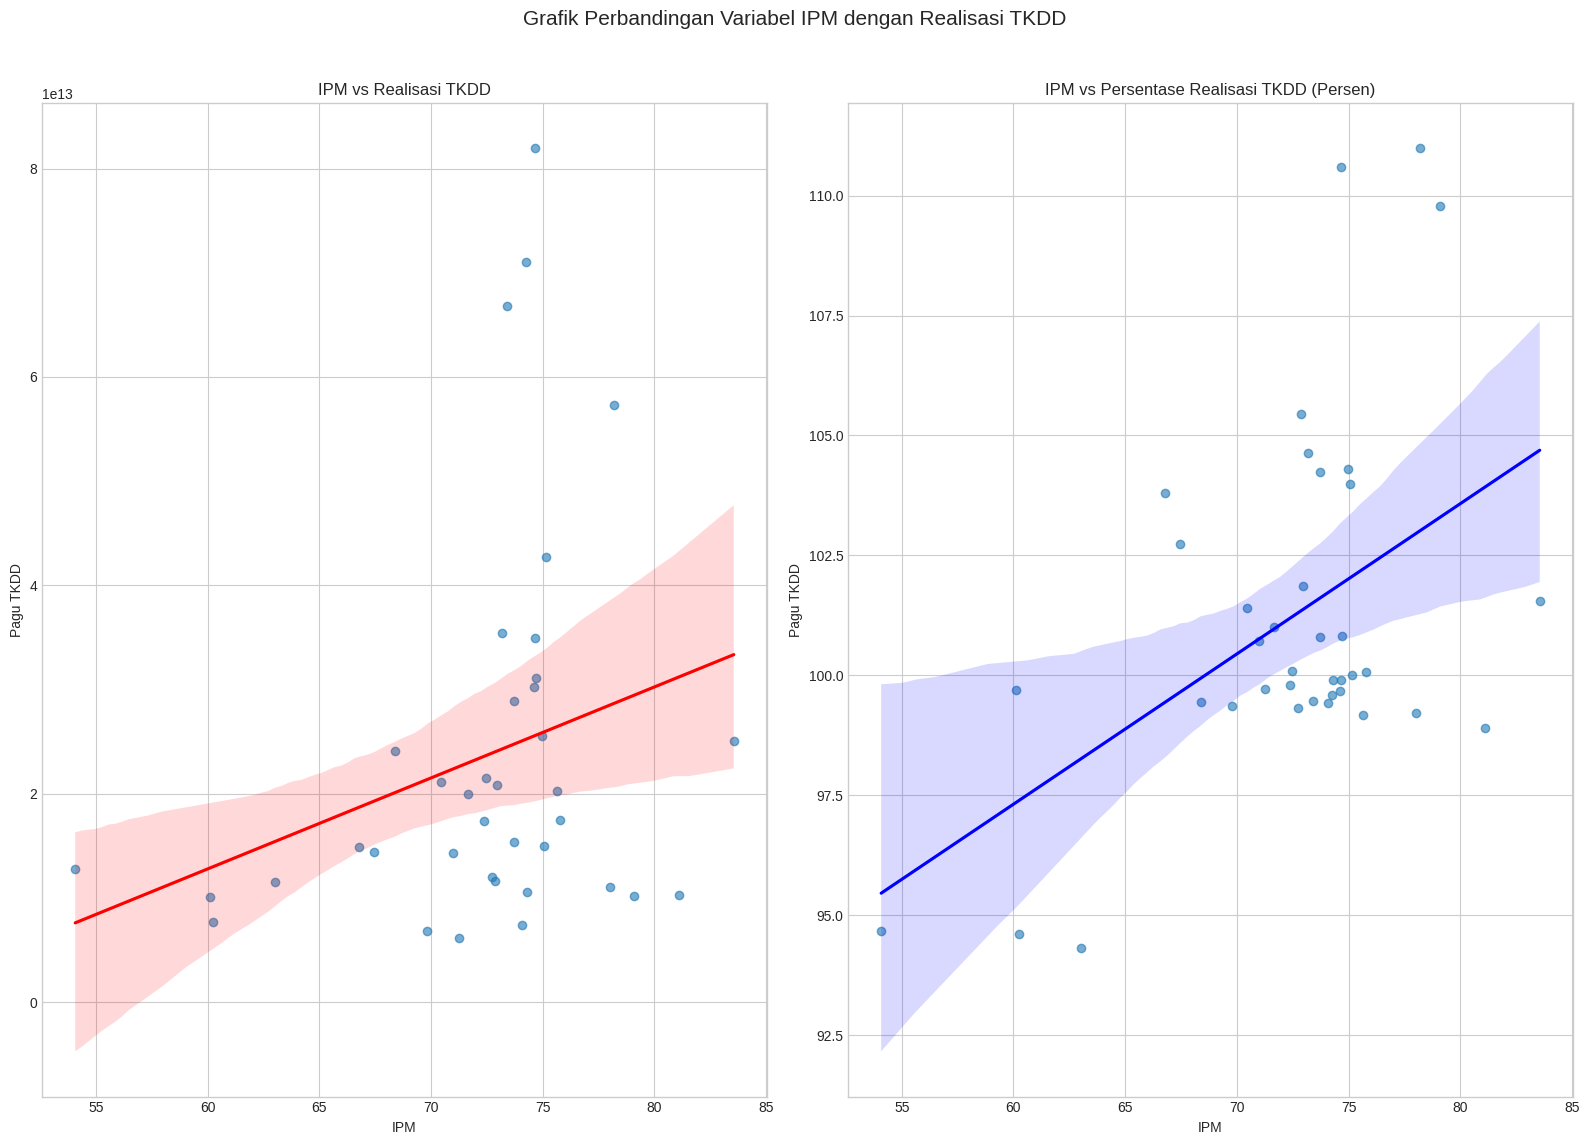

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
sns.regplot(
    x='IPM',
    y='Realisasi TKDD',
    data=df_tkdd,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
    ,ax=plt.gca()
)

plt.xlabel("IPM")
plt.ylabel(col[i])
plt.title("IPM vs Realisasi TKDD")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.regplot(
    x='IPM',
    y='Persentase Realisasi TKDD (Persen)',
    data=df_tkdd,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'blue'}
    ,ax=plt.gca()
)

plt.xlabel("IPM")
plt.ylabel(col[i])
plt.title("IPM vs Persentase Realisasi TKDD (Persen)")
plt.grid(True)

plt.suptitle("Grafik Perbandingan Variabel IPM dengan Realisasi TKDD", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

<p align="justify">
Berdasarkan grafik tersebut, terlihat jelas bahwa Persentase Realisasi TKDD memiliki korelasi yang lebih tinggi dengan IPM. Provinsi dengan Persentase Realisasi TKDD di bawah 95% terlihat memililki IPM yang kurang memuaskan dengan angka masih di bawah 60, sedangkan provinsi dengan Persentase Realisasi TKDD mendekati 100% atau lebih rata-rata memiliki IPM di atas 70. Ini menunjukkan bahwa <b>pemanfaatan anggaran TKDD secara optimal dapat meningkatkan pembangunan dan kesejahteraan masyarakat pada daerah tersebut</b>.
</p>

<a name="tkdd-vs-ipm"></a>
### **4.4.2. Analisis Multivariat: Eksplorasi Hubungan Lebih dari 2 Variabel**

<p align="justify">
Sebelumnya saat proses pembersihan data, lebih tepatnya pada poin <a href="#sulut">3.3.2.1</a>, ditemukan sebuah informasi penting di mana ketika 2 variabel berbeda disatukan maka akan menghasilkan variabel baru yang memiliki korelasi tinggi dengan variabel lain. Pada proses imputasi sebelumnya, data hilang di kolom Realisasi TKDD pada provinsi Sulawesi Utara diimputasi menggunakan hasil perkalian dari 2 kolom lain, yaitu Jumlah Penduduk dan Anggaran APBN per kapita.
</p>

<Axes: >

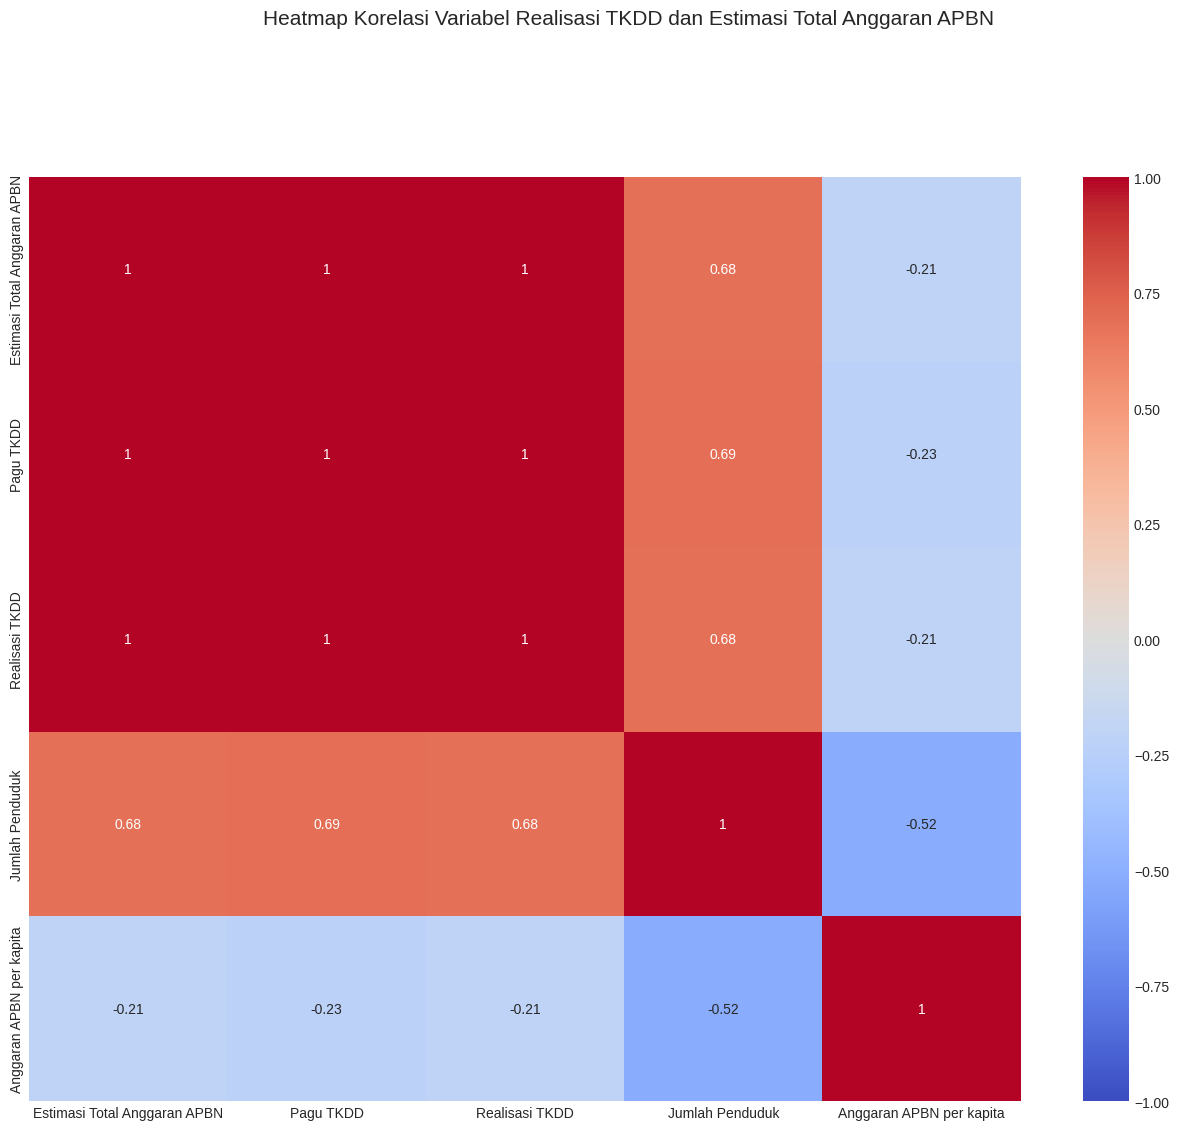

In [ ]:
df_multivariate = df.copy()
df_multivariate['Estimasi Total Anggaran APBN'] = df_multivariate['Jumlah Penduduk'] * df_multivariate['Anggaran APBN per kapita']

tkdd_apbn_corr = df_multivariate[['Estimasi Total Anggaran APBN', 'Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita']].corr()
fig, ax = plt.subplots(figsize=(16, 12))

fig.suptitle('Heatmap Korelasi Variabel Realisasi TKDD dan Estimasi Total Anggaran APBN', fontsize=15, y=1.02)
sns.heatmap(tkdd_apbn_corr, vmin=-1, vmax=1, annot=True, ax=ax, cmap="coolwarm")

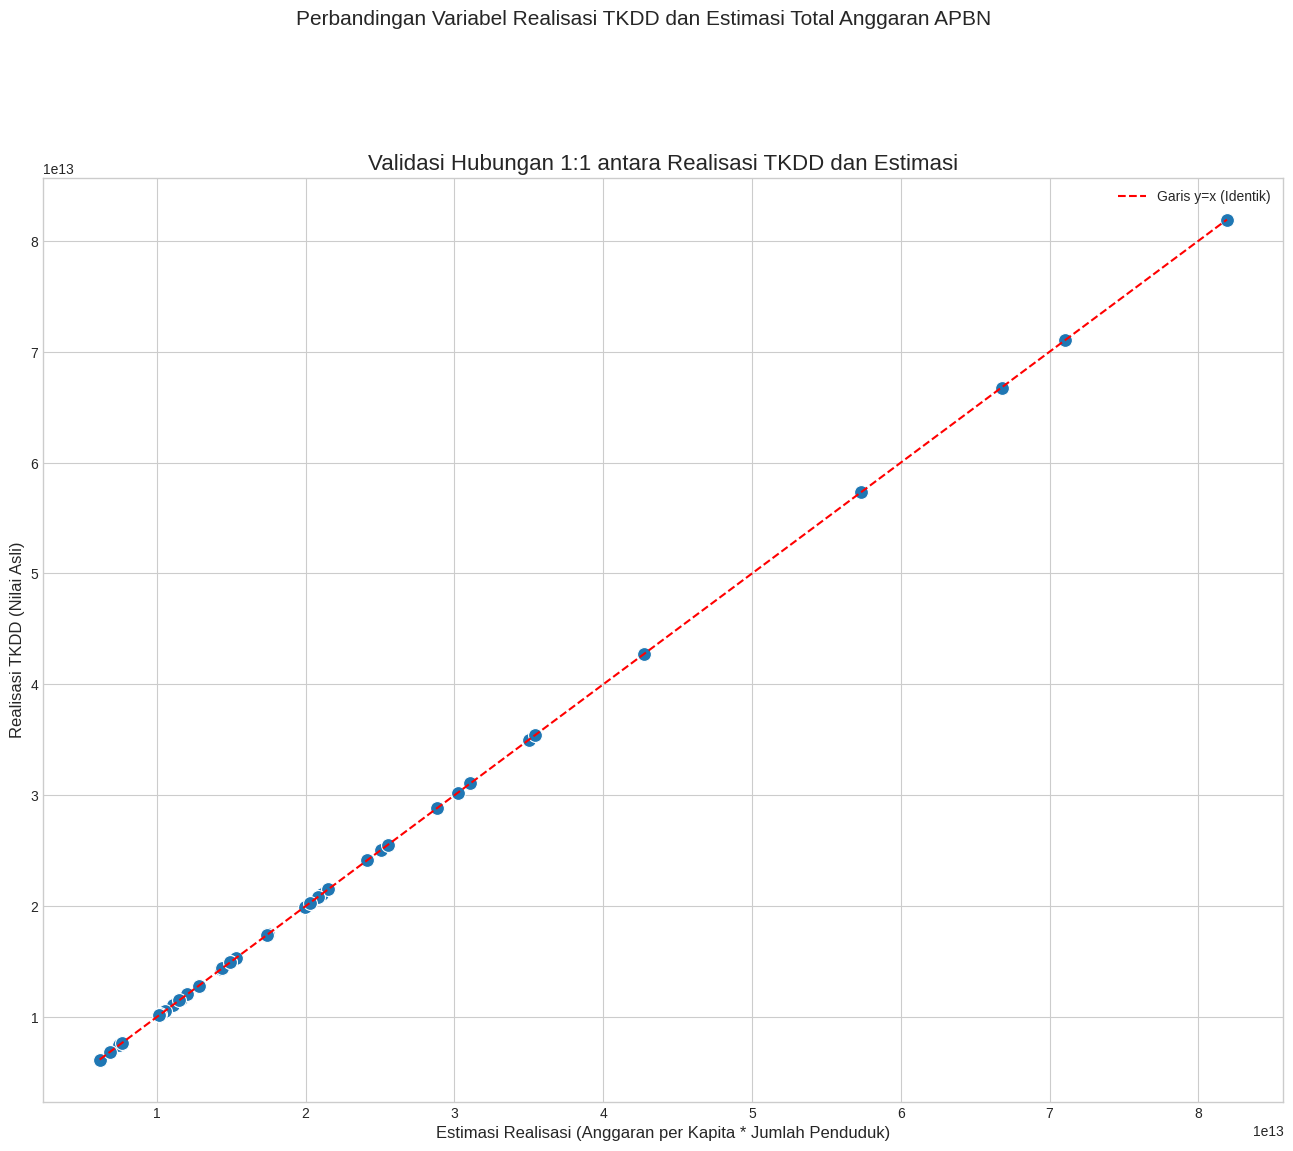

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

fig.suptitle('Perbandingan Variabel Realisasi TKDD dan Estimasi Total Anggaran APBN', fontsize=15, y=1.02)
sns.scatterplot(data=df_multivariate, x='Estimasi Total Anggaran APBN', y='Realisasi TKDD', s=100)

min_val = min(df_multivariate['Estimasi Total Anggaran APBN'].min(), df_multivariate['Realisasi TKDD'].min())
max_val = max(df_multivariate['Estimasi Total Anggaran APBN'].max(), df_multivariate['Realisasi TKDD'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Garis y=x (Identik)')

plt.title('Validasi Hubungan 1:1 antara Realisasi TKDD dan Estimasi', fontsize=16)
plt.xlabel('Estimasi Realisasi (Anggaran per Kapita * Jumlah Penduduk)', fontsize=12)
plt.ylabel('Realisasi TKDD (Nilai Asli)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<p align="justify">
Bisa dilihat melalui <i>heatmap</i> korelasi dan juga grafik garis tersebut bahwa <b>hubungan antara variabel Realisasi TKDD dan Pagu TKDD dengan variabel baru hasil perkalian Jumlah Penduduk dan Anggaran APBN per kapita adalah 1:1</b>. Sebelumnya, ketika diamati secara langsung, terlihat bahwa Anggaran APBN per kapita tidak memiliki korelasi yang signifikan secara langsung terhadap nilai Realisasi TKDD maupun Pagu TKDD. Namun ketika ditelusuri lebih dalam, <b>Anggaran APBN per kapita juga memiliki hubungan yang cukup berkorelasi tinggi dengan Realisasi TKDD dan Pagu TKDD</b>. <b>Jika salah satu variabel antara Jumlah Penduduk atau Anggaran APBN per kapita berubah entah naik atau turun, itu akan mempengaruhi nilai Realisasi TKDD atau Pagu TKDD secara signifikan</b>. Jika ternyata Jumlah Penduduk atau Anggaran APBN per kapita hanya mempengaruhi nilai Pagu TKDD tiap wilayah, maka pada akhirnya hal tersebut juga akan selalu mempengaruhi bagaimana akhir dari Realisasi TKDD pada wilayah tersebut.
</p>

<a name="faktor-tkdd-ipm"></a>
### **4.4.3. Analisis Faktor yang Mempengaruhi IPM dan Realisasi TKDD**

<a name="sample-provinsi"></a>
#### **4.4.3.1. Sampling Provinsi**

<p align="justify">
Selanjutnya, akan dianalisis faktor yang menyebabkan tinggi rendahnya angka IPM dan juga Realisasi TKDD di Indonesia. Metode pertama yang digunakan adalah menggunakan beberapa sampel dari provinsi. Sampel yang digunakan untuk menganalisa IPM dipilih berdasarkan provinsi dengan IPM tertinggi (DKI Jakarta) dan terendah (Papua Pegunungan), sedangkan untuk sampel provinsi yang digunakan untuk menganalisa Realisasi TKDD juga dipilih berdasarkan beberapa provinsi dengan Realisasi TKDD tertinggi dan terendah. Selain itu, beberapa provinsi juga akan dipilih sebagai sampel untuk melihat lebih detail bagaimana kondisi provinsi tersebut dengan berbagai variabel yang akan dibandingkan.
</p>

<h3>Analisis Faktor yang Mempengaruhi Realisasi TKDD</h3>

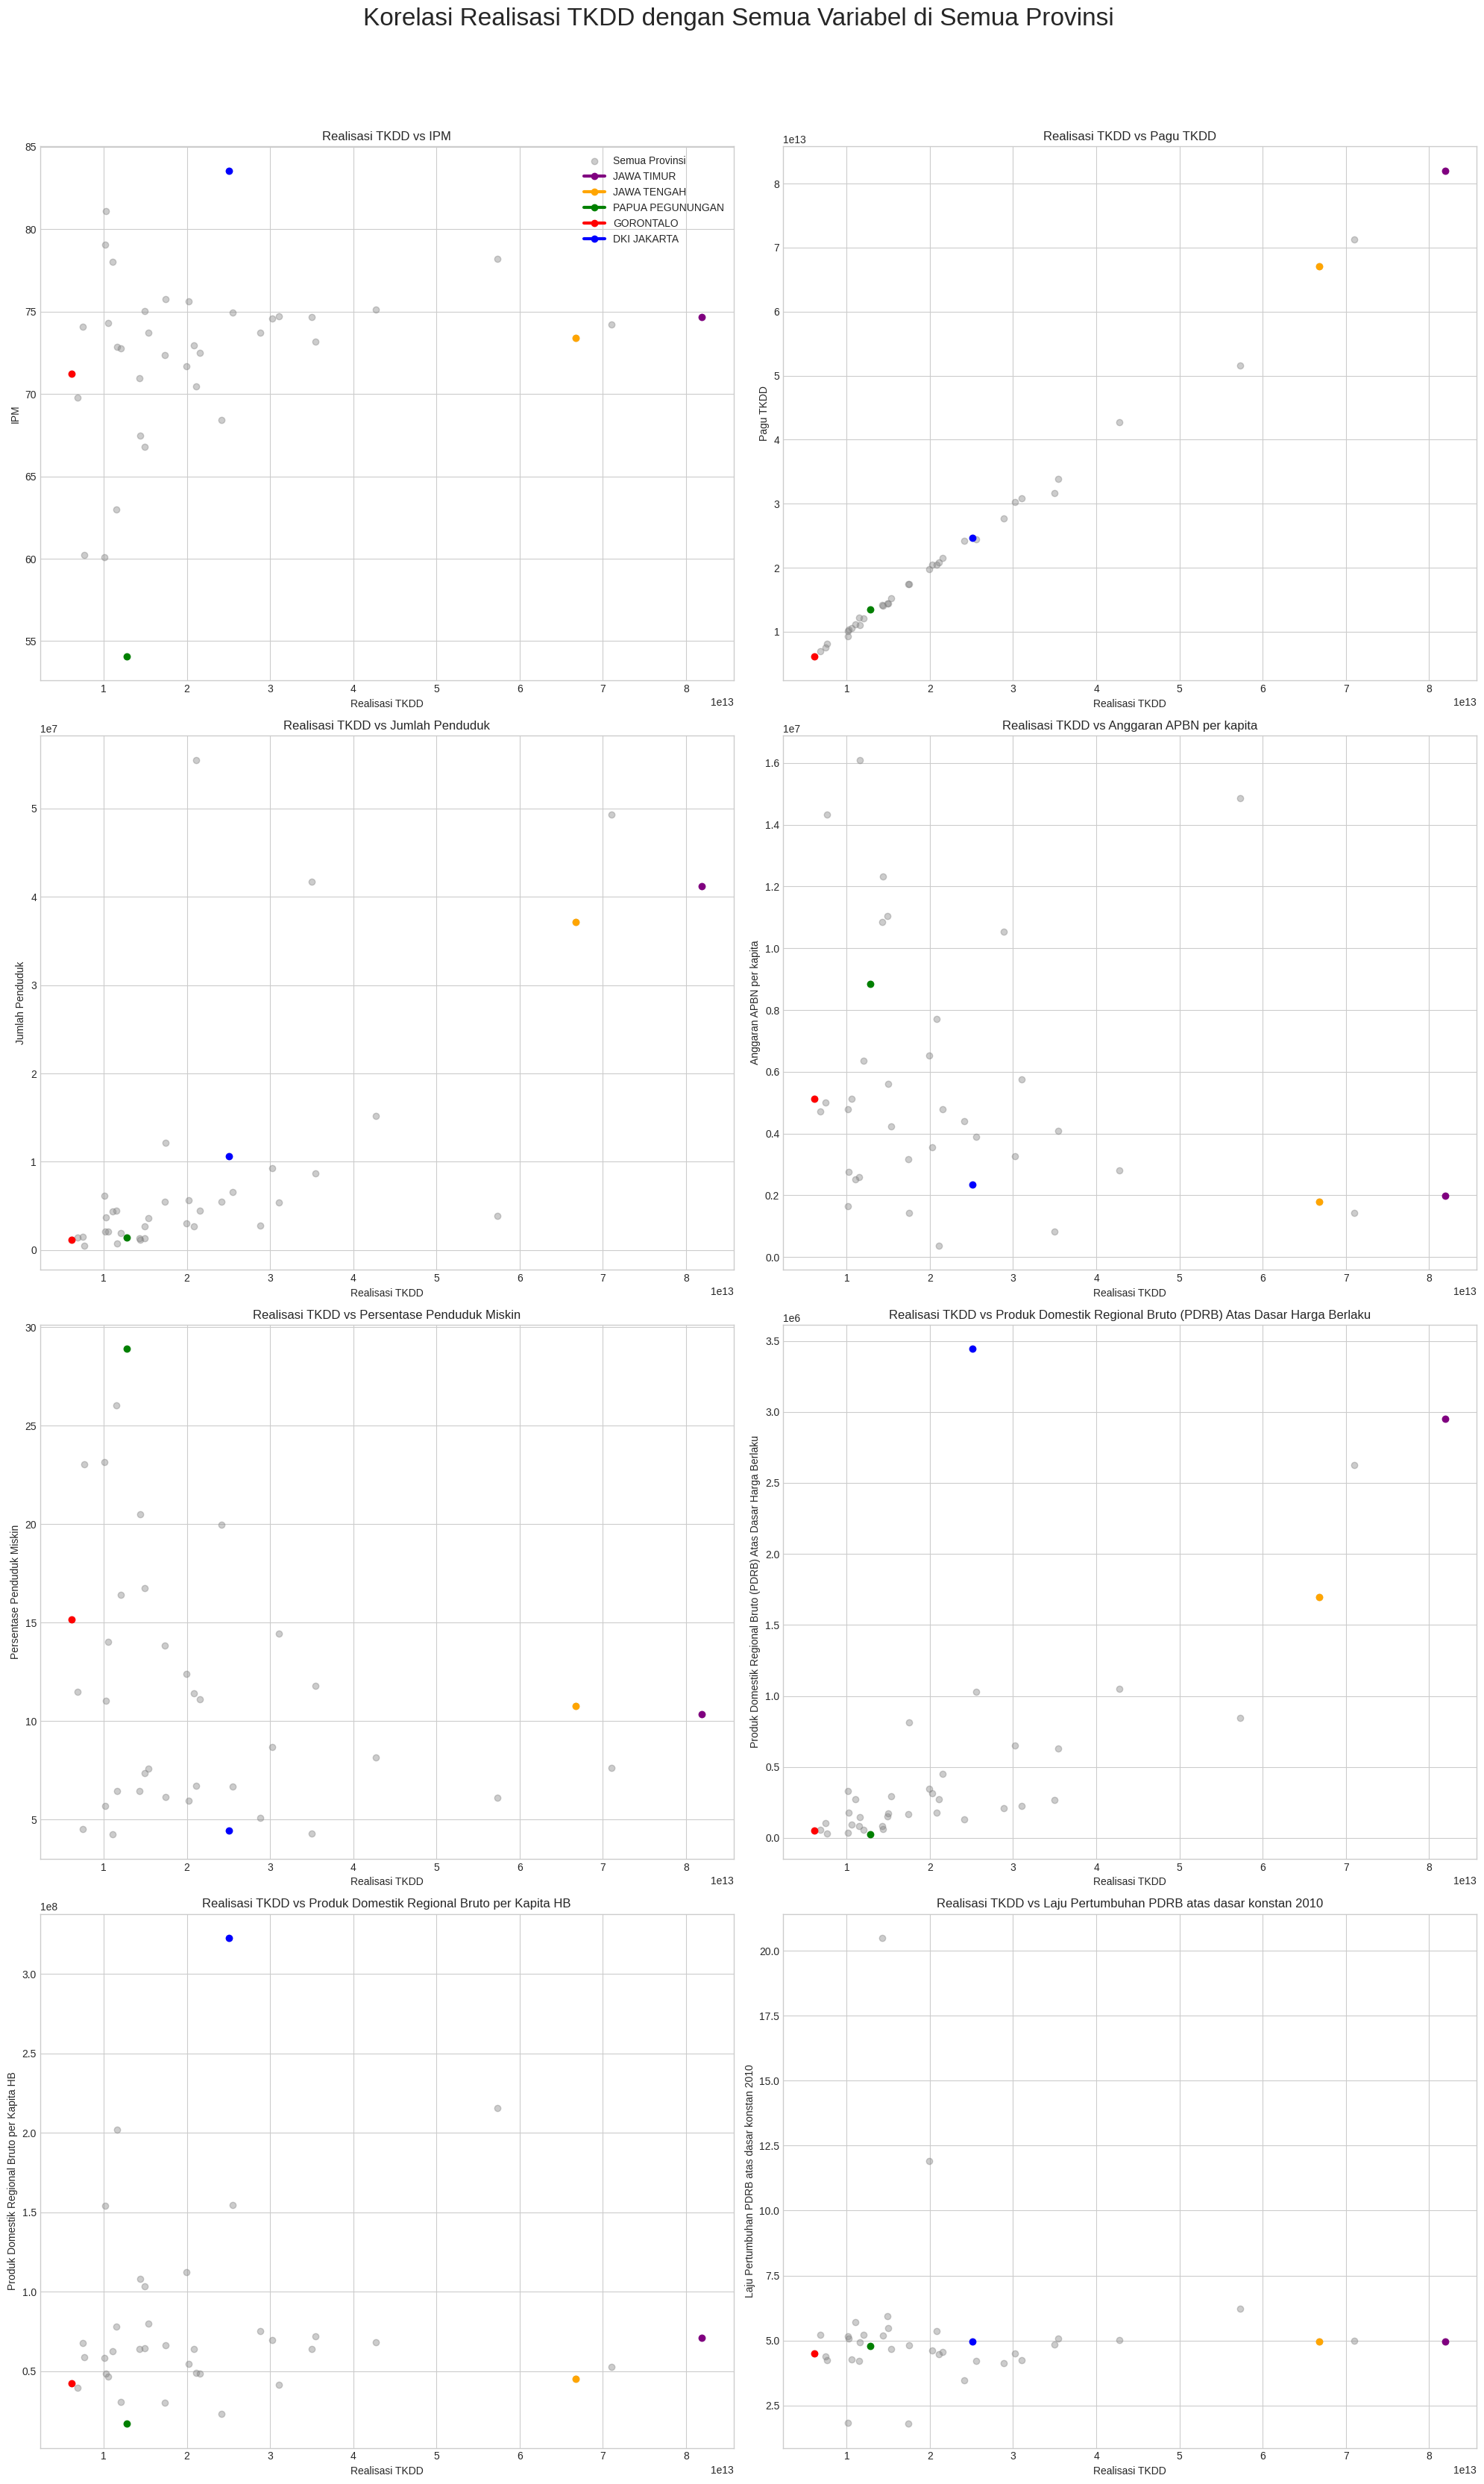

In [ ]:
highlight_provinsi = ['JAWA TIMUR', 'JAWA TENGAH', 'PAPUA PEGUNUNGAN', 'GORONTALO', 'DKI JAKARTA']
colors = {
    'DKI JAKARTA': 'blue',
    'JAWA TENGAH': 'orange',
    'PAPUA PEGUNUNGAN': 'green',
    'GORONTALO': 'red',
    'JAWA TIMUR': 'purple'
}

col = ['IPM', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']

plt.figure(figsize=(20, 35))

for i in range(len(col)):
    plt.subplot(4, 2, i + 1)

    plt.scatter(realisasi_tkdd_sort['Realisasi TKDD'], realisasi_tkdd_sort[col[i]], color='gray', alpha=0.4, label='Semua Provinsi')

    for prov in highlight_provinsi:
        df_prov = df[df['Provinsi'] == prov]
        plt.plot(df_prov['Realisasi TKDD'], df_prov[col[i]], label=prov, color=colors[prov], linewidth=3, marker='o')

    plt.xlabel("Realisasi TKDD")
    plt.ylabel(col[i])
    plt.title(f"Realisasi TKDD vs {col[i]}")
    plt.grid(True)

    if i == 0:
        plt.legend()

plt.suptitle("Korelasi Realisasi TKDD dengan Semua Variabel di Semua Provinsi ", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<p align="justify">
Grafik di atas bertujuan untuk menggambarkan korelasi antara setiap variabel dengan variabel Realisasi TKDD secara lebih detail. Melalui hasil visualisasi tersebut, <b>beberapa variabel yang terlihat mempengaruhi tinggi-rendahnya nilai Realisasi TKDD adalah variabel yang berupa skala, seperti Pagu TKDD, Jumlah Penduduk, dan PDRB Atas Dasar Harga Berlaku</b>. Faktor lain yang menggambarkan angka kesejahteraan atau kemiskinan seperti IPM dan Persentase Penduduk miskin memang terlihat tidak terlalu memiliki hubungan yang kuat dengan Realisasi TKDD, sesuai dengan angka korelasi yang tergambar pada <i>heatmap</i> korelasi pada poin <a href="#hubungan-variabel">4.3</a>. Sekarang mari kita coba telaah lebih lanjut faktor/variabel yang cukup memiliki pengaruh dalam tinggi-rendahnya nilai Realisasi TKDD:
</p>

<ul>
  <li><b>Pagu TKDD</b></li>
    <p align="justify">
    Variabel Pagu TKDD memiliki hubungan yang paling kuat dengan Realisasi TKDD. Hal ini sangatlah wajar, karena secara logis jumlah dana yang direalisasikan oleh setiap wilayah akan sangat bergantung pada pagu atau alokasi yang ditetapkan oleh Pemerintah Pusat. Semakin besar pagu anggaran, maka semakin besar pula nilai realisasinya. Pagu TKDD menjadi salah satu faktor penentu utama tinggi-rendahnya nilai Realisasi TKDD.
    </p>
  <li><b>Jumlah Penduduk</b></li>
    <p align="justify">
    Variabel ini terlihat memiliki korelasi positif yang cukup kuat dengan Realisasi TKDD. Terlihat pada plot grafik di atas, ketika nilai Realisasi TKDD masih terhitung kecil, maka Jumlah Penduduk pada provinsi tersebut juga terbilang masih sedikit. Ketika nilai Realisasi TKDD mulai membesar, Jumlah Penduduk pada provinsi tersebut juga terlihat lebih banyak.
    </p>
  <li><b>Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku</b></li>
    <p align="justify">
    Plot antara PDRB Atas Dasar Harga Berlaku dengan Realisasi TKDD memiliki pola yang mirip dengan Jumlah Penduduk. Untuk nilai Realisasi TKDD yang rendah hingga menengah, nilai PDRB relatif rendah. Namun, saat Realisasi TKDD melonjak sangat tinggi, nilai PDRB juga ikut melonjak secara drastis.
    </p>
</ul>

<p align="justify">
<b>Tinggi-rendahnya nilai Realisasi TKDD secara dominan dipengaruhi oleh faktor skala, yaitu besarnya alokasi anggaran (Pagu TKDD), populasi (Jumlah Penduduk), dan ukuran ekonomi (PDRB Atas Dasar Harga Berlaku)</b>. Faktor-faktor kesejahteraan seperti IPM, tingkat kemiskinan, atau pendapatan per kapita tidak menunjukkan hubungan yang kuat dari analisis visual ini.
</p>

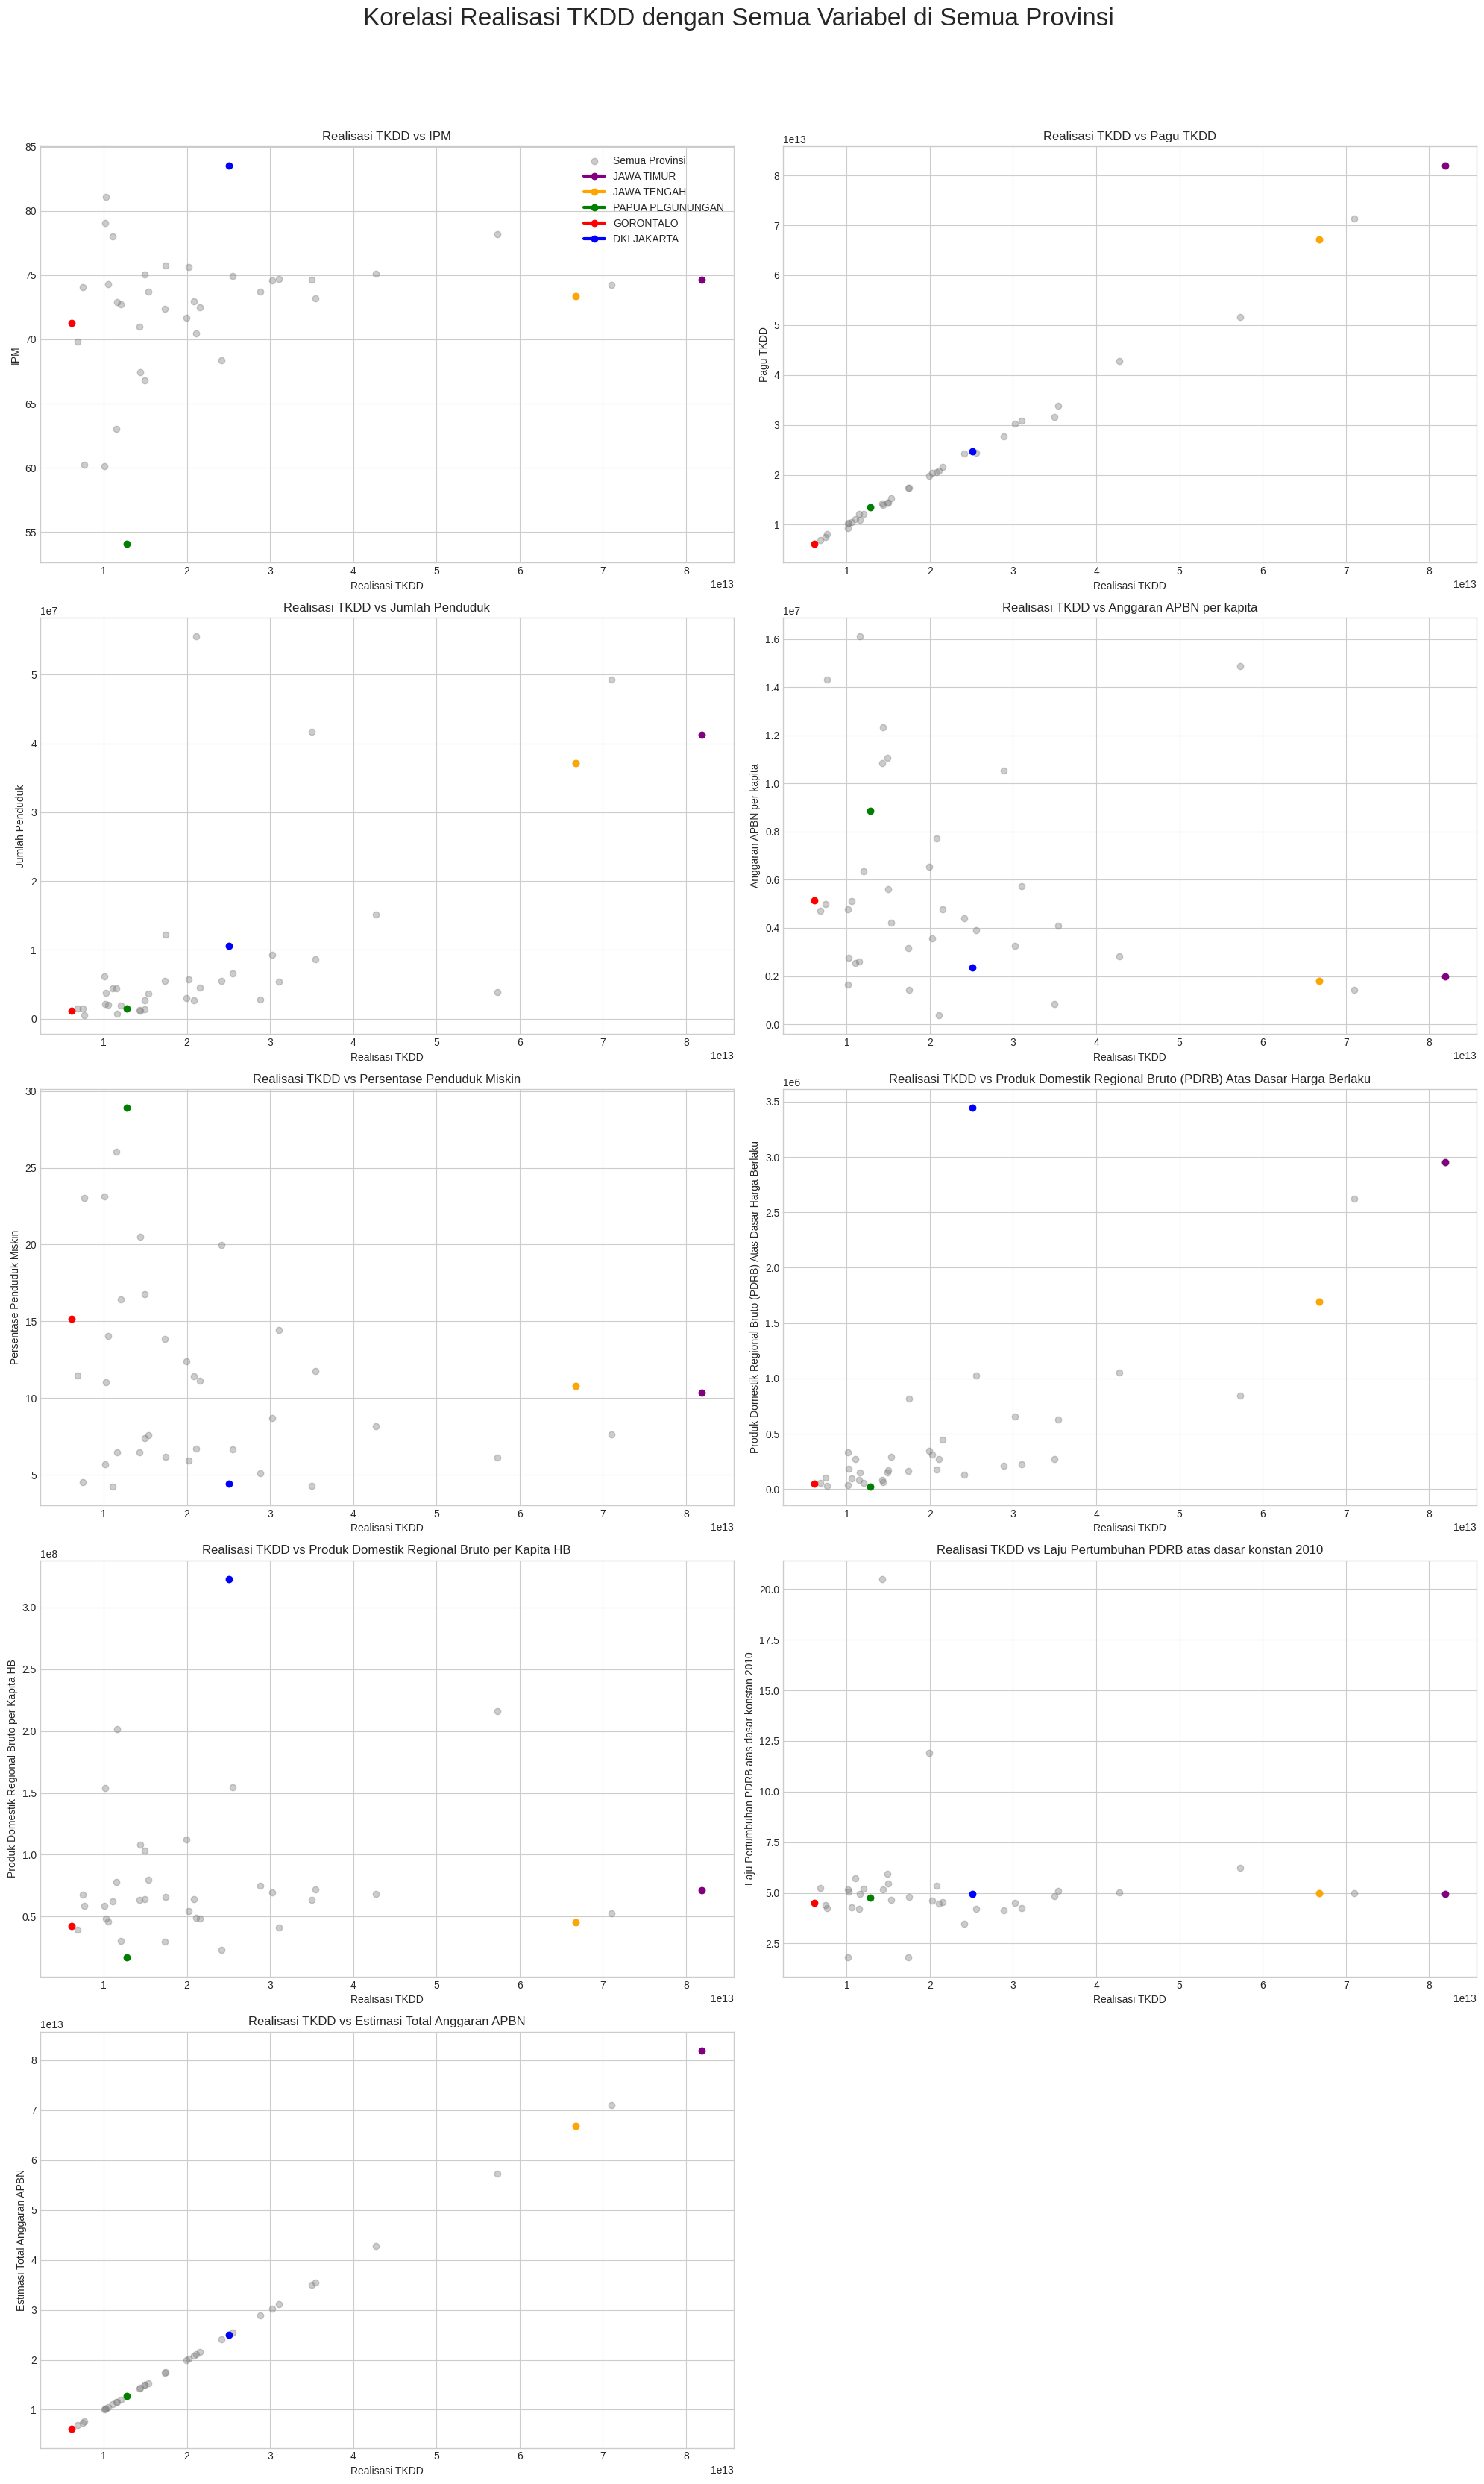

In [ ]:
realisasi_tkdd_multivariate = df_multivariate.sort_values('Realisasi TKDD')
highlight_provinsi = ['JAWA TIMUR', 'JAWA TENGAH', 'PAPUA PEGUNUNGAN', 'GORONTALO', 'DKI JAKARTA']
colors = {
    'DKI JAKARTA': 'blue',
    'JAWA TENGAH': 'orange',
    'PAPUA PEGUNUNGAN': 'green',
    'GORONTALO': 'red',
    'JAWA TIMUR': 'purple'
}

col = ['IPM', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010',
       'Estimasi Total Anggaran APBN']

plt.figure(figsize=(20, 35))

for i in range(len(col)):
    plt.subplot(5, 2, i + 1)

    plt.scatter(realisasi_tkdd_multivariate['Realisasi TKDD'], realisasi_tkdd_multivariate[col[i]], color='gray', alpha=0.4, label='Semua Provinsi')

    for prov in highlight_provinsi:
        df_prov = df_multivariate[df_multivariate['Provinsi'] == prov]
        plt.plot(df_prov['Realisasi TKDD'], df_prov[col[i]], label=prov, color=colors[prov], linewidth=3, marker='o')

    plt.xlabel("Realisasi TKDD")
    plt.ylabel(col[i])
    plt.title(f"Realisasi TKDD vs {col[i]}")
    plt.grid(True)

    if i == 0:
        plt.legend()

plt.suptitle("Korelasi Realisasi TKDD dengan Semua Variabel di Semua Provinsi ", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<p align="justify">
Selain 3 variabel di atas, jika berasumsi dengan hasil analisis pada poin <a href="#tkdd-vs-ipm">4.4.2</a>, sebenarnya <b>terdapat variabel lain yang juga mempengaruhi nilai tinggi-rendah Realisasi TKDD secara signifikan yaitu Anggaran APBN per kapita</b>. Anggaran APBN per kapita tidak secara langsung mempengaruhi Realisasi TKDD, tetapi variabel ini akan mempengaruhi Realisasi TKDD melalui variabel baru yang terbentuk hasil dari kombinasi Anggaran APBN per kapita dan Jumlah Penduduk yang sama dengan Estimasi Total Anggaran APBN. Jika dikombinasikan dengan beberapa faktor sebelumnya, maka dapat diasumsikan bahwa setidaknya terdapat 5 variabel yang mempengaruhi nilai tinggi-rendahnya Realisasi TKDD secara signifikan, yaitu:
<ul>
  <li>Pagu TKDD</li>
  <li>Jumlah Penduduk</li>
  <li>Anggaran APBN per kapita</li>
  <li>Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku</li>
  <li>Estimasi Total Anggaran APBN (Jumlah Penduduk * Anggaran APBN per kapita)</li>
</ul>
</p>

<h3>Analisis Faktor yang Mempengaruhi IPM</h3>

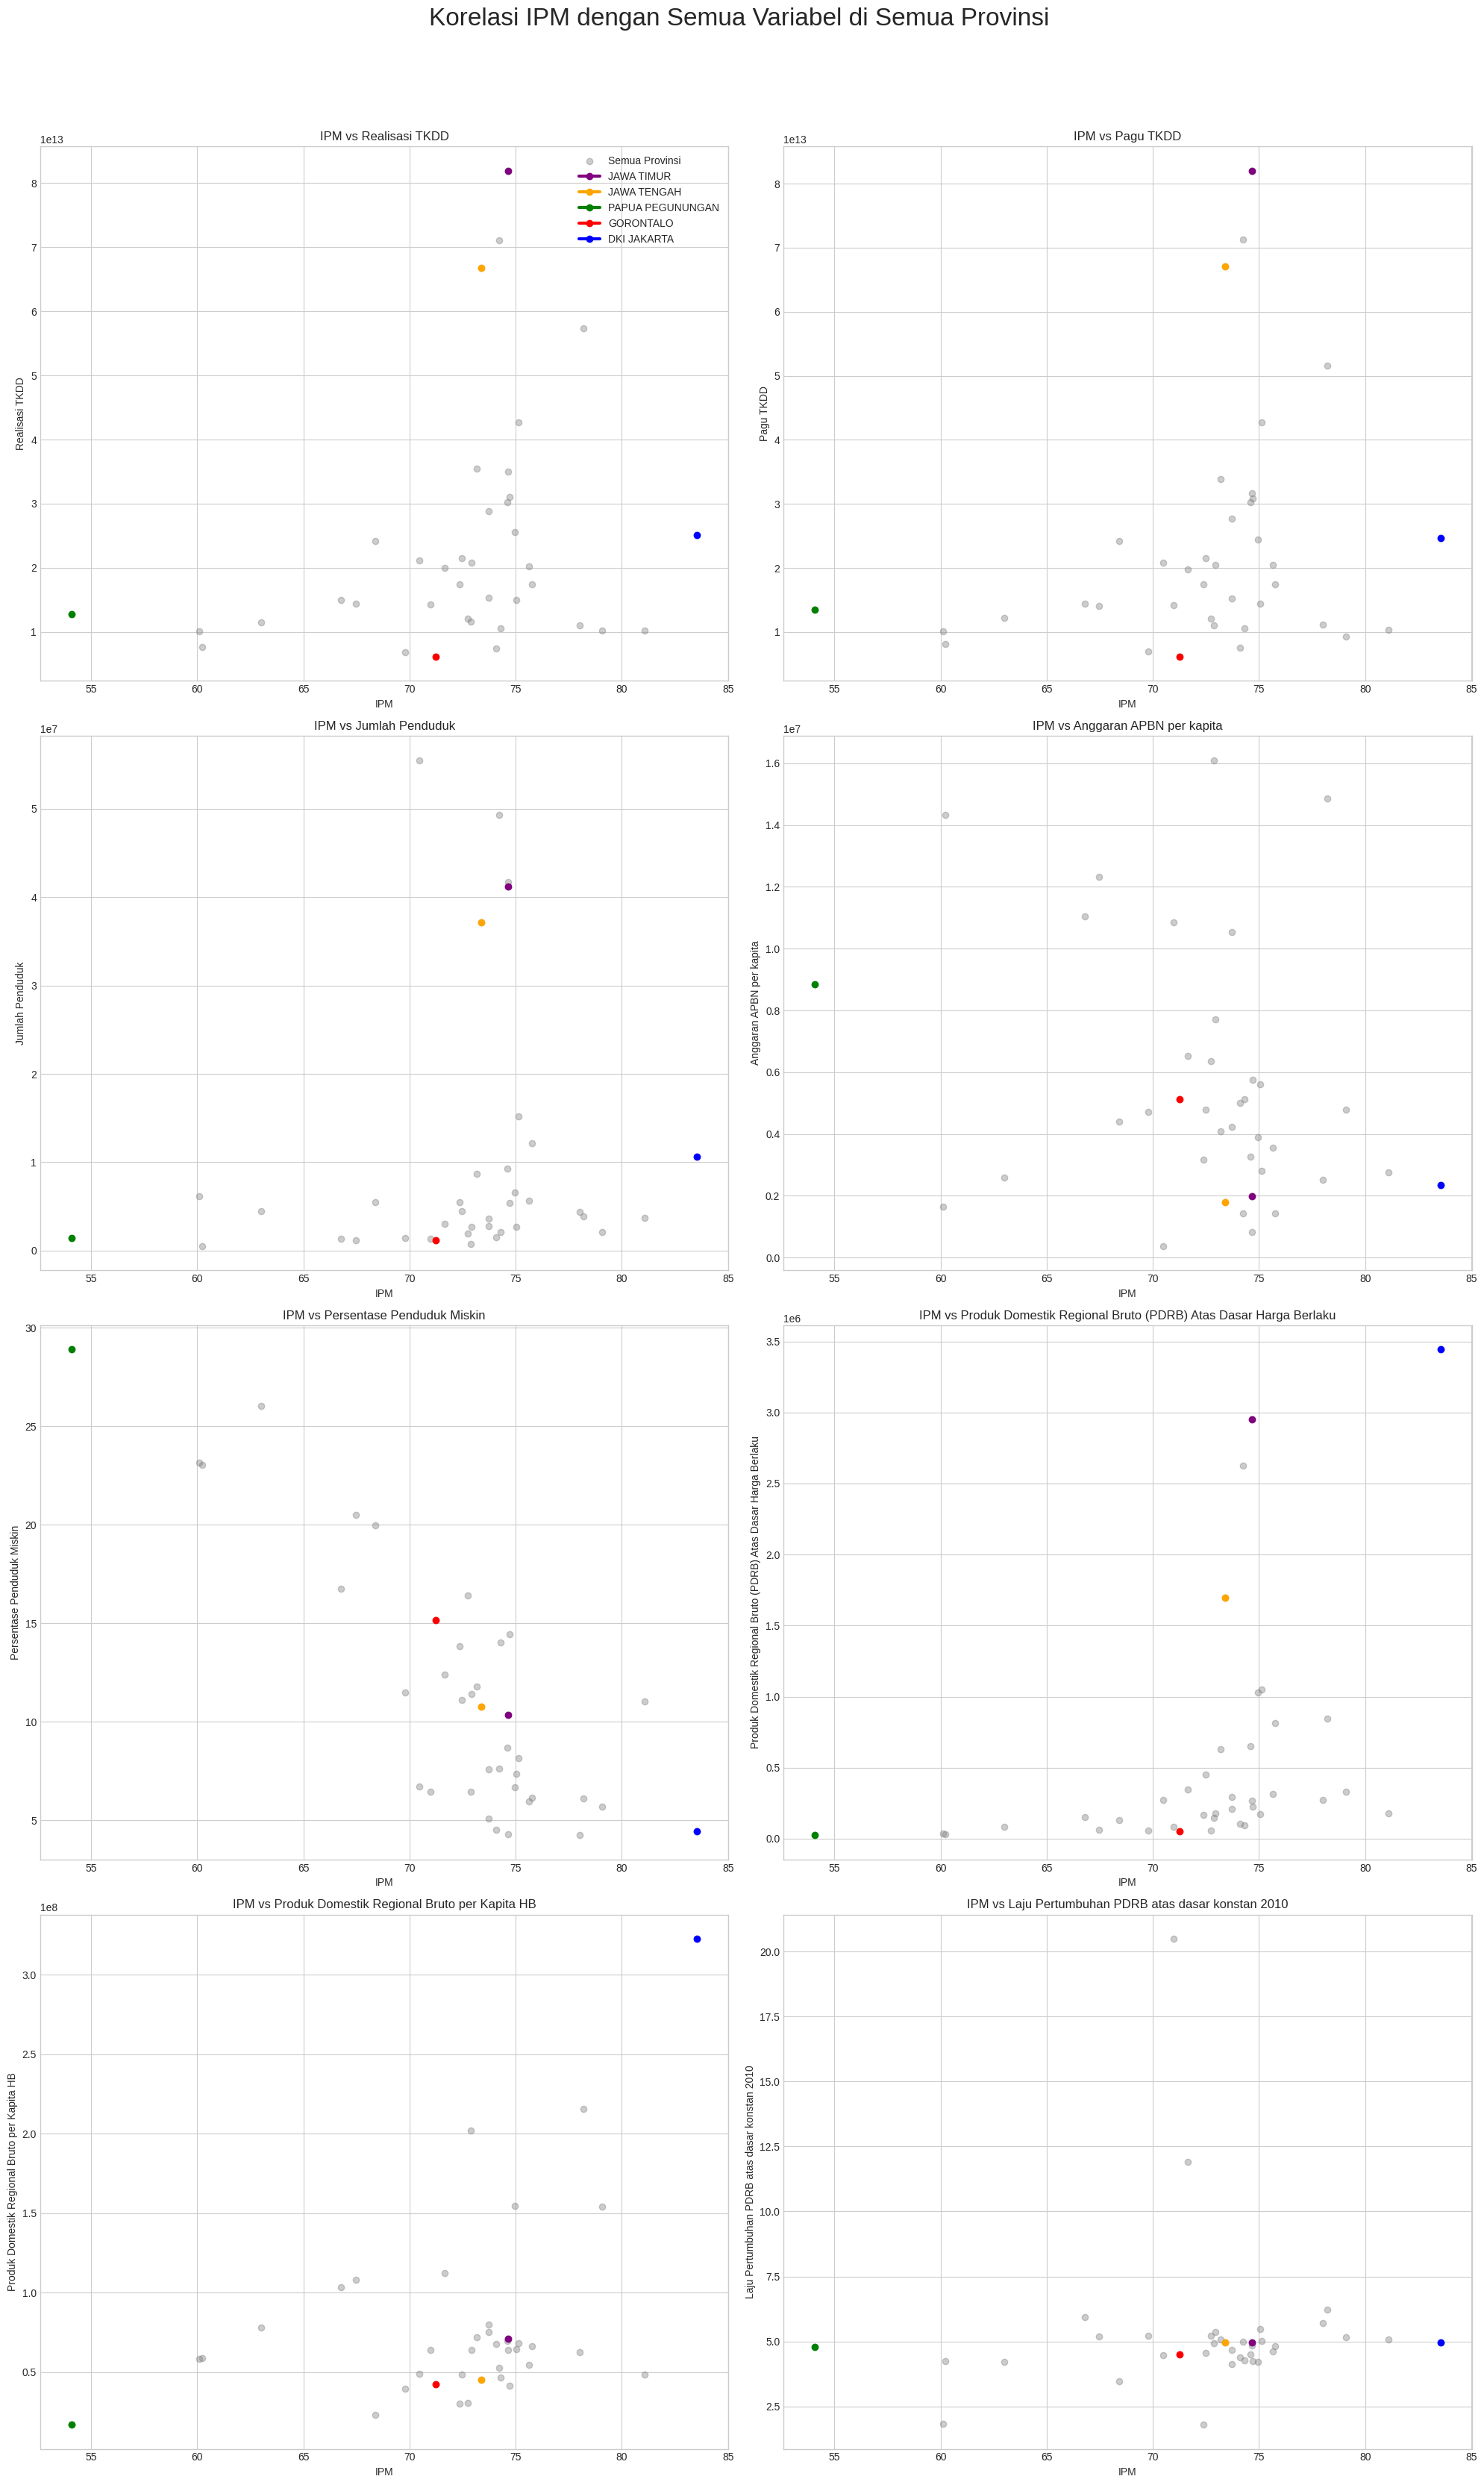

In [ ]:
highlight_provinsi = ['JAWA TIMUR', 'JAWA TENGAH', 'PAPUA PEGUNUNGAN', 'GORONTALO', 'DKI JAKARTA']
colors = {
    'DKI JAKARTA': 'blue',
    'JAWA TENGAH': 'orange',
    'PAPUA PEGUNUNGAN': 'green',
    'GORONTALO': 'red',
    'JAWA TIMUR': 'purple'
}

col = ['Realisasi TKDD', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']

plt.figure(figsize=(20, 35))

for i in range(len(col)):
    plt.subplot(4, 2, i + 1)

    plt.scatter(realisasi_tkdd_sort['IPM'], realisasi_tkdd_sort[col[i]], color='gray', alpha=0.4, label='Semua Provinsi')

    for prov in highlight_provinsi:
        df_prov = df[df['Provinsi'] == prov]
        plt.plot(df_prov['IPM'], df_prov[col[i]], label=prov, color=colors[prov], linewidth=3, marker='o')

    plt.xlabel("IPM")
    plt.ylabel(col[i])
    plt.title(f"IPM vs {col[i]}")
    plt.grid(True)

    if i == 0:
        plt.legend()

plt.suptitle("Korelasi IPM dengan Semua Variabel di Semua Provinsi ", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<p align="justify">
Melalui hasil visualisasi tersebut, <b>beberapa variabel terlihat mempengaruhi tinggi-rendahnya IPM seperti Persentase Penduduk Miskin, PDRB Atas Dasar Harga Berlaku, dan PDRB per Kapita HB</b>. Faktor lain yang menggambarkan angka penetapan Pagu TKDD oleh Pemerintah Pusat maupun Realisasi TKDD terlihat tidak terlalu memiliki hubungan yang kuat dengan IPM, sesuai dengan angka korelasi yang tergambar pada <i>heatmap</i> korelasi pada poin <a href="#hubungan-variabel">4.3</a>. Berikut penjelasan lebih lanjut faktor/variabel yang cukup memiliki pengaruh dalam tinggi-rendahnya nilai IPM suatu wilayah:
</p>

<ul>
  <li><b>Persentase Penduduk Miskin</b></li>
    <p align="justify">
   Variabel Persentase Penduduk Miskin memiliki kaitan yang sangat erat dengan pembangunan manusia dan menjadi indikator kuat yang mencerminkan kualitas Indeks Pembangunan Manusia (IPM) suatu provinsi. Pada visualisasi plot, meskipun sebaran data menunjukkan adanya klasterisasi hubungan yang negatif, dapat diartikan peningkatan kualitas masyarakat seperti kesehatan, pendidikan, dan standar hidup layak secara inheren berkontribusi pada pengurangan jumlah penduduk yang berada di garis kemiskinan. Dengan demikian, semakin maju pembangunan manusia di suatu provinsi, semakin efektif pula upaya pengurangan jumlah penduduk yang berada di bawah garis kemiskinan.
    </p>
  <li><b>Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku</b></li>
    <p align="justify">
    Plot antara PDRB Atas Dasar Harga Berlaku dengan IPM juga saling berkaitan walaupun korelasi pada <i>heatmap</i>-nya kecil. Untuk nilai Realisasi TKDD yang rendah hingga tinggi, nilai IPM relatif tinggi. Hal ini sangat logis, karena semakin maju/tinggi kualitas pembangunan manusia di suatu provinsi, semakin banyak total aktivitas ekonomi yang dapat dihasilkan. Pada visualisasi diatas dapat dilihat Provinsi DKI Jakarta dengan IPM tertinggi, memiliki nilai PDRB Atas Dasar Harga Berlaku yang sangat besar. Sebaliknya, Papua Pegunungan, dengan IPM terendah, berada di ujung bawah dalam hal PDRB, menyoroti keterbatasan ekonomi sebagai salah satu faktor penghambat pembangunan manusia di wilayah tersebut.
    </p>
  <li><b>Produk Domestik Regional Bruto per Kapita HB</b></li>
    <p align="justify">
    Variabel PDRB per Kapita HB memiliki hubungan yang sama seperti PDRB Atas Dasar Harga Berlaku dengan IPM. Provinsi dengan pendapatan rata-rata individu lebih tinggi (DKI Jakarta, Jawa Timur, Gorontalo, Jawa Tengah) cenderung memiliki kemajuan dalam dimensi kesehatan, pendidikan, dan standar hidup yang layak. Namun, dapat disoroti Provinsi Papua Pegunungan masih mengalami kesenjangan pembangunan manusia juga kemampuan aktivitas ekonomi yang masih rendah.
    </p>
</ul>

<p align="justify">
<b>Tinggi-rendahnya nilai IPM secara dominan dipengaruhi oleh faktor kesejahteraan masyarakat, yaitu besarnya penduduk miskin di wilayah itu, dan ukuran ekonomi (PDRB Atas Dasar Harga Berlaku)</b>. Faktor-faktor anggaran seperti Pagu TKDD, Realisasi TKDD, atau Anggaran APBN tidak menunjukkan hubungan yang kuat dari analisis visual ini.
</p>

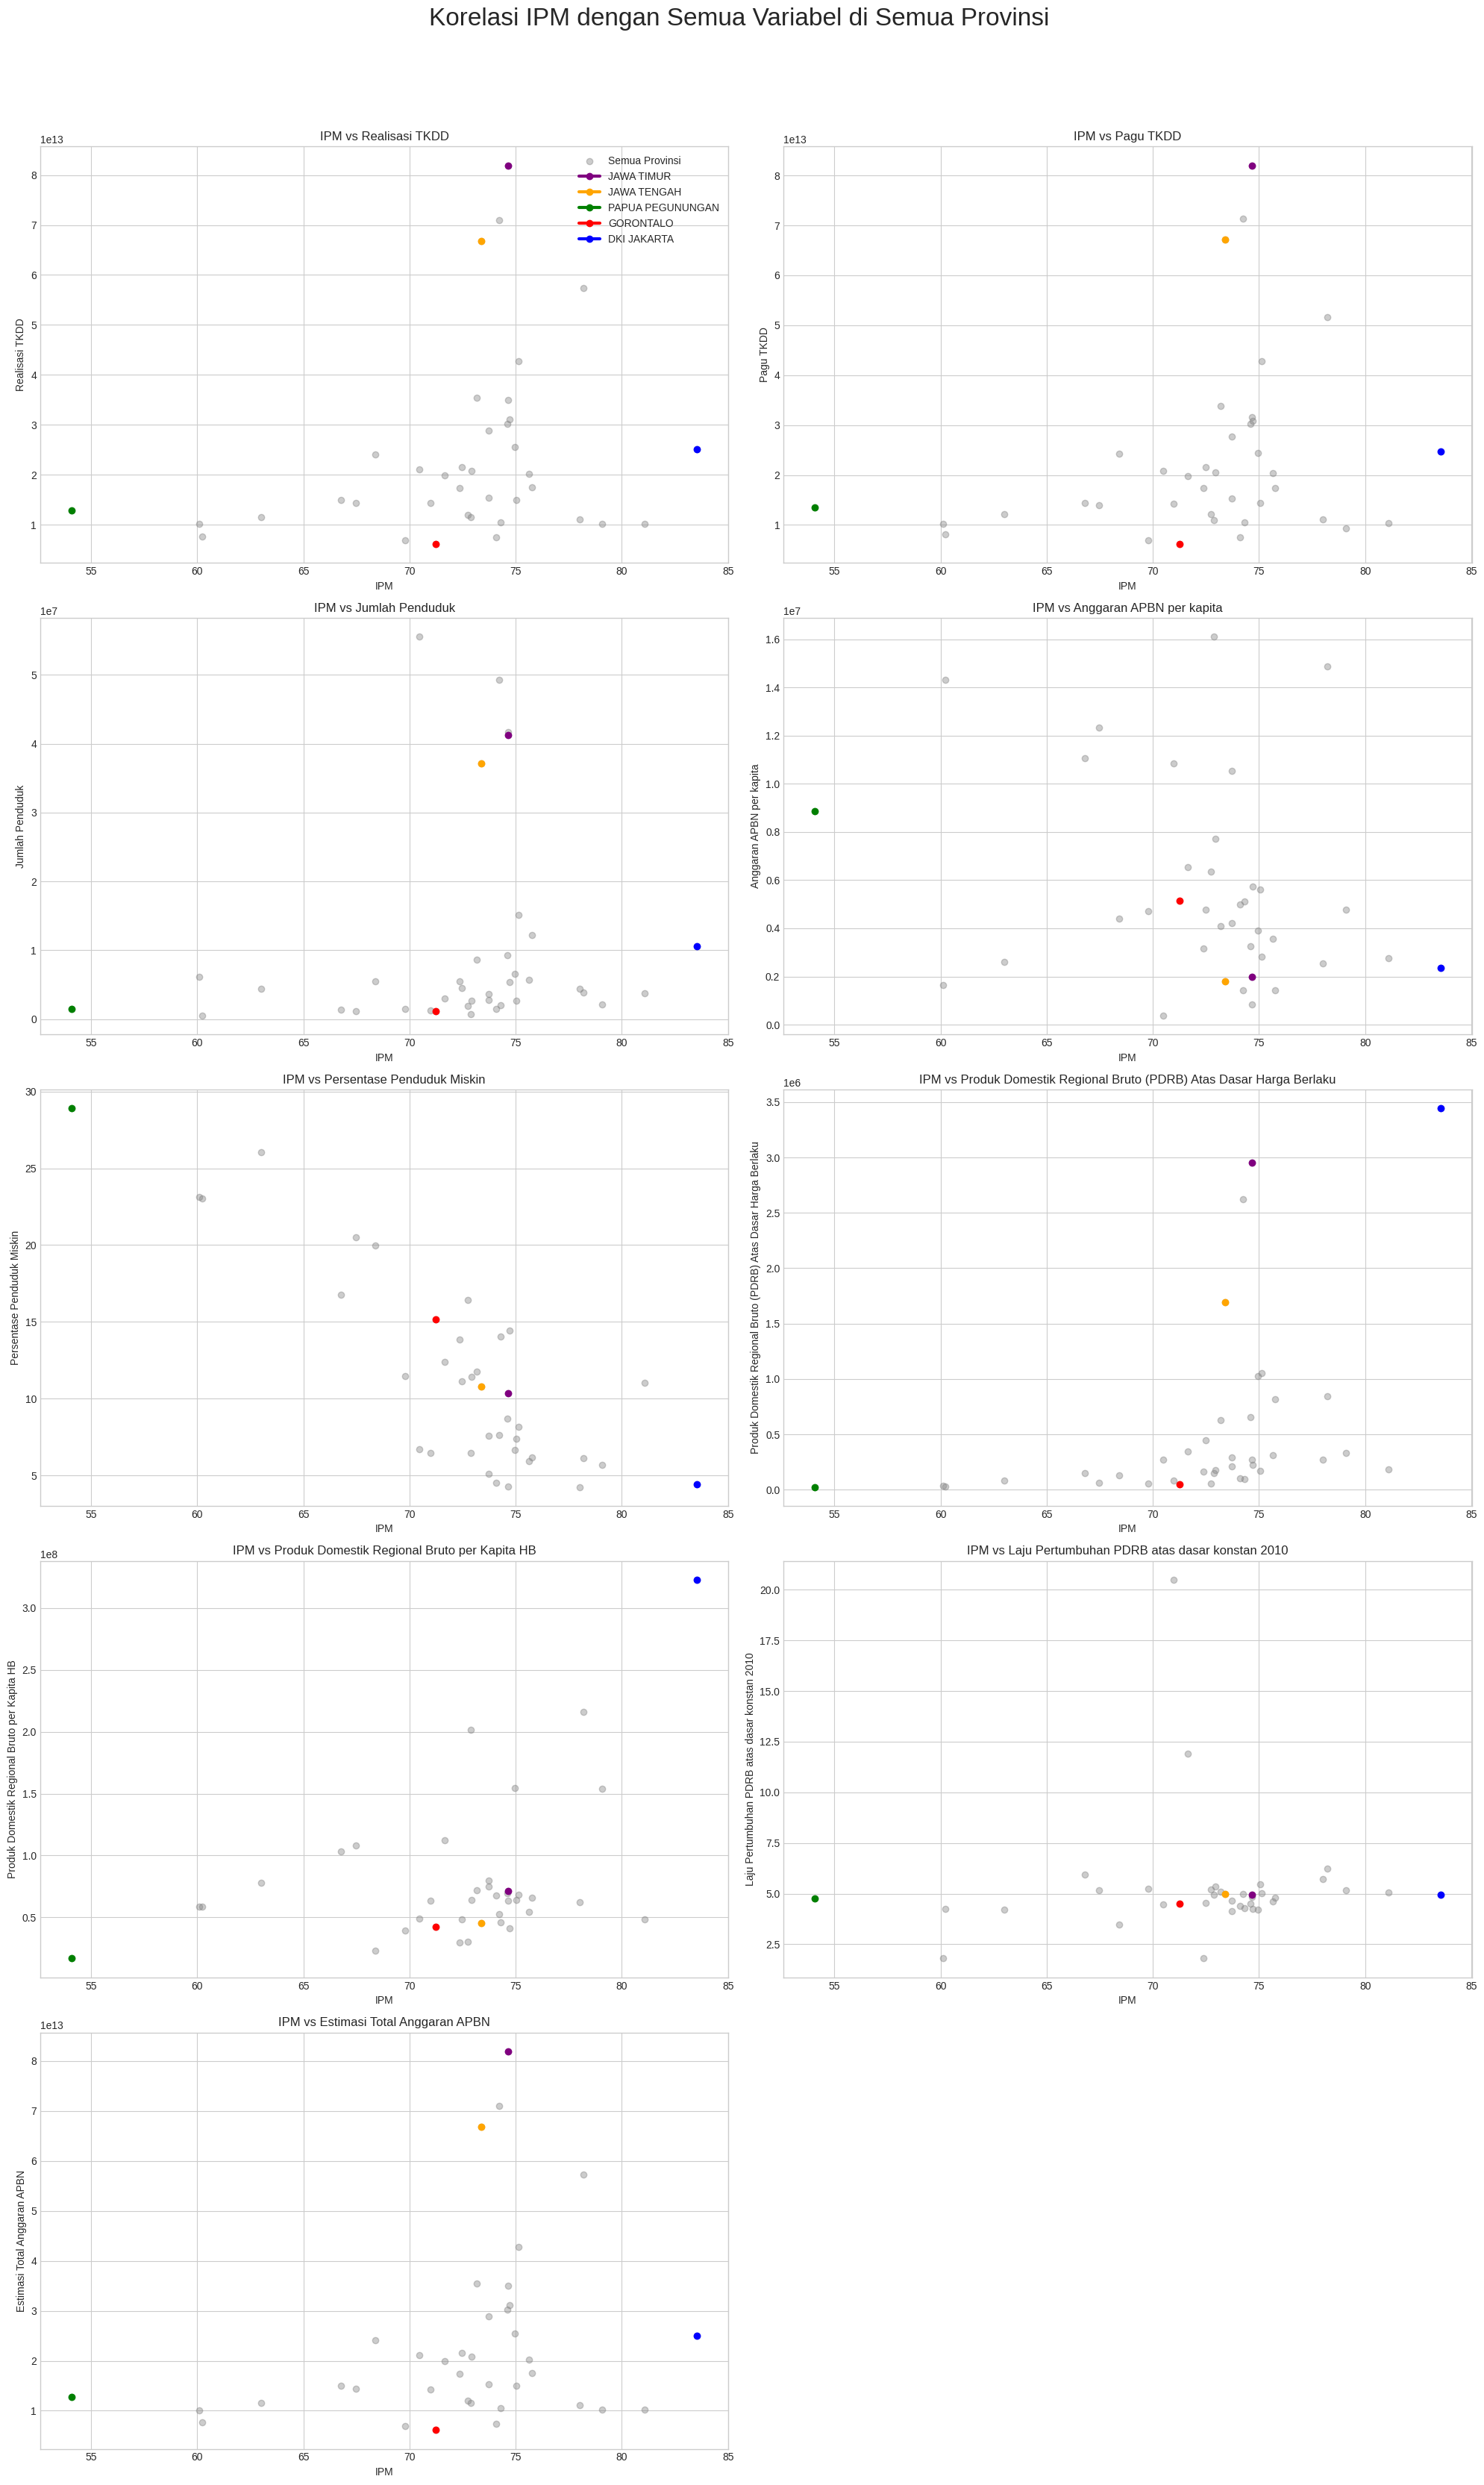

In [ ]:
realisasi_tkdd_multivariate = df_multivariate.sort_values('IPM')
highlight_provinsi = ['JAWA TIMUR', 'JAWA TENGAH', 'PAPUA PEGUNUNGAN', 'GORONTALO', 'DKI JAKARTA']
colors = {
    'DKI JAKARTA': 'blue',
    'JAWA TENGAH': 'orange',
    'PAPUA PEGUNUNGAN': 'green',
    'GORONTALO': 'red',
    'JAWA TIMUR': 'purple'
}

col = ['Realisasi TKDD', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010',
       'Estimasi Total Anggaran APBN']

plt.figure(figsize=(20, 35))

for i in range(len(col)):
    plt.subplot(5, 2, i + 1)

    plt.scatter(realisasi_tkdd_multivariate['IPM'], realisasi_tkdd_multivariate[col[i]], color='gray', alpha=0.4, label='Semua Provinsi')

    for prov in highlight_provinsi:
        df_prov = df_multivariate[df_multivariate['Provinsi'] == prov]
        plt.plot(df_prov['IPM'], df_prov[col[i]], label=prov, color=colors[prov], linewidth=3, marker='o')

    plt.xlabel("IPM")
    plt.ylabel(col[i])
    plt.title(f"IPM vs {col[i]}")
    plt.grid(True)

    if i == 0:
        plt.legend()

plt.suptitle("Korelasi IPM dengan Semua Variabel di Semua Provinsi ", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<p align="justify">
Berbeda dengan Realisasi TKDD, variabel baru Estimasi Total Anggaran APBN terlihat tidak terlalu memiliki pengaruh yang cukup kuat terhadap tinggi-rendahnya nilai IPM suatu daerah. Oleh karena itu, dapat diasumsikan bahwa setidaknya terdapat 3 variabel yang mempengaruhi nilai tinggi-rendahnya IPM secara signifikan, yaitu:
<ul>
  <li>Persentase Penduduk Miskin</li>
  <li>Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku</li>
  <li>Produk Domestik Regional Bruto per Kapita HB</li>
</ul>
</p>

<a name="feature-importance"></a>
#### **4.4.3.2. <i>Feature Importance - Machine Learning (Random Forest Regressor)**

<p align="justify">
Bagian ini bertujuan untuk mencari variabel yang paling penting dalam menentukan tinggi rendahnya Realisasi TKDD menggunakan <i> Random Forest Regressor</i>. Metode ini kami pilih dalam tahap <i>feature importance</i> karena prosesnya yang acak dalam memilih subset data dan fitur untuk setiap pohon keputusan. Randomisasi ini memastikan penilaian yang adil dan tidak bias terhadap kontribusi setiap variabel, seperti IPM, Pagu TKDD, hingga PDRB dan Persentase Penduduk Miskin, terlepas dari skala atau jenisnya.
</p>

Sumber: [Feature Importance with Random Forest](https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests/)

<h3>Analisis Fitur Penting Realisasi TKDD</h3>

                                                    Peringkat Penting
Pagu TKDD                                                        0.83
Produk Domestik Regional Bruto (PDRB) Atas Dasa...               0.10
Jumlah Penduduk                                                  0.03
Laju Pertumbuhan PDRB atas dasar konstan 2010                    0.01
Produk Domestik Regional Bruto per Kapita HB                     0.01
IPM                                                              0.01
Anggaran APBN per kapita                                         0.01
Persentase Penduduk Miskin                                       0.00




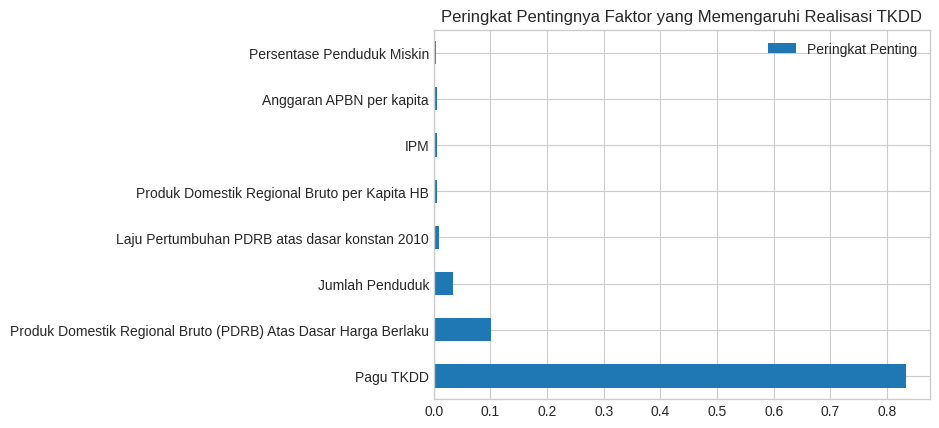

In [ ]:
from sklearn.ensemble import RandomForestRegressor

features_tkdd = ['IPM', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']
target_tkdd = 'Realisasi TKDD'

X_tkdd = df[features_tkdd]
y_tkdd = df[target_tkdd]

model_rf_tkdd = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_tkdd.fit(X_tkdd, y_tkdd)

feature_importances = pd.DataFrame(model_rf_tkdd.feature_importances_, index=X_tkdd.columns, columns=['Peringkat Penting']).sort_values('Peringkat Penting', ascending=False)
print(feature_importances)
print('\n')

feature_importances.plot(kind='barh')
plt.title('Peringkat Pentingnya Faktor yang Memengaruhi Realisasi TKDD')
plt.show()

<p align="justify">
Pada visualisasi <i>feature importance</i> pada Realisasi TKDD, terbukti bahwa asumsi faktor-faktor pada tahap sebelumnya <b>benar</b> bahwa terdapat 3 faktor utama yang mempengaruhi Realisasi TKDD yaitu Pagu TKDD, PDRB Atas Dasar Harga Berlaku, dan Jumlah Penduduk. Ditinjau lebih detail, Pagu TKDD menunjukkan peringkat faktor penting yang sangat besar yaitu 0.83 (83%), mengindikasikan bahwa <b>jumlah batas dana alokasi yang ditetapkan oleh Pemerintah Pusat adalah faktor penentu utama seberapa besar dana tersebut dapat direalisasikan oleh provinsi.</b> Disusul oleh Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku sebesar 0.10 (10%), yang menyoroti <b>peran aktivitas ekonomi provinsi dalam menyerap dan merealisasikan dana tersebut.</b> Jumlah Penduduk menempati peringkat ketiga dengan 0.03 (3%), menunjukkan bahwa <b>populasi juga memiliki kontribusi terhadap penentuan Realisasi TKDD, meskipun tidak sebesar dua faktor teratas</b>. Variabel-variabel lain seperti Laju Pertumbuhan PDRB, Produk Domestik Regional Bruto per Kapita HB, IPM, Anggaran APBN per kapita, dan Persentase Penduduk Miskin memiliki peringkat yang sangat rendah atau mendekati nol (0.01 hingga 0.00), menunjukkan bahwa pengaruh variabel tersebut terhadap Realisasi TKDD relatif tidak signifikan.
</p>

                                                    Peringkat Penting
Pagu TKDD                                                        0.50
Estimasi Total Anggaran APBN                                     0.42
Produk Domestik Regional Bruto (PDRB) Atas Dasa...               0.04
Jumlah Penduduk                                                  0.01
Laju Pertumbuhan PDRB atas dasar konstan 2010                    0.01
Anggaran APBN per kapita                                         0.01
IPM                                                              0.01
Produk Domestik Regional Bruto per Kapita HB                     0.00
Persentase Penduduk Miskin                                       0.00




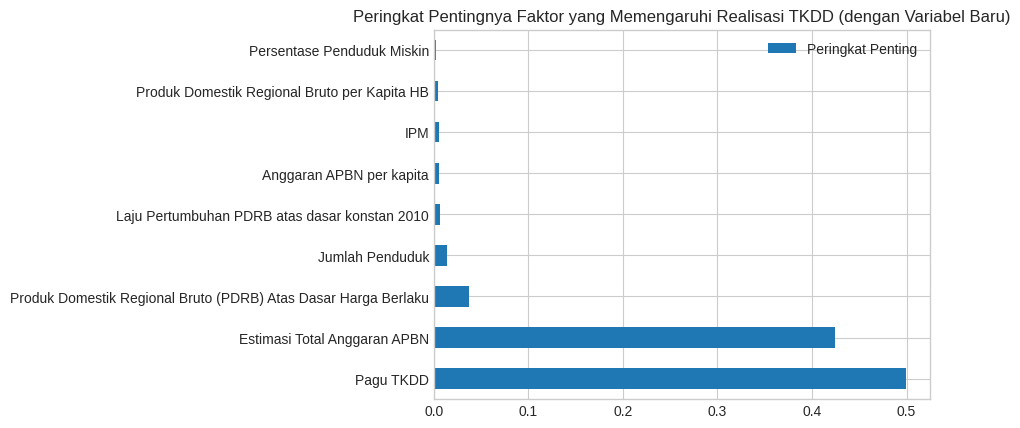

In [ ]:
features_tkdd_multivariate = ['IPM', 'Pagu TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
                              'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
                              'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010',
                              'Estimasi Total Anggaran APBN']
target_tkdd_multivariate = 'Realisasi TKDD'

X_tkdd_multivariate = df_multivariate[features_tkdd_multivariate]
y_tkdd_multivariate = df_multivariate[target_tkdd_multivariate]

model_rf_tkdd_multivariate = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_tkdd_multivariate.fit(X_tkdd_multivariate, y_tkdd_multivariate)

feature_importances = pd.DataFrame(model_rf_tkdd_multivariate.feature_importances_, index=X_tkdd_multivariate.columns, columns=['Peringkat Penting']).sort_values('Peringkat Penting', ascending=False)
print(feature_importances)
print('\n')

feature_importances.plot(kind='barh')
plt.title('Peringkat Pentingnya Faktor yang Memengaruhi Realisasi TKDD (dengan Variabel Baru)')
plt.show()

<p align="justify">
Ketika ditambahkan variabel baru pada fitur model, maka hasil dari <i>feature importance</i> untuk variabel Realisasi TKDD akan sedikit berubah. Seperti yang digambarkan pada visualisasi di atas, fitur <b>Estimasi Total Anggaran APBN menjadi fitur paling penting nomor 2 sebesar 0.42 (42%)</b>. Namun, kepentingan dari fitur <b>Pagu TKDD menurun menjadi hanya sebesar 0.5 (50%)</b>, bahkan fitur <b>Jumlah Penduduk juga menurun menjadi 0.01 (1%)</b> sama seperti variabel lain yang tidak terlalu berpengaruh. Hal ini menunjukkan bahwa <b>besar dana alokasi yang direalisasikan tidak serta-merta hanya ditentukan secara besar oleh pagu, tetapi juga dipengaruhi oleh variabel lain seperti Jumlah Penduduk dan Anggaran APBN per kapita melalui variabel multikolinearitas Estimasi Total Anggaran APBN</b>. Maka dari itu, dapat ditarik kesimpulan bahwa asumsi faktor yang mempengaruhi nilai tinggi-rendahnya Realisasi TKDD adalah benar, yaitu <b>terdapat setidaknya 5 faktor yang dapat mempengaruhi Realisasi TKDD secara signifikan</b>:
<ul>
  <li>Pagu TKDD</li>
  <li>Jumlah Penduduk</li>
  <li>Anggaran APBN per kapita</li>
  <li>Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku</li>
  <li>Estimasi Total Anggaran APBN (Jumlah Penduduk * Anggaran APBN per kapita)</li>
</ul>
</p>

<h3>Analisis Fitur Penting IPM</h3>

                                                    Peringkat Penting
Persentase Penduduk Miskin                                       0.69
Produk Domestik Regional Bruto (PDRB) Atas Dasa...               0.11
Produk Domestik Regional Bruto per Kapita HB                     0.06
Pagu TKDD                                                        0.04
Laju Pertumbuhan PDRB atas dasar konstan 2010                    0.03
Realisasi TKDD                                                   0.03
Anggaran APBN per kapita                                         0.02
Jumlah Penduduk                                                  0.02




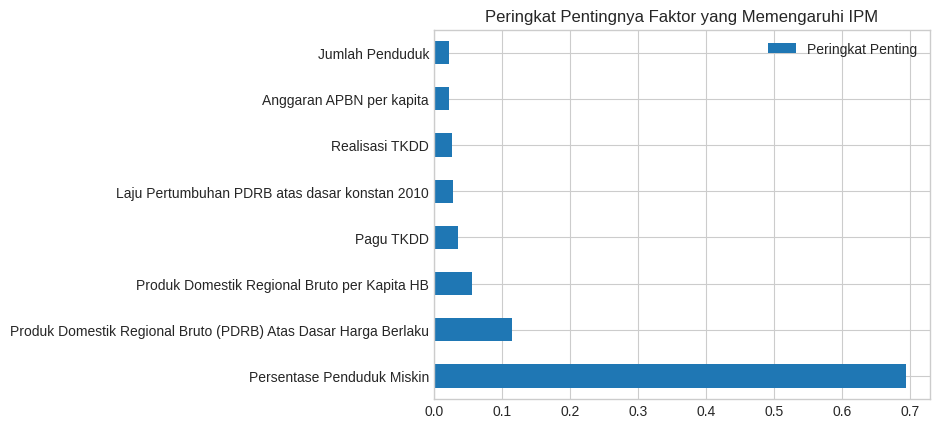

In [ ]:
features_ipm = ['Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
       'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']
target_ipm = 'IPM'

X_ipm = df[features_ipm]
y_ipm = df[target_ipm]

model_rf_ipm = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_ipm.fit(X_ipm, y_ipm)

feature_importances = pd.DataFrame(model_rf_ipm.feature_importances_, index=X_ipm.columns, columns=['Peringkat Penting']).sort_values('Peringkat Penting', ascending=False)
print(feature_importances)
print('\n')

feature_importances.plot(kind='barh')
plt.title('Peringkat Pentingnya Faktor yang Memengaruhi IPM')
plt.show()

<p align="justify">
Pada visualisasi <i>feature importance</i> pada IPM, terbukti bahwa asumsi faktor-faktor pada tahap sebelumnya <b>salah</b> bahwa terdapat 2 faktor utama yang mempengaruhi IPM yaitu Persentase Penduduk Miskin dan PDRB Atas Dasar Harga Berlaku. Ditinjau lebih detail, Persentase Penduduk Miskin menunjukkan peringkat faktor penting yang cukup besar yaitu 0.69 (69%), mengindikasikan bahwa <b>kemampuan pembangunan manusia adalah faktor penentu utama seberapa kecil jumlah penduduk miskin suatu provinsi.</b> Disusul oleh Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku sebesar 0.11 (11%), yang menyoroti <b>peran aktivitas ekonomi provinsi dalam menyerap dan merealisasikan dana tersebut.</b> Variabel-variabel lain seperti Produk Domestik Regional Bruto per Kapita HB, Pagu TKDD, Laju Pertumbuhan Atas Dasar Konstan 2010, Realisasi TKDD, Anggaran APBN per Kapita dan Jumlah Penduduk memiliki peringkat yang sangat rendah atau mendekati nol (0.06 hingga 0.00), menunjukkan bahwa pengaruh variabel tersebut terhadap Realisasi TKDD relatif tidak signifikan.
</p>

                                                    Peringkat Penting
Persentase Penduduk Miskin                                       0.69
Produk Domestik Regional Bruto (PDRB) Atas Dasa...               0.12
Produk Domestik Regional Bruto per Kapita HB                     0.05
Laju Pertumbuhan PDRB atas dasar konstan 2010                    0.03
Realisasi TKDD                                                   0.03
Jumlah Penduduk                                                  0.02
Pagu TKDD                                                        0.02
Anggaran APBN per kapita                                         0.02
Estimasi Total Anggaran APBN                                     0.02




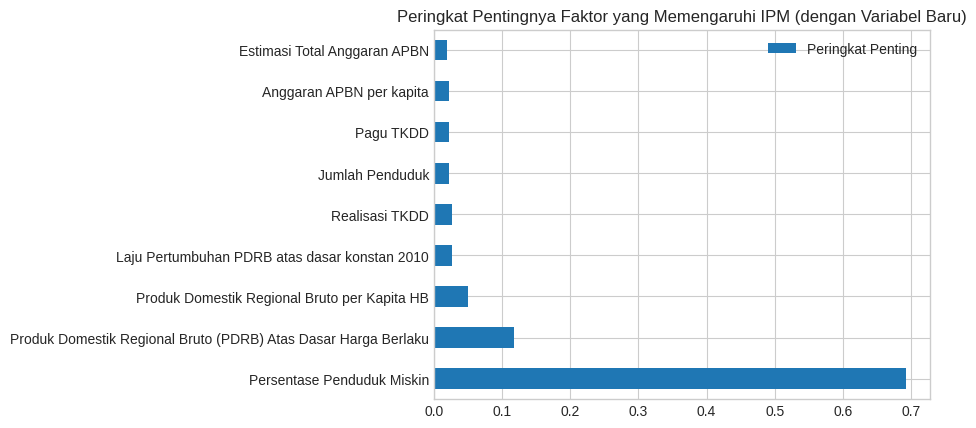

In [ ]:
features_ipm_multivariate = ['Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk', 'Anggaran APBN per kapita',
                'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
                'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010',
                             'Estimasi Total Anggaran APBN']
target_ipm_multivariate = 'IPM'

X_ipm_multivariate = df_multivariate[features_ipm_multivariate]
y_ipm_multivariate = df_multivariate[target_ipm_multivariate]

model_rf_ipm_multivariate = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_ipm_multivariate.fit(X_ipm_multivariate, y_ipm_multivariate)

feature_importances = pd.DataFrame(model_rf_ipm_multivariate.feature_importances_, index=X_ipm_multivariate.columns, columns=['Peringkat Penting']).sort_values('Peringkat Penting', ascending=False)
print(feature_importances)
print('\n')

feature_importances.plot(kind='barh')
plt.title('Peringkat Pentingnya Faktor yang Memengaruhi IPM (dengan Variabel Baru)')
plt.show()

<p align="justify">
Sama seperti sebelumnya, ketika ditambahkan variabel baru pada fitur model maka hasil dari <i>feature importance</i> untuk variabel IPM tidak terlihat berubah secara signifikan. Seperti yang digambarkan pada visualisasi di atas, fitur <b>Persentase Penduduk Miskin dan PDRB Atas Dasar Harga Berlaku masih menjadi fitur paling penting sebesar 0.69 (69%) dan 0.12 (12%)</b>. Namun, kepentingan dari fitur <b>Pagu TKDD menurun menjadi hanya 0.02 (2%)</b>, bahkan fitur <b>PDRB per Kapita juga sebesar 0.01 (1%)</b> sama seperti variabel lain yang tidak terlalu berpengaruh. Hal ini menunjukkan bahwa <b>besar kecilnya kemajuan pembangunan manusia dapat mempengaruhi besaran jumlah penduduk miskin serta IPM dapat dinilai dari aktivitas ekonomi yang terjadi, sehingga variabel baru (estimasi total anggaran APBN) tidak menunjukkan andil yang nyata dalam hal ini</b>. Maka dari itu, dapat ditarik kesimpulan bahwa asumsi faktor yang mempengaruhi nilai tinggi-rendahnya IPM adalah benar, yaitu <b>terdapat setidaknya 2 faktor yang dapat mempengaruhi IPM secara signifikan</b>:
<ul>
  <li>Persentase Penduduk Miskin </li>
  <li>PDRB Atas Dasar Harga Berlaku</li>
</ul>
</p>

<a name='hasil'></a>
# **5. Hasil dan Pembahasan**

<a name="hasil-1"></a>
## **5.1. Tingkat Perbandingan Antara Pagu dan Realisasi TKDD di Setiap Provinsi**

<p align="justify">
Berdasarkan hasil analisis perbandingan Pagu TKDD dan Realisasi TKDD pada poin <a href="#tkdd">4.2</a>, tingkat pemanfaatan anggaran TKDD untuk setiap provinsi pada tahun 2023 terbilang cukup efisien, yang ditunjukkan oleh selisih antara nilai Realisasi dan Pagu TKDD yang secara visual tidak terlalu besar pada sebagian besar provinsi. Selain itu, jika melihat pada matriks korelasi pada poin <a href="#heatmap-korelasi">4.3.1</a>, terlihat memang bahwa Pagu TKDD dan Realisasi TKDD memiliki korelasi yang mendekati 1:1. Hal ini mengonfirmasi bahwa semakin besar nilai pagu yang ditetapkan, realisasinya juga cenderung akan semakin besar, sehingga menghasilkan tingkat penyerapan anggaran yang tinggi.
</p>

<p align="justify">
Walaupun begitu, distribusi nominal Realisasi TKDD di setiap provinsi terlihat sangat bervariasi. Dari grafik perbandingan 5 realisasi tertinggi dan terendah, terlihat adanya kesenjangan skala yang sangat signifikan. Sebagai contoh, Provinsi Jawa Timur sebagai penerima realisasi tertinggi mencapai Rp 81.9 Triliun, nilai yang lebih dari 13 kali lipat dibandingkan Gorontalo sebagai salah satu provinsi dengan realisasi terendah, yaitu Rp 6.2 Triliun. Perbedaan yang ekstrem ini menunjukkan bahwa distribusi dari TKDD belum merata, yang berpotensi menyebabkan munculnya masalah ketimpangan fiskal antar daerah (Nuswandari I, 2024).
</p>

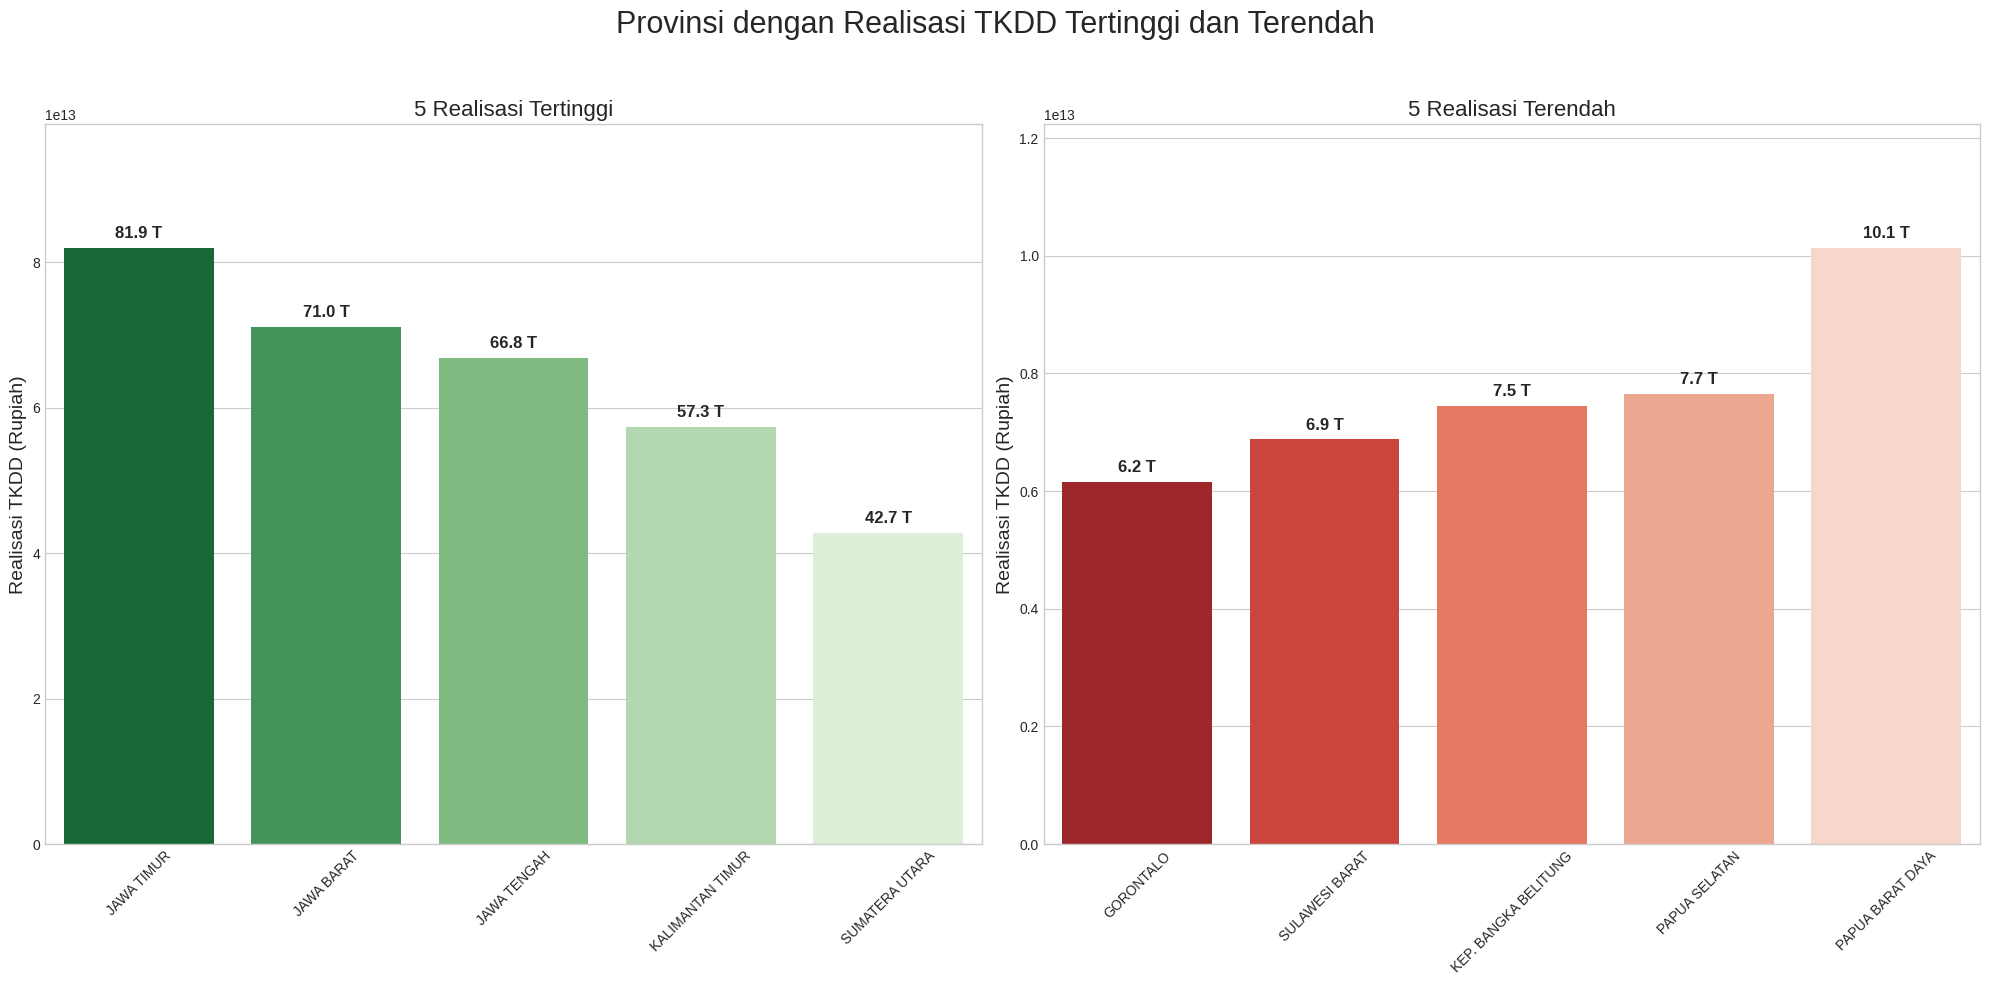

<p align="justify">
Dari grafik tersebut, terlihat bahwa terdapat selisih yang besar antara provinsi dengan Realisasi TKDD tertinggi dan terendah. jika didasarkan pada hasil analisis pada poin <a href="#EDA">4</a>, dapat disimpulkan bahwa ketidakmerataan nilai Realisasi TKDD ini merupakan cerminan langsung dari tidak meratanya juga distribusi populasi, PDRB, dan Pagu TKDD untuk setiap provinsi di Indonesia.
</p>

Sumber: [Nuswandari I., 2024, Proposal PKM: OPTIMALISASI ANGGARAN TRANSFER KE DAERAH (TKD) UNTUK KESEJAHTERAAN MASYARAKAT](http://repository.ipwija.ac.id/5220/2/20240909.%20ABDIMAS%20%20INTI%20NUSWANDARI.%20LGKP.pdf)

<a name="hasil-2"></a>
## **5.2. Persentase Realisasi TKDD dari Tiap Provinsi**

<p align="justify">
Untuk mendukung penjelasan yang terdapat pada poin <a href="#hasil-1">5.1</a>, visualisasi dari persentase Realisasi TKDD tiap provinsi dapat menjadi salah satu bukti untuk menguatkan bahwa pemanfaatan TKDD dari setiap provinsi sudah cukup efisien. Untuk memudahkan dalam visualisasi dan interpretasi, maka setiap provinsi dapat dikategorikan terlebih dahulu berdasarkan persentase realisasi TKDD-nya. Pembagian kategorinya sendiri diatur sebagai berikut:
<ul>
  <li>Di bawah 90% = Kurang</li>
  <li>Di antara 90% - 100% = Cukup</li>
  <li>Di atas 100% = Melebihi batas</li>
</ul>
</p>

In [ ]:
def kategori(persentase):
  if persentase < 90:
    return 'Kurang (<90%)'
  elif 90 <= persentase <= 100:
    return 'Cukup (90-100%)'
  else:
    return 'Melebihi Batas (>100%)'

df_tkdd['Kategori'] = df_tkdd['Persentase Realisasi TKDD (Persen)'].apply(kategori)

df_tkdd.sort_values('Persentase Realisasi TKDD (Persen)', ascending=True)[['Provinsi', 'Kategori']]

Provinsi                Kategori
23                 PAPUA         Cukup (90-100%)
27         PAPUA SELATAN         Cukup (90-100%)
26      PAPUA PEGUNUNGAN         Cukup (90-100%)
4          DI YOGYAKARTA         Cukup (90-100%)
35        SUMATERA BARAT         Cukup (90-100%)
1                   BALI         Cukup (90-100%)
19                MALUKU         Cukup (90-100%)
30        SULAWESI BARAT         Cukup (90-100%)
16  KEP. BANGKA BELITUNG         Cukup (90-100%)
22   NUSA TENGGARA TIMUR         Cukup (90-100%)
9            JAWA TENGAH         Cukup (90-100%)
8             JAWA BARAT         Cukup (90-100%)
31      SULAWESI SELATAN         Cukup (90-100%)
25      PAPUA BARAT DAYA         Cukup (90-100%)
6              GORONTALO         Cukup (90-100%)
21   NUSA TENGGARA BARAT         Cukup (90-100%)
10            JAWA TIMUR         Cukup (90-100%)
3               BENGKULU         Cukup (90-100%)
37        SUMATERA UTARA  Melebihi Batas (>100%)
2                 BANTEN  Melebihi Batas (>100%)
18               LAMPUNG  Melebihi Batas (>100%)
20          MALUKU UTARA  Melebihi Batas (>100%)
7                  JAMBI  Melebihi Batas (>100%)
0                   ACEH  Melebihi Batas (>100%)
32       SULAWESI TENGAH  Melebihi Batas (>100%)
11      KALIMANTAN BARAT  Melebihi Batas (>100%)
5            DKI JAKARTA  Melebihi Batas (>100%)
33     SULAWESI TENGGARA  Melebihi Batas (>100%)
24           PAPUA BARAT  Melebihi Batas (>100%)
28          PAPUA TENGAH  Melebihi Batas (>100%)
34        SULAWESI UTARA  Melebihi Batas (>100%)
13     KALIMANTAN TENGAH  Melebihi Batas (>100%)
29                  RIAU  Melebihi Batas (>100%)
36      SUMATERA SELATAN  Melebihi Batas (>100%)
15      KALIMANTAN UTARA  Melebihi Batas (>100%)
17             KEP. RIAU  Melebihi Batas (>100%)
12    KALIMANTAN SELATAN  Melebihi Batas (>100%)
14      KALIMANTAN TIMUR  Melebihi Batas (>100%)

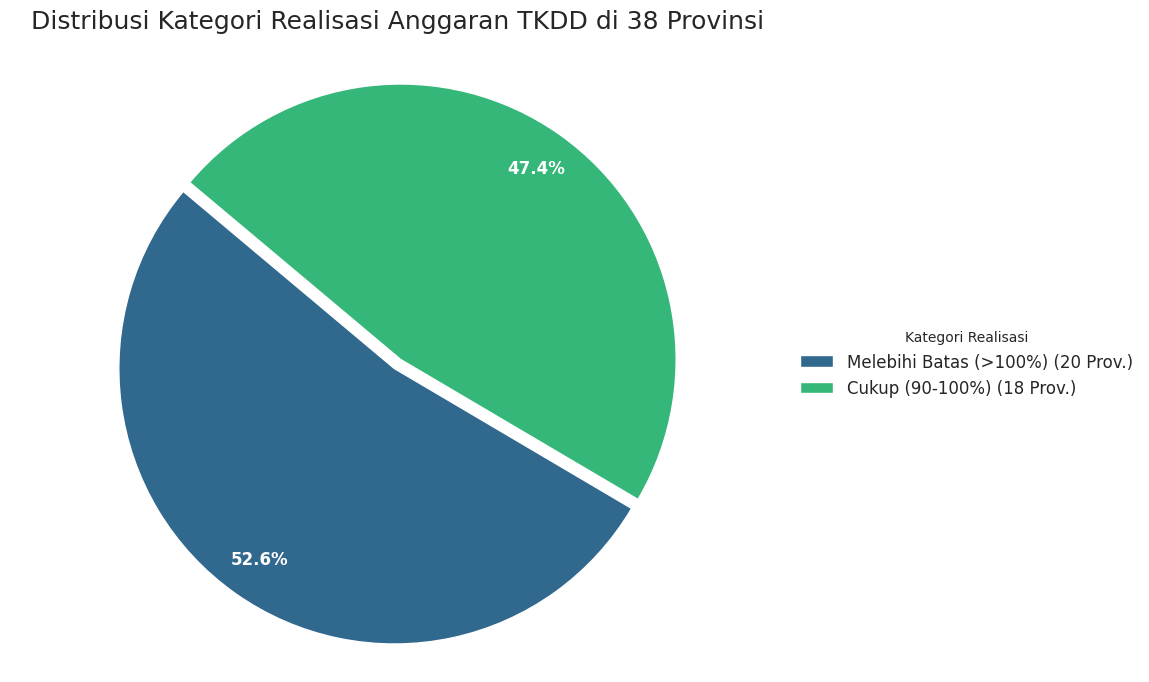

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

labels = df_tkdd['Kategori'].value_counts().index
sizes = df_tkdd['Kategori'].value_counts().values
colors = sns.color_palette('viridis', len(labels))
explode = tuple([0.02] * len(labels))

patches, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    textprops={'fontsize': 12, 'color':"w", 'weight':'bold'},
    labels=None
  )

plt.title('Distribusi Kategori Realisasi Anggaran TKDD di 38 Provinsi', fontsize=18, pad=20)
legend_labels = [f'{l} ({s} Prov.)' for l, s in zip(labels, sizes)]
plt.legend(patches, legend_labels, title="Kategori Realisasi", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.axis('equal')
plt.show()

<p align="justify">
Setelah setiap provinsi dikategorikan, tercatat bahwa tidak ada provinsi yang berkategori kurang dalam Realisasi TKDD, 18 provinsi berkategori cukup, dan 20 provinsi dengan kategori melebihi batas. Walaupun tidak ada provinsi yang kurang dalam memanfaatkan anggaran TKDD, ternyata lebih dari setengah provinsi di Indonesia (52.6%) justru telah melebihi batas dalam pemanfaatan anggaran TKDD.
</p>

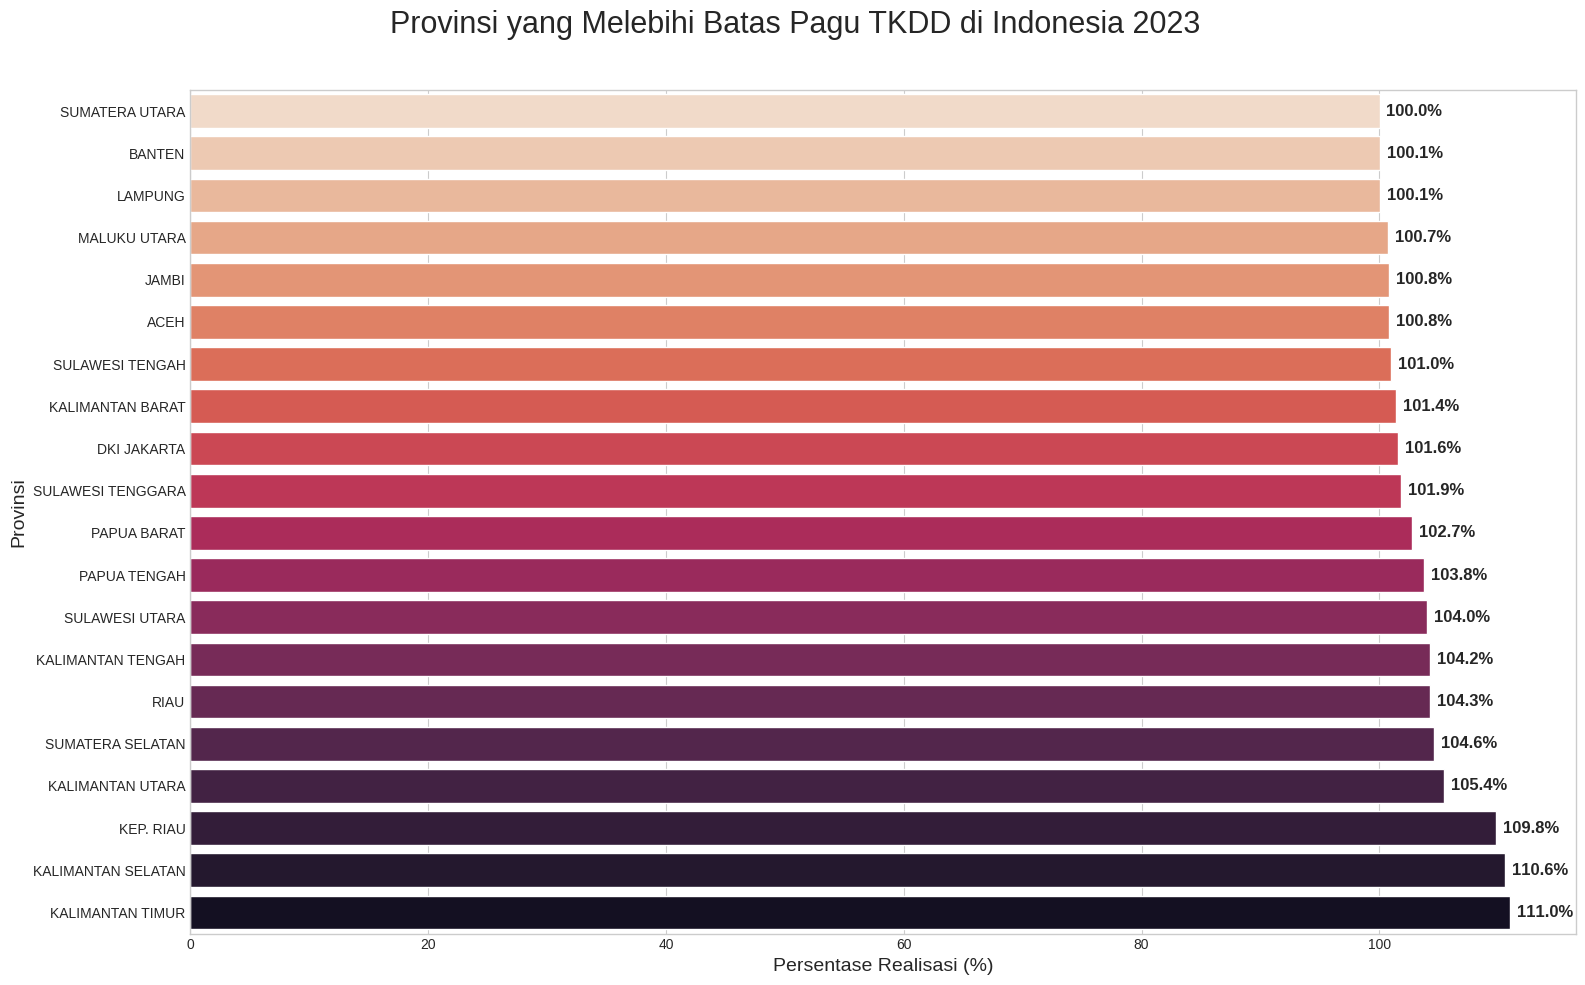

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Provinsi yang Melebihi Batas Pagu TKDD di Indonesia 2023', fontsize=22)
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x='Persentase Realisasi TKDD (Persen)',
    y='Provinsi',
    data=df_tkdd[df_tkdd['Kategori'] == 'Melebihi Batas (>100%)'].sort_values('Persentase Realisasi TKDD (Persen)', ascending=True),
    ax=ax,
    palette='rocket_r',
    hue='Provinsi',
    legend=False
)

for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}%'

    ax.annotate(
        label,
        xy=(width, p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold'
    )

ax.set_xlabel('Persentase Realisasi (%)', fontsize=14)
ax.set_ylabel('Provinsi', fontsize=14)
ax.set_xlim(right=df_top5['Persentase Realisasi TKDD (Persen)'].max() * 1.05)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<p align="justify">
Setelah ditelusuri lebih dalam, dari 20 provinsi tercatat hanya 3 provinsi yang menggunakan anggaran TKDD jauh melebihi batas pagu yang ditetapkan. 3 provinsi tersebut di antaranya Kepulauan Riau, Kalimantan Selatan, dan Kalimantan Timur. Kalimantan Timur sendiri merupakan provinsi dengan Anggaran APBN per kapita paling tinggi ke-2 sebesar 14.9 juta. Merujuk pada hasil analisis pada poin <a href="#tkdd-vs-ipm">4.4.2</a>, maka sudah wajar jika nilai Realisasi TKDD pada provinsi ini akan sangat besar yang disebabkan oleh Anggaran APBN per kapita nya yang juga sangat besar. Ketika Realisasi TKDD sebuah provinsi lebih tinggi dari Pagu TKDD yang telah diterapkan, maka provinsi tersebut telah gagal dalam menutup defisit anggaran yang terjadi (pada konteks ini pengeluaran lebih banyak dari pemasukan). Oleh karena itu, provinsi tersebut diharuskan mencari jalan keluar dengan cara mengusahakan sumber-sumber penerimaan pembiayaan yang lain (Kemenkeu).
</p>

Sumber: [Bagaimana jika SILPA-nya negatif](https://djpk.kemenkeu.go.id/?ufaq=bagaimana-jika-silpa-nya-negatif)

<a name="hasil-3"></a>
## **5.3. Analisis Faktor-Faktor yang Dapat Memengaruhi Realisasi TKDD**

<p align="justify">
Dalam mengidentifikasi faktor-faktor yang memengaruhi tinggi-rendahnya Realisasi TKDD, analisis korelasi dan model <i>feature importance</i> (poin <a href="#hubungan-variabel">4.3</a> & <a href="#faktor-penentu">4.4</a>) memberikan bukti yang konsisten. Ditemukan bahwa <b>faktor-faktor yang paling berpengaruh adalah Pagu TKDD, Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku, dan Jumlah Penduduk</b>. . Sebaliknya, faktor-faktor kesejahteraan seperti IPM dan Persentase Penduduk Miskin menunjukkan hubungan yang jauh lebih lemah terhadap nominal realisasi.
</p>

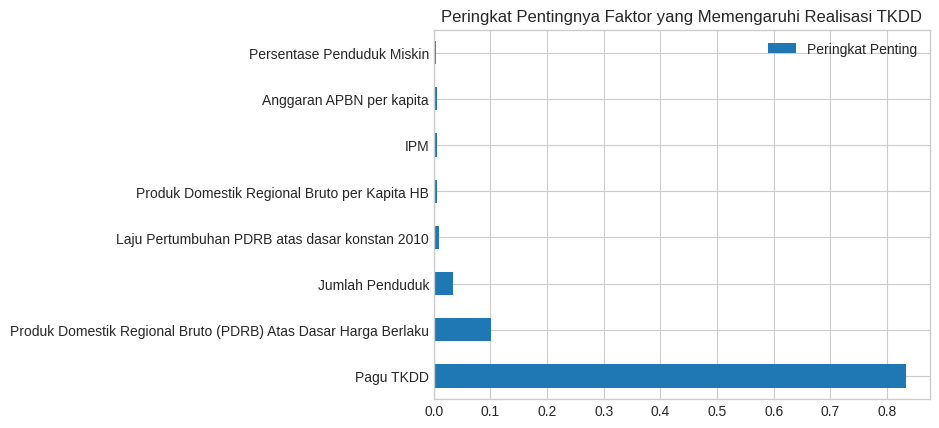

<p align="justify">
Seperti yang terdapat pada grafik tersebut, temuan ini mengindikasikan bahwa sistem alokasi dan realisasi anggaran di Indonesia saat ini secara fundamental didorong oleh skala (<i>scale-driven</i>), bukan oleh kebutuhan (<i>needs-driven</i>). Artinya, <b>besaran dana yang dikelola oleh sebuah provinsi lebih ditentukan oleh seberapa besar ukuran ekonominya (PDRB) dan jumlah penduduknya, bukan oleh seberapa tinggi tingkat kemiskinan atau seberapa rendah IPM yang perlu ditingkatkan</b>. Namun, fitur penting ini masih menyimpan informasi rahasia mengenai sebuah fitur yang juga termasuk memengaruhi Realisasi TKDD.
</p>

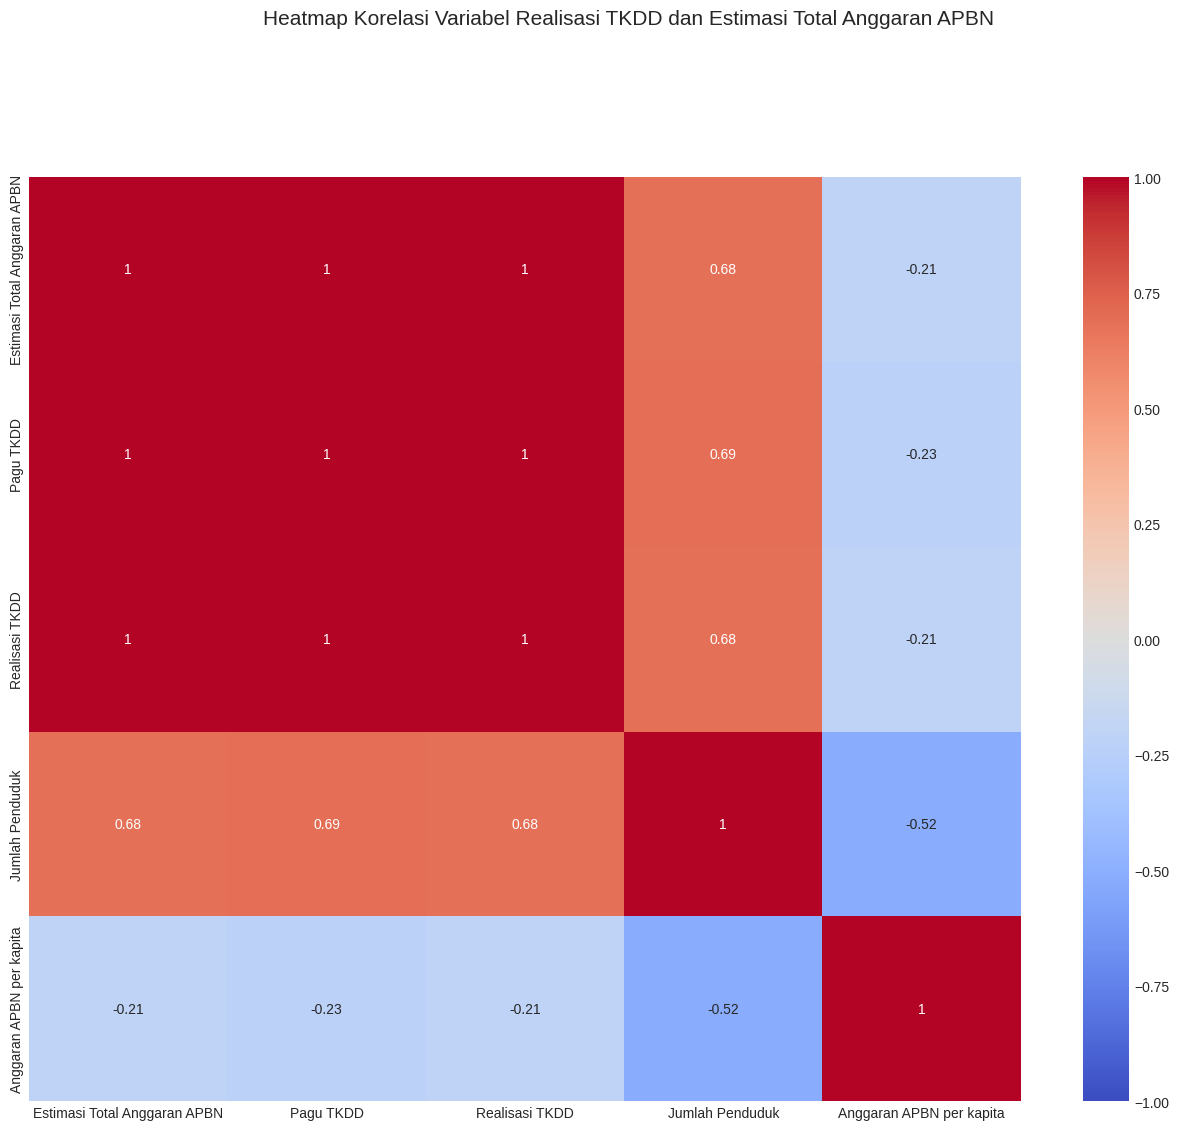

<p align="justify">
Hasil analisis multivariat pada poin <a href="#tkdd-vs-ipm">4.4.2</a> menghasilkan sebuah matriks korelasi sebagai berikut. Matriks korelasi ini menggambarkan bahwa terdapat satu fitur baru yang memiliki koefisien korelasi yang begitu tinggi dengan Realisasi TKDD, yaitu Estimasi Total Anggaran APBN yang didapatkan dari kombinasi fitur Jumlah Penduduk dan Anggaran APBN per kapita yang ditemukan pada tahap pembersihan data di poin <a href="#sulut">3.3.2.1</a>. Temuan ini menambahkan informasi bahwa selain faktor utama yang telah disebutkan sebelumnya, <b>terdapat faktor lain yang juga memengaruhi tingkat Realisasi TKDD yaitu Anggaran APBN per kapita</b>.
</p>

<p align="justify">
Selain itu, temuan ini juga menunjukkan bahwa daerah dengan ekonomi dan populasi besar secara alami akan mengelola dana yang lebih besar. Meskipun efisien dalam penyerapan, hal ini menimbulkan pertanyaan kritis mengenai efektivitas anggaran. Sebagaimana ditekankan oleh Kementerian Keuangan, penyerapan anggaran yang tinggi tidak serta-merta menjamin kualitas belanja atau dampak positif bagi masyarakat (Kemenkeu, 2022). Oleh karena itu, hubungan yang lemah antara realisasi dengan penurunan kemiskinan atau peningkatan IPM menjadi sebuah catatan penting.
</p>

Sumber: [Optimalisasi Penyerapan Anggaran untuk Akhir Tahun yang Lebih Baik!](https://djpb.kemenkeu.go.id/kppn/luwuk/id/data-publikasi/berita-terbaru/2894-optimalisasi-penyerapan-anggaran-untuk-akhir-tahun-yang-lebih-baik.html)

<a name="hasil-4"></a>
## **5.4. Analisis Hubungan Realisasi TKDD dengan IPM**

<p align="justify">
Dalam pembahasan ini, terdapat beberapa pandangan atau pendapat yang perlu diperjelas. Menurut Mira dkk (2024), produktivitas ekonomi manusia yang rendah berakibat pada rendahnya perolehan anggaran TKDD oleh negara.
Berbeda dengan pembahasan Mira dkk, <b>hasil analisis pada poin <a href="#hubungan-variabel">4.3</a> menerangkan bahwa hubungan antara IPM dan Realisasi TKDD menunjukkan korelasi yang kurang signifikan</b>. <b>Disparitas hasil ini kemungkinan disebabkan oleh ruang lingkup penelitian Mira dkk (2024) yang hanya mempertimbangkan Provinsi Papua dengan data dari tahun 2014-2023, bukan keseluruhan provinsi di Indonesia pada tahun 2023.</b>
</p>

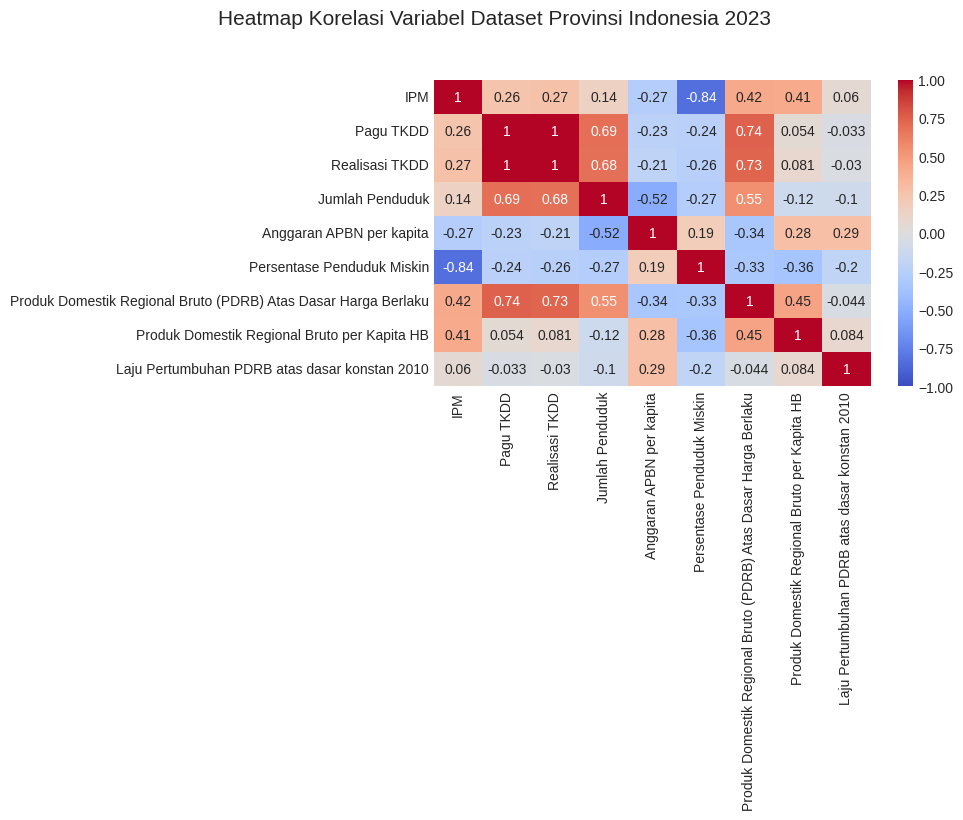

<p align="justify">
Ketika ditinjau dari Heatmap Korelasi, korelasi Realisasi TKDD dengan IPM memang hanya sebesar 0.27. Angka ini masih tergolong kecil dibandingkan korelasi Realisasi TKDD dengan variabel lain seperti PDRB Atas Dasar Harga Berlaku. Hal ini menunjukkan bahwa <b>tingginya realisasi anggaran TKDD tidak secara otomatis menyebabkan peningkatan IPM</b>. Kemungkinan besar, <b>hubungan positif yang lemah ini bersifat semu dan muncul karena adanya variabel tersembunyi yang memengaruhi keduanya</b>, seperti misalnya tingkat kemajuan ekonomi pada provinsi tersebut.
</p>

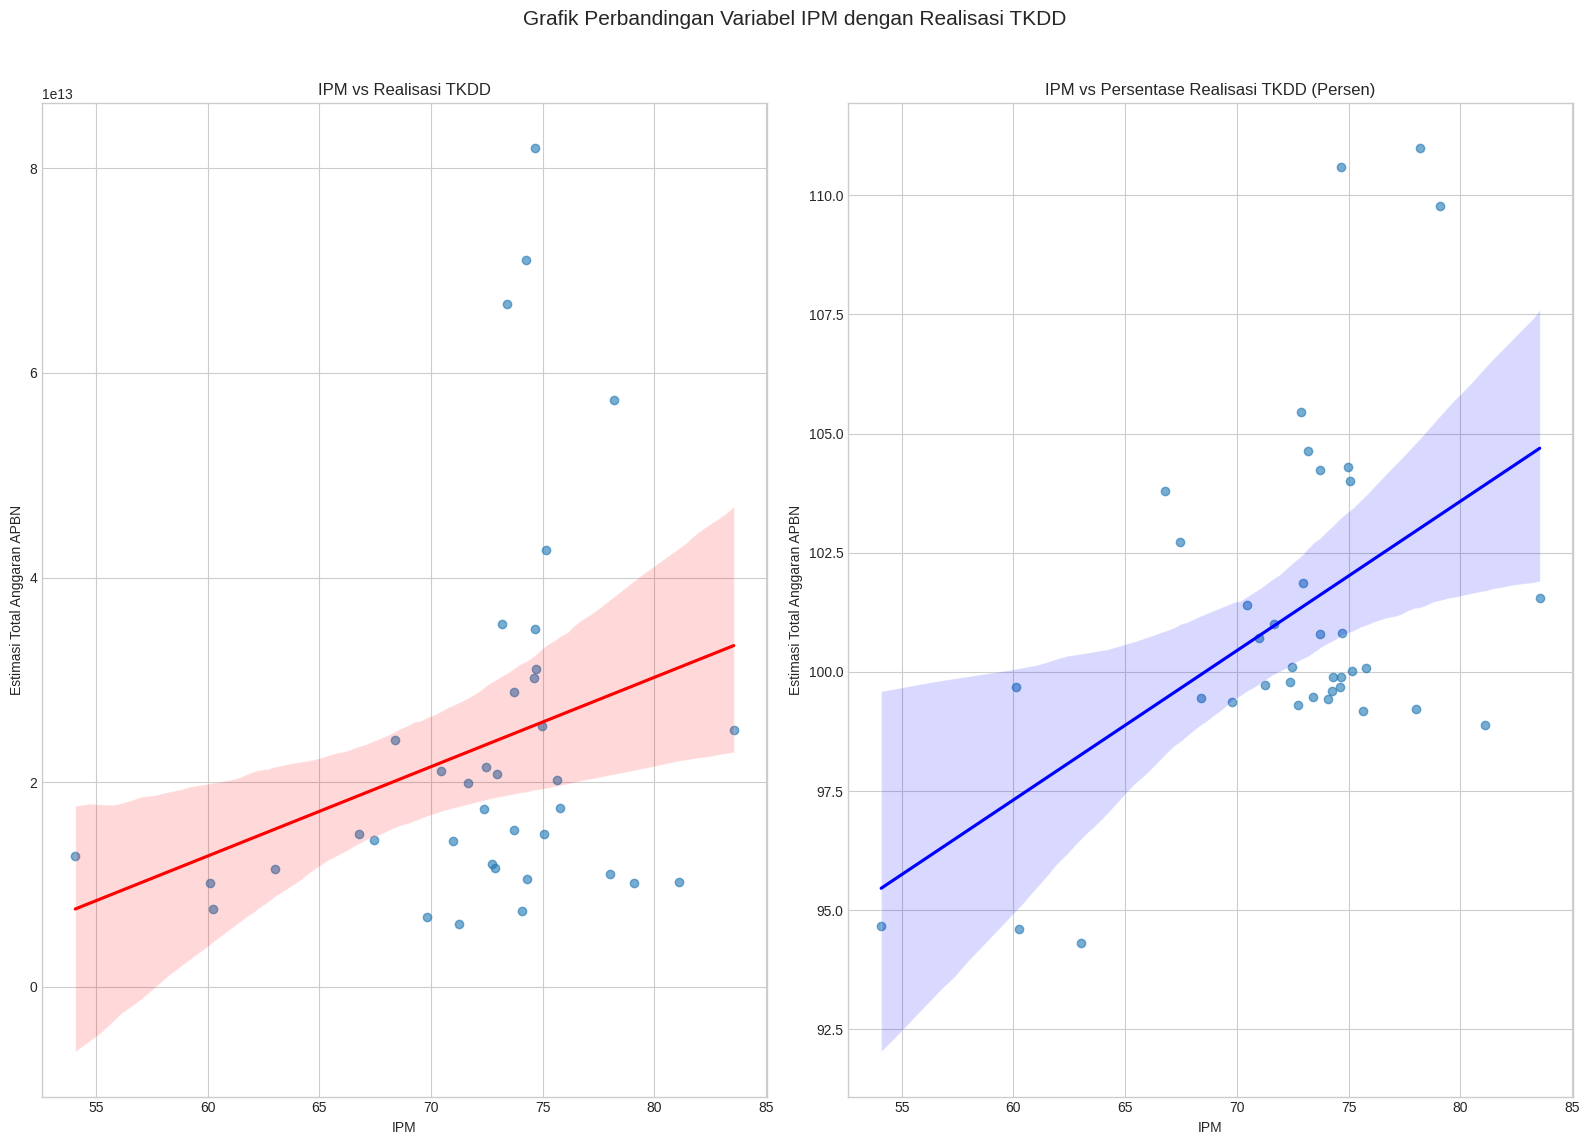
<p align="justify">
Lebih lanjut, ketika variabel persentase Realisasi TKDD tiap provinsi juga ikut disertakan, hasil analisis menunjukkan temuan yang cukup berbeda. hasil analisis menunjukkan bahwa <b>persentase Realisasi TKDD berkorelasi dengan IPM di suatu provinsi</b>. Ini berarti IPM berkorelasi dengan efektivitas tingkat penyerapan anggaran TKDD pada provinsi tersebut. Sehingga dapat disimpulkan bahwa <b>provinsi yang ekonominya sudah maju (ditunjukkan oleh PDRB tinggi) secara alami memiliki dua hal utama:

1. Kapasitas yang lebih baik untuk menyerap anggaran dalam jumlah besar
2. Sumber daya yang cukup untuk berinvestasi dalam pendidikan dan kesehatan, yang merupakan komponen utama pembentuk IPM.</b>

Dengan demikian, <b>Realisasi TKDD dan IPM bergerak ke arah yang sama bukan karena satu variabel menyebabkan yang lain, melainkan karena keduanya sama-sama dipengaruhi oleh tingkat kemajuan ekonomi suatu provinsi</b>.
</p>

Sumber: [Pengaruh Indeks Pembangunan Manusia (IPM) Dan Pertumbuhan Usaha
Kecil (Mikro) Terhadap Pertumbuhan Ekonomi](https://journal.arimbi.or.id/index.php/Nuansa/article/download/981/1043/4294)


<a name="hasil-5"></a>
## **5.5. Analisis Faktor-Faktor yang Memengaruhi IPM di Tiap Provinsi**

<p align="justify">
Dalam mengidentifikasi faktor penentu IPM, metode <i> scatter plot</i> dan model Random Forest digunakan untuk menghasilkan visualisasi perkiraan variabel yang menjadi <i>feature importance </i> untuk IPM. Berbeda dengan Realisasi TKDD, <b>variabel Estimasi Total Anggaran APBN tidak terlalu berpengaruh pada IPM</b>, sehingga tidak disertakan ke dalam perkiraan variabel penting. Hal ini menimbulkan temuan menarik di mana hasil dari <i>feature importance </i> sangat berbeda dari analisis pada poin <a href="#hasil-4">5.4</a>. Berdasarkan analisis ini, <b>faktor yang paling dominan memengaruhi IPM adalah PDRB Atas Dasar Harga Berlaku dan Persentase Penduduk Miskin</b>. Temuan ini menjadi menarik karena Realisasi TKDD menunjukkan tingkat penentu tinggi-rendahnya IPM yang jauh lebih rendah dalam visualisasi ini.</p>

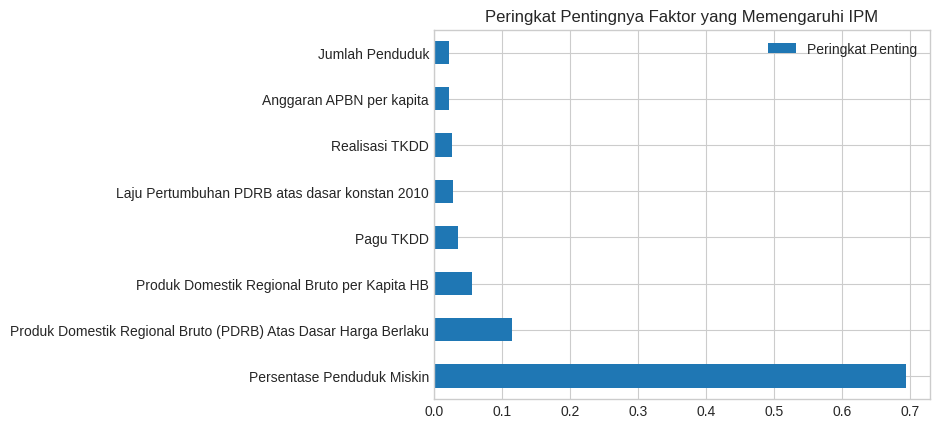

<p align="justify">
Visualisasi di bawah memberikan pandangan dan memperkuat temuan bahwa <b>kekuatan perekonomian suatu provinsi dapat meningkatkan alokasi anggaran oleh pemerintah daerah dan memungkinkan masyarakat memiliki peningkatan daya beli</b>. Dengan adanya sumber daya yang lebih ini, nilai IPM dan akses terhadap standar hidup yang layak menjadi lebih mudah ditingkatkan.
</p>

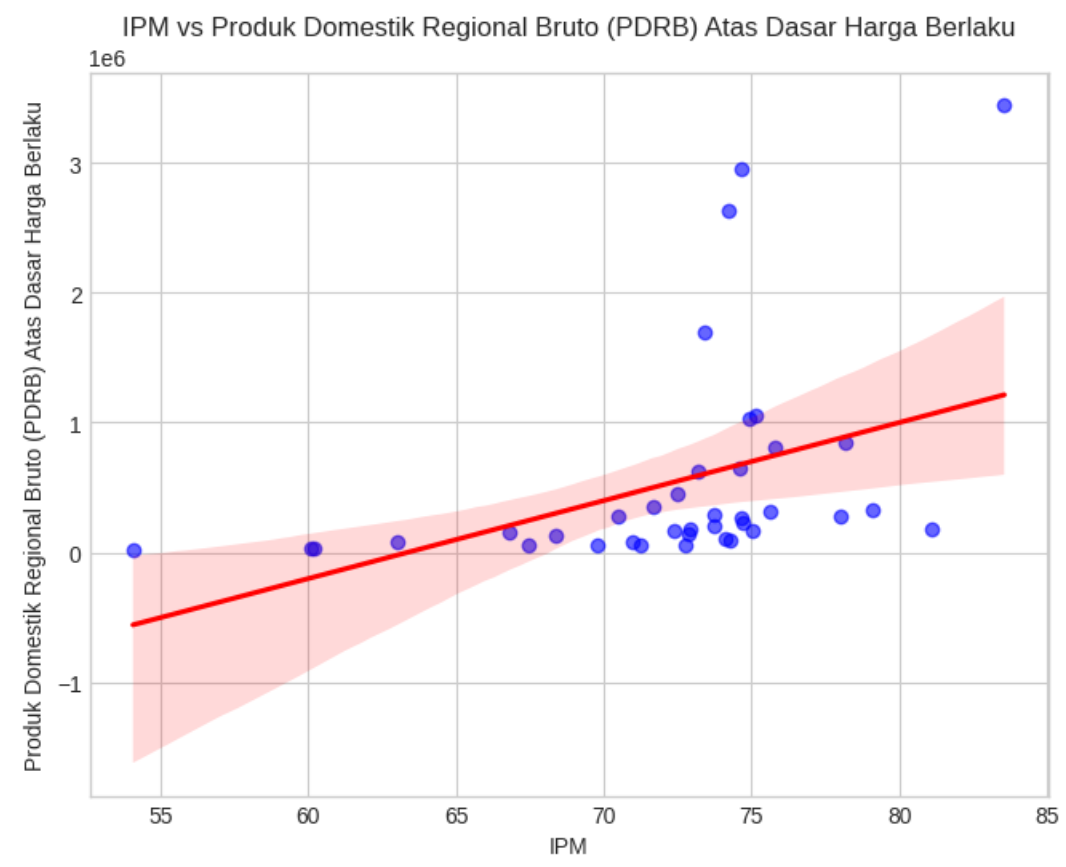

<p align="justify">
Sebaliknya, <b>Persentase Penduduk Miskin adalah penghalang utama pembangunan manusia ditunjukkan korelasi negatif pada poin <a href="#tkdd-vs-ipm">4.4.2</a></b>. Kemiskinan secara langsung membatasi akses terhadap gizi, pendidikan, dan kesehatan. Kedua faktor yang dianalisis dari hasil visualisasi ini selaras dengan penelitian yang dilakukan Quarthano Reavindo. Reavindo Q. (2021) menjelaskan bahwa secara bersama-sama (simultan) variabel Indeks Pembangunan Manusia (IPM) dan laju pertumbuhan Produk Domestik Regional Bruto (PDRB) berpengaruh signifikan terhadap persentase penduduk miskin.
Oleh karena itu, hasil ini menegaskan bahwa <b>untuk meningkatkan IPM secara efektif, fokus kebijakan pemerintah harus diarahkan pada program yang secara langsung meningkatkan kekuatan perekonomian dan mengurangi kemiskinan, bukan sekadar meningkatkan total transfer anggaran ke daerah</b>.</p>

Sumber: [
PENGARUH IPM DAN LAJU PERTUMBUHAN PDRB TERHADAP PERSENTASE PENDUDUK MISKIN DI KABUPATEN KARO TAHUN 2011-2019](https://jurnal.syntax-idea.co.id/index.php/syntax-idea/article/view/1121/706)


<a name="hasil-6"></a>
## **5.6. Insight dan Rekomendasi Kebijakan**

<a name="insight"></a>
### **5.6.1. Insight dari Hasil Analisis**

<p align="justify">
Berdasarkan keseluruhan proses analisis dataset mengenai TKDD serta berbagai indikator sosio-ekonomi di 38 provinsi Indonesia pada tahun 2023, terdapat beberapa insight penting dan saling berhubungan yang telah ditemukan:

<ol>
  <li><b>Sistem Anggaran yang Didorong oleh Skala, Bukan Kebutuhan</b></li>
    <p align="justify">
    Salah satu temuan analisis yang paling penting adalah bahwa <b>nominal dari anggaran TKDD yang dimanfaatkan oleh provinsi sangat dipengaruhi oleh faktor-faktor skala, seperti Pagu TKDD, PDRB, APBN per kapita, dan Jumlah Penduduk</b>. Sebaliknya, <b>faktor-faktor yang mencerminkan kebutuhan pembangunan seperti IPM yang rendah atau Persentase Penduduk Miskin yang tinggi memiliki pengaruh yang sangat kecil terhadap besaran anggaran yang dikelola</b>. Ini menunjukkan bahwa <b>berdasarkan data pada tahun 2023, sistem alokasi saat ini lebih berpihak pada provinsi "besar" secara ekonomi dan demografi</b>. Namun, <b>hal ini tidak sepenuhnya benar karena analisis ini hanya menyangkut kondisi provinsi di Indonesia pada tahun 2023</b>. Bisa jadi ketika dihubungkan dengan data pada tahun-tahun sebelumnya atau tahun setelahnya, informasi yang didapatkan akan sedikit berbeda.
    </p>
  <li><b>Dilema Antara Efisiensi Penyerapan dan Efektivitas Dampak</b></li>
    <p align="justify">
    Hasil keseluruhan analisis menunjukkan bahwa secara umum, <b>pemerintah provinsi telah berhasil menyerap/memanfaatkan anggaran TKDD secara efisien, terbukti dengan kecilnya selisih antara Pagu TKDD dan Realisasi TKDD</b>. Namun, <b>efisiensi ini tidak secara otomatis menentukan bahwa pemanfaatan anggaran telah efektif</b>. Terdapat informasi bahwa hubungan antara Realisasi TKDD dengan indikator kesejahteraan masyarakat dan indikator keberhasilan pembangunan  seperti IPM ternyata masih lemah dan terlihat tidak adanya hubungan langsung antara keduanya. Meskipun secara nyata, TKDD memiliki tujuan untuk  mengurangi ketimpangan fiskal dan diharapkan dapat mempercepat pemerataan pelayanan publik dan mendukung pembangunan daerah secara berkelanjutan, ternyata <b>hasil analisis pada TKDD tiap provinsi di Indonesia tahun 2023 menunjukkan hasil yang berlawanan. Hasil analisis justru menguatkan indikasi bahwa menghabiskan anggaran tidak sama dengan menghasilkan dampak yang signifikan</b>.
    </p>
  <li><b>Upaya Memajukan Sumber Daya Manusia dengan Pendapatan per Kapita dan Pengentasan Kemiskinan</b></li>
    <p align="justify">
    Secara logika, korelasi IPM dengan Realisasi TKDD yang seharusnya menunjukkan hubungan yang signifikan namun ternyata tidak memiliki korelasi yang tinggi jika didasarkan pada hasil visualisasi. <b>Faktor yang paling mempengaruhi IPM ternyata adalah PDRB Atas Dasar Harga Berlaku (sebagai acuan pendapatan masyarakat) dan Persentase Penduduk Miskin menunjukkan faktor paling dominan</b>. Hubungan ini jauh lebih kuat dibandingkan hubungan IPM dengan total realisasi anggaran. Ini artinya <b>kunci utama pembangunan manusia terletak pada peningkatan daya beli masyarakat dan pengurangan tingkat kemiskinan secara langsung, justru bukan fokus pada seberapa banyak anggaran yang dihabiskan</b>.
    </p>
  <li><b>Kesenjangan (Disparitas) Menjadi Salah Satu Permasalahan Utama</b></li>
    <p align="justify">
    Hasil dari keseluruhan proses analisis menunjukkan bahwa <b>terdapat sebuah kesenjangan yang cukup ekstrem antar wilayah</b>. Melalui hasil visualisasi dan analisis, <b>kesenjangan ini terjadi di banyak aspek wilayah, seperti populasi penduduk, skala anggaran TKDD, kekuatan ekonomi dari setiap daerah (PDRB), tingkat kemiskinan, hingga capaian pembangunan manusia (IPM)</b>. Ketimpangan ini tidak hanya terlihat dari besaran angka-angka statistik, tetapi juga mencerminkan adanya ketidakseimbangan dalam prioritas pembangunan dan distribusi sumber daya di tiap daerah.
    </p>
  <li><b>Variabel Sosio-Ekonomi yang Saling Terkait dan Isu Terkait Provinsi Baru</b></li>
    <p align="justify">
    Saat proses analisis sedang berjalan, ditemukan sebuah multikolinearitas baru yang sempurna selain Pagu TKDD dan Realisasi TKDD. Hasil temuan ini menunjukkan bahwa <b>nilai realisasi TKDD pada dasarnya adalah hasil turunan dari Anggaran APBN per kapita dan Jumlah Penduduk</b>. Temuan ini mengubah perspektif baru tentang faktor-faktor apa saja yang memengaruhi realisasi anggaran TKDD pada setiap wilayah. Selain itu, <b>adanya beberapa data yang hilang pada provinsi-provinsi otonomi baru yang terbentuk pada tahun sebelumnya menunjukkan adanya indikasi tantangan dalam kapasitas administrasi dan pengumpulan data di daerah-daerah tersebut</b>.
    </p>
</ol>

</p>

<a name="rekomendasi"></a>
### **5.6.2. Rekomendasi Kebijakan**

<p align="justify">
Berdasarkan data, visualisasi, dan insight yang telah didapatkan, untuk mencapai peningkatan Indeks Pembangunan Manusia (IPM) yang merata di setiap provinsi, sambil tetap memperhatikan efektivitas dan efisiensi anggaran yang dikeluarkan oleh Pemerintah, terdapat beberapa rekomendasi yang fokus pada beberapa kebijakan, antara lain:

<ol>
  <li><b>Pengaturan Ulang Alokasi TKDD Menjadi Berbasis Kebutuhan dan Dampak</b></li>
    <p align="justify">
    <b>Merevisi formula dalam penyerahan alokasi TKDD dengan memberikan bobot lebih pada indikator kebutuhan, seperti tingkat kemiskinan dan IPM yang masih rendah</b>. Revisi ini direkomendasikan dengan tujuan <b>untuk memastikan daerah yang paling tertinggal mendapatkan sumber daya yang memadai untuk mengejar ketertinggalan, tanpa menghilangkan faktor utama yaitu faktor skala (PDRB dan Populasi)</b>.
    </p>
  <li><b>Mendorong Pertumbuhan Ekonomi untuk Meningkatkan Pendapatan per Kapita</b></li>
    <p align="justify">
    Pemerintah Pusat mendukung Pemerintah Daerah dalam memprioritaskan program-program yang secara langsung meningkatkan PDRB per Kapita. <b>Program dapat diterapkan dengan cara memfasilitasi kegiatan pengembangan UMKM di tiap provinsi, terutama untuk provinsi dengan sumber daya yang masih tertinggal</b>. Selain itu, memotivasi masyarakat setempat dalam pelatihan keterampilan tenaga kerja dan memudahkan pembukaan akses pasar bagi produk lokal. <b>Rekomendasi langkah ini dibuktikan dari hasil analisis bahwa PDRB per Kapita adalah pemicu terkuat untuk IPM</b>.
    </p>
  <li><b>Mempertajam Program Pengentasan Kemiskinan</b></li>
    <p align="justify">
    Pemerintah Daerah bisa lebih berfokus dengan kegiatan/program yang bertujuan untuk mengurangi tingkat kemiskinan pada daerahnya. <b>Kegiatan dapat berupa integrasi program bantuan sosial (seperti PKH, Bantuan Pangan) dengan program pemberdayaan ekonomi dengan memastikan bahwa bantuan sosial yang diberikan tetap tepat sasaran dan akurat</b>. Selain itu, <b>pembukaan lapangan kerja baru juga dapat menjadi salah satu solusi untuk mengatasi/mengurangi tingkat kemiskinan. Melalui lapangan kerja yang lebih luas, tingkat pengangguran pada daerah tersebut akan berkurang yang secara otomatis juga akan mengurangi persentase penduduk miskin pada daerah tersebut</b>. Kegiatan ini direkomendasikan karena melalui hasil analisis, ditemukan bahwa <b>Persentase Penduduk Miskin adalah faktor dengan pengaruh negatif terkuat terhadap IPM</b>. Oleh karena itu, mengurangi kemiskinan adalah strategi yang paling efektif untuk membuka potensi pembangunan manusia.
    </p>
  <li><b>Menggeser Fokus Monitoring dari Dampak Langsung ke Dampak Jangka Panjang</b></li>
    <p align="justify">
    <b>Mengimplementasikan sistem monitoring dan evaluasi kinerja pemerintah daerah yang tidak hanya mengukur penyerapan anggaran, tetapi juga dampak nyata yang dihasilkan terhadap IPM</b>. Monitoring bisa dilakukan dengan berbagai cara, seperti misalnya mengukur “penurunan angka kemiskinan” atau “peningkatan angka pendapatan penduduk”. Temuan bahwa realisasi yang tinggi tidak berkorelasi kuat dengan tingkat IPM pada suatu daerah menunjukkan perlunya sebuah “jembatan” kebijakan. <b>Dengan mengukur berbagai outcome untuk melihat dampak jangka panjang, pemerintah daerah didorong untuk merancang program yang lebih berkualitas dan efektif, bukan sekadar menghabiskan dana</b>.
    </p>
  <li><b>Percepatan Peningkatan Kapasitas dan Kemampuan untuk Daerah Otonom Baru (DOB)</b></li>
    <p align="justify">
    Berdasarkan hasil analisis, terlihat bahwa <b>provinsi yang baru terbentuk memiliki beberapa informasi yang tidak lengkap dan statistik sosio-ekonomi yang terbilang cukup tertinggal dibandingkan dengan provinsi yang sudah ada</b>. Untuk mengatasi ketertinggalan ini, <b>Pemerintah Pusat dapat memberikan asistensi teknis yang intensif kepada provinsi-provinsi baru dalam hal tata kelola pemerintahan, khususnya dalam sistem perencanaan, penganggaran, dan pelaporan data yang akurat dan tepat waktu. Dengan data yang semakin akurat terkait pemerintahan setempat, pemerintah akan lebih mudah dalam menentukan langkah tepat selanjutnya untuk memajukan provinsi tersebut</b>.
    </p>
</ol>

</p>

<a name='kesimpulan'></a>
# **6. Kesimpulan**

<p align="justify">
Setelah melalui proses analisis data yang cukup panjang—dari pembersihan, eksplorasi visual, hingga pemodelan statistik—dapat <b>disimpulkan bahwa terdapat sebuah situasi bertentangan dalam pengelolaan keuangan daerah di Indonesia pada tahun 2023.</b> Di satu sisi, banyak pemerintah daerah berhasil menyerap anggaran dengan efisien, ditunjukkan oleh selisih kecil antara Pagu dan Realisasi TKDD. Namun di sisi lain, efektivitas penggunaan anggaran ini dalam meningkatkan kualitas hidup masyarakat, khususnya melalui pembangunan manusia, masih sangat rendah, ditunjukkan oleh persentase Realisasi TKDD.
</p>

<p align="justify">
Hal ini terjadi karena sistem alokasi anggaran lebih menekankan pada ukuran populasi dan kekuatan ekonomi daerah, bukan pada kebutuhan aktual di lapangan. Akibatnya, daerah-daerah yang sudah kuat secara ekonomi justru mendapat porsi dana yang lebih besar, sementara daerah dengan kebutuhan pembangunan yang mendesak malah tertinggal. <b>Lebih jauh lagi, temuan penting dari analisis kami menunjukkan bahwa besarnya anggaran tidak serta-merta berdampak pada peningkatan IPM.</b> Justru faktor-faktor seperti PDRB per kapita dan tingkat kemiskinan memiliki pengaruh yang jauh lebih besar terhadap tinggi rendahnya pembangunan manusia.
</p>

<p align="justify">
<b>Kesimpulan utamanya adalah bahwa yang paling penting bukanlah seberapa besar anggaran yang dihabiskan, melainkan seberapa efektif anggaran tersebut digunakan untuk mengentaskan kemiskinan dan meningkatkan daya beli masyarakat. </b> Untuk mencapai pembangunan yang merata dan adil, fokus kebijakan perlu bergeser dari sekadar efisiensi penyerapan dana ke dampak nyata yang dirasakan masyarakat, terutama di daerah-daerah yang paling tertinggal.
</p>